# YOLO V8: Baseline and HyperParameter training

In [1]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2

In [2]:
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## YOLOV8 Baseline

- In this section, we only train and validate based on the basic parameters.

In [4]:
baseline_model = YOLO('yolov8x.pt')

In [5]:
params_baseline  = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': False # specifically train the model
}

In [12]:
baseline_results = baseline_model.train(**params_baseline)

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.57G      1.481      1.192      1.536        156        416: 100%|██████████| 48/48 [00:10<00:00,  4.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.88G      1.499      1.196      1.533        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.89G      1.545      1.275      1.584        158        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.89G      1.548      1.285      1.572        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.9G      1.565      1.268      1.581        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.9G      1.495       1.19      1.542        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.88G      1.502      1.204      1.537        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.88G      1.471       1.16      1.512        195        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.89G      1.477      1.157      1.509        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.89G      1.445      1.133      1.481        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.9G      1.439      1.109      1.483        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.9G      1.418      1.086      1.472        144        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.9G      1.404      1.073      1.447        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.89G      1.368      1.033       1.42        168        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.9G      1.378      1.035      1.434        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.9G      1.351      1.009      1.411        152        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.88G      1.364      1.037      1.416        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.89G      1.356      1.027      1.416        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.89G      1.332     0.9781      1.393        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.89G      1.316     0.9639      1.382        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.9G      1.304     0.9594      1.385        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.9G      1.287     0.9434      1.377        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.9G      1.268     0.9235      1.359        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.89G      1.257     0.9131      1.349        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.9G      1.264     0.9189      1.351        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


                   all         73        967      0.828      0.882        0.9      0.604

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]


                   all         73        967      0.828      0.881      0.899      0.603
             Platelets         73         76      0.826      0.813       0.87      0.466
                   RBC         73        819      0.703      0.832      0.846      0.587
                   WBC         73         72      0.955          1      0.982      0.757
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


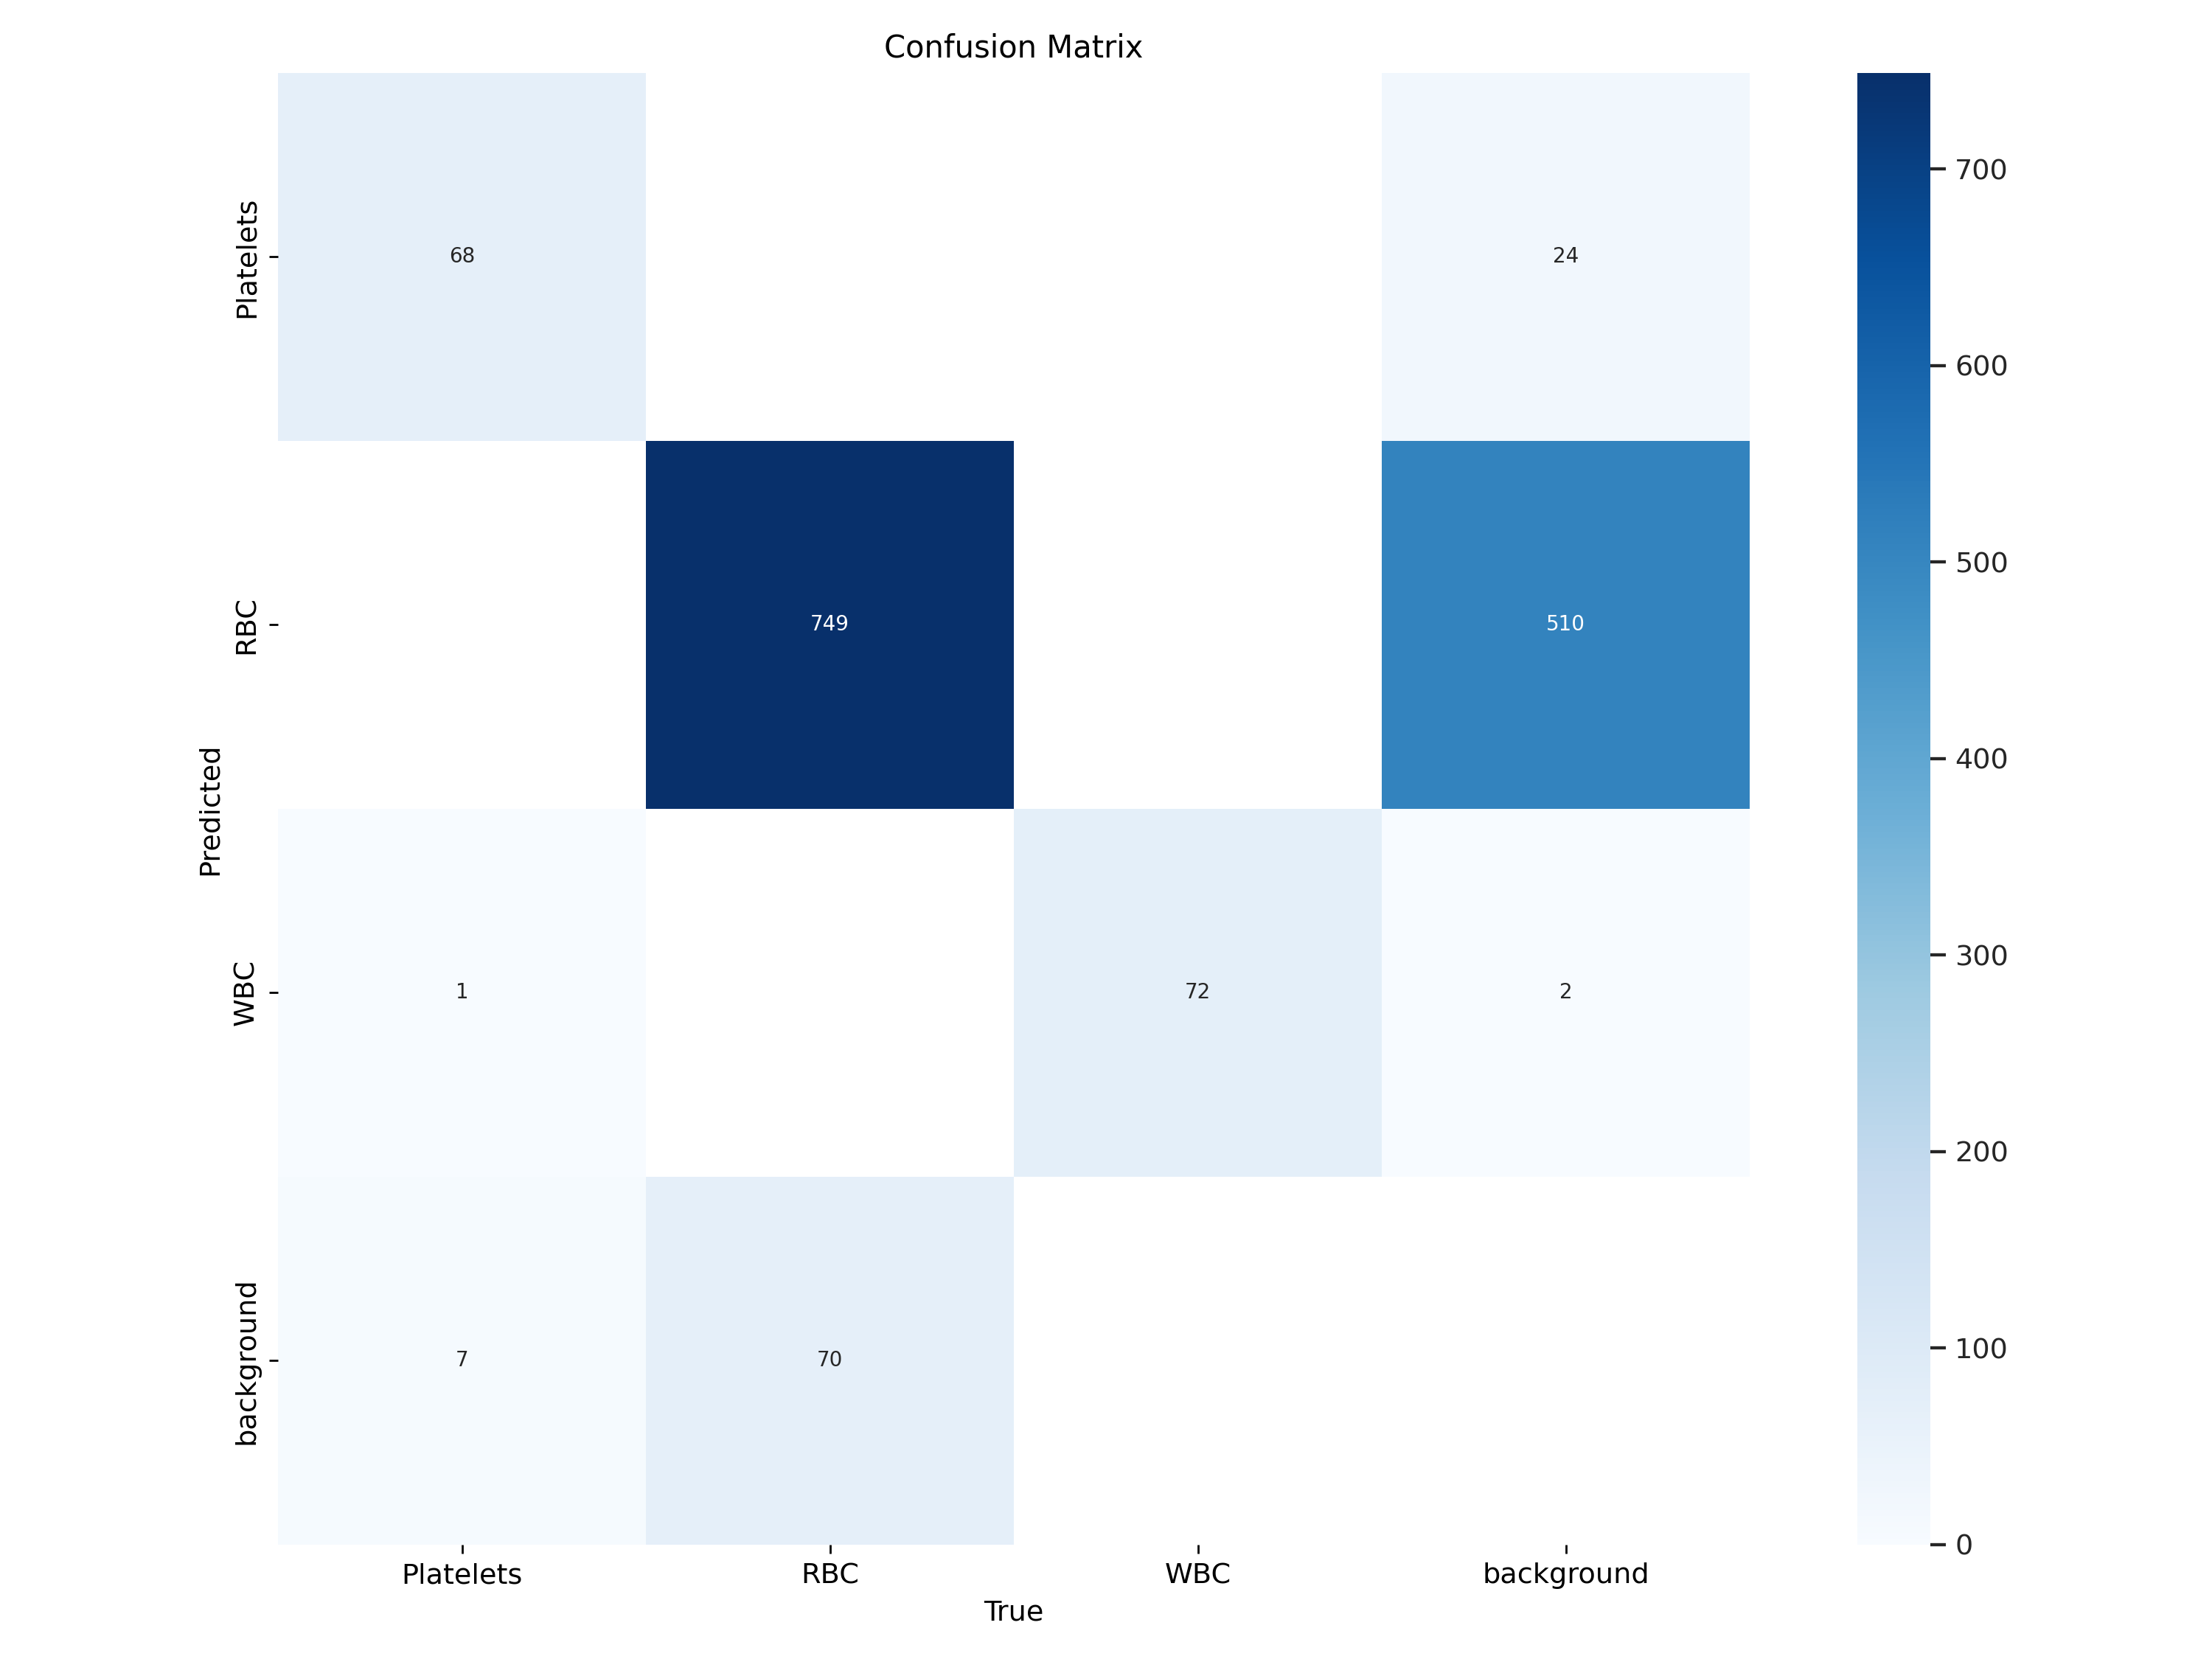

In [23]:
#runs/detect/V8/train_0605_BL

Image(filename= f'runs/detect/V8/train_0605_BL/confusion_matrix.png', width =800)

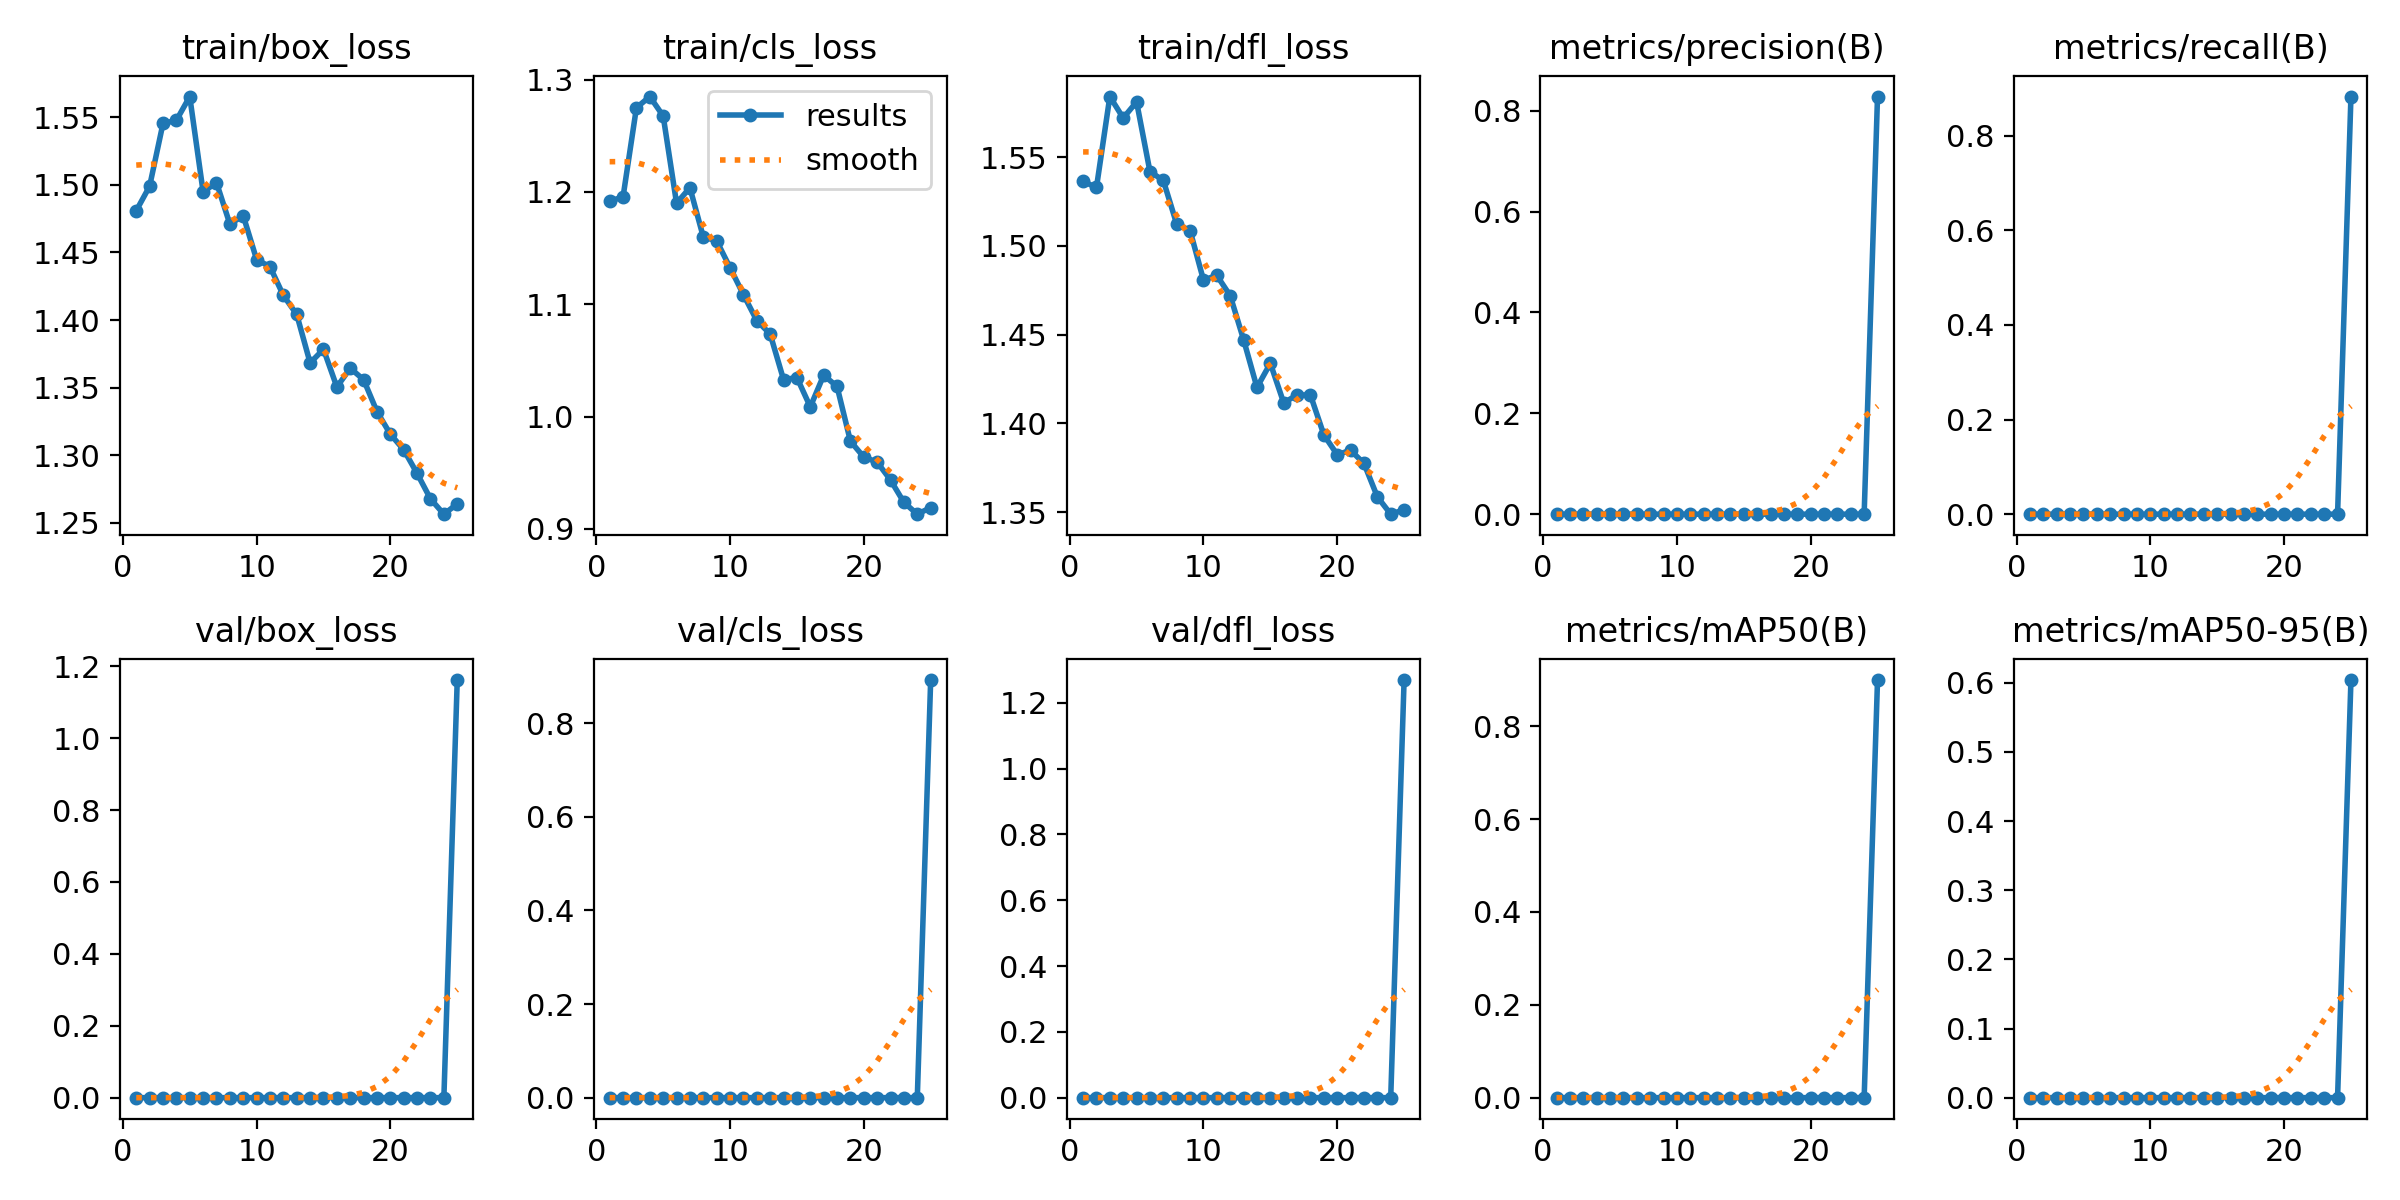

In [14]:
Image(filename= f'runs/detect/V8/train_0605_BL/results.png', width =750)

### BaseLine Validation


In [15]:
valid_bl = YOLO('runs/detect/V8/train_0605_BL/weights/best.pt')
valid_bl.val()

##runs/detect/V8/val_0605_BL

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


                   all         73        967      0.828      0.881      0.899      0.604
             Platelets         73         76      0.826      0.811       0.87      0.468
                   RBC         73        819      0.704      0.832      0.846      0.586
                   WBC         73         72      0.955          1      0.982      0.759
Speed: 0.1ms preprocess, 7.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x149864731710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## YOLOv8 Full params

- In this section, we run the yolov8 model on the full set of parameters - augmentations, loss etc and note the performance
- - we do not implement hyper parameter tuning

In [16]:
full_params = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': False # specifically train the model
    ,'hsv_h': 0.02,
     'hsv_s': 0.5,
     'hsv_v': 0.3,
     'degrees': 5.0,
     'translate': 0.05,
     'scale': 0.3,
     'shear': 0.0,
     'perspective': 0.0,
     'flipud': 0.0,
     'fliplr': 0.3,
     'mosaic': 0.5,
     'mixup': 0.0,
     'label_smoothing': 0.15,
     'box': 10.0,
     'cls': 2.0,
     'dfl': 2.0
}

In [17]:
FP_model  = YOLO('yolov8x.pt')

In [18]:
FP_results = FP_model.train(**full_params)

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.98G      3.766       25.9      3.744        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.79it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.03G      3.816      11.45      3.619        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.01G      3.919      12.03      3.895        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         8G      3.823      11.76      3.701        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      8.03G      3.887      10.66      3.728        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.01G      3.836      11.44      3.659        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      8.01G      3.849       10.1      3.761        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.01G      3.895      10.43      3.831        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.01G      3.834      9.833      3.768        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.03G      3.828      9.172      3.761        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.03G      3.869      8.889      3.801        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.01G      3.791      9.047      3.673        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.01G      3.695      8.864      3.588        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.01G      3.307      8.394      3.268        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.03G      3.143      7.972      3.064        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      8.01G      2.764      7.039      2.733        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.01G      2.549       6.12       2.61        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         8G      2.341      5.579      2.447        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         8G      2.276      5.282      2.378        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      8.01G       2.19      4.958      2.263        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.01G      2.152      4.878      2.251        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      8.01G      2.076       4.67      2.187        180        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      8.01G       2.09      4.613      2.182        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         8G      2.013      4.477      2.141        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      8.01G      2.005      4.431      2.156        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


                   all         73        967      0.809      0.864      0.869       0.48

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all         73        967      0.809      0.863      0.869       0.48
             Platelets         73         76      0.746      0.849      0.828      0.348
                   RBC         73        819       0.72      0.741      0.805      0.463
                   WBC         73         72      0.961          1      0.974      0.629
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


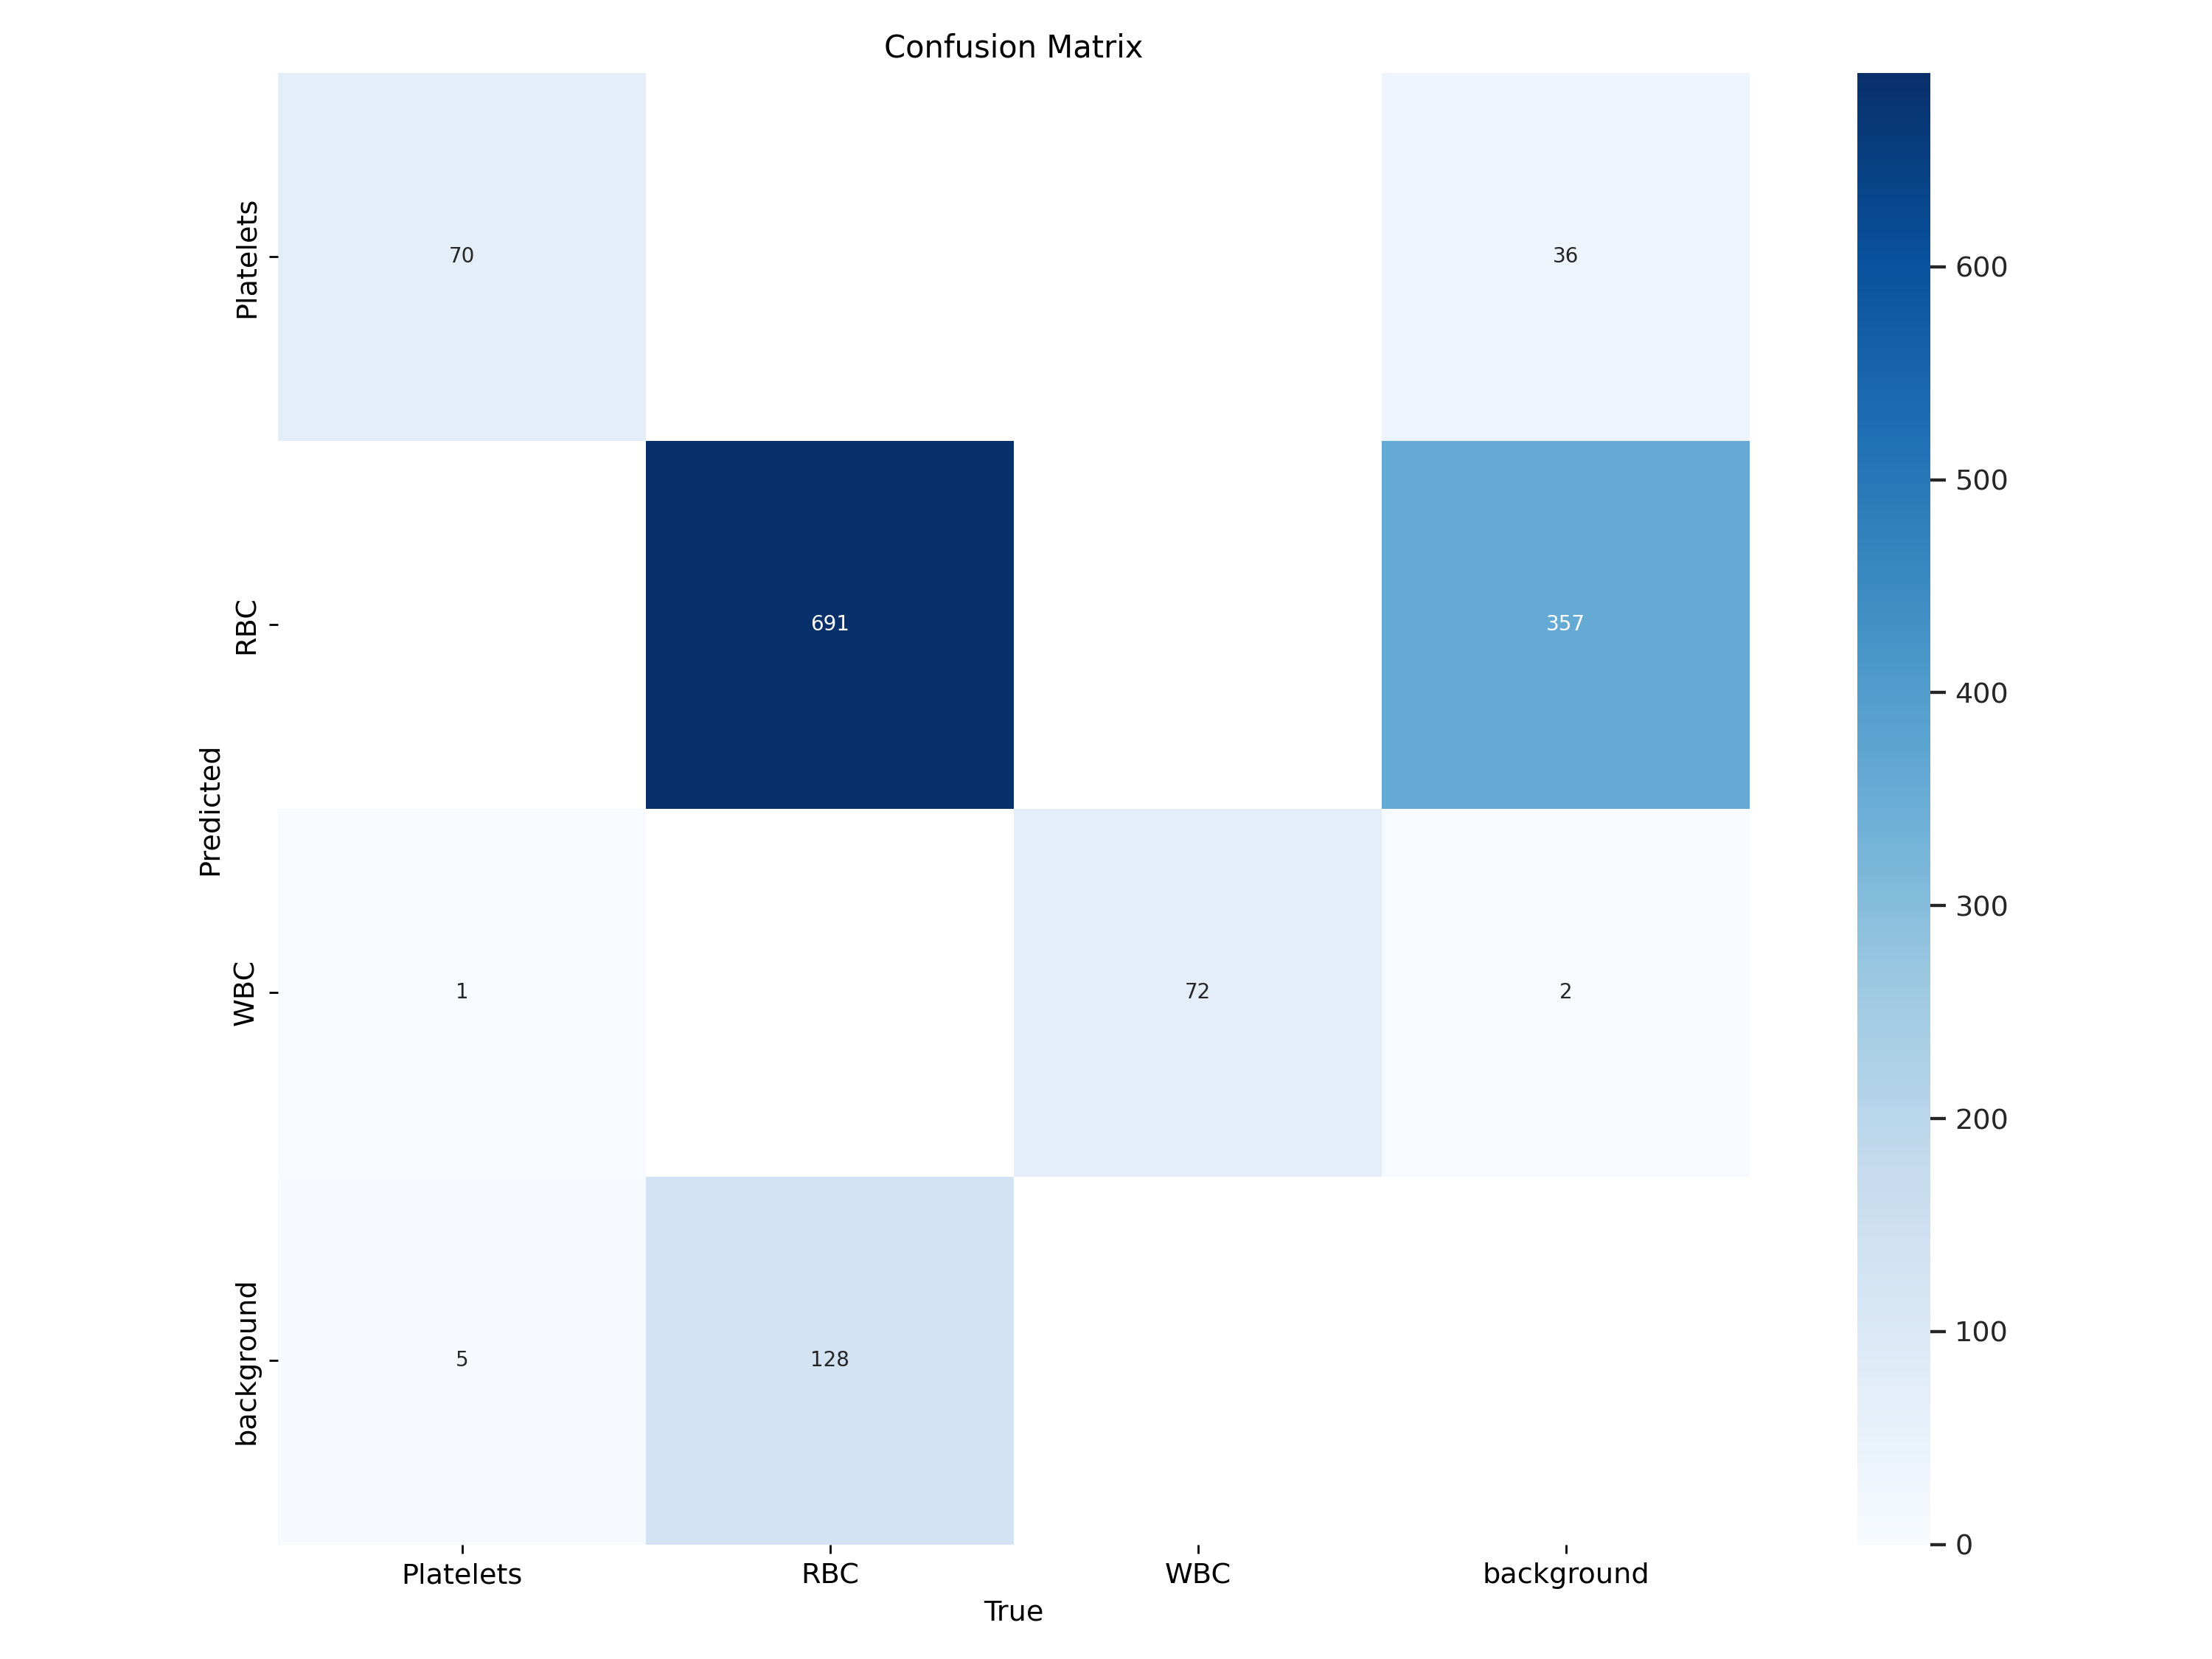

In [22]:
#runs/detect/V8/train_0605_FP

Image(filename= f'runs/detect/V8/train_0605_FP/confusion_matrix.png', width =800)

In [24]:
valid_fp = YOLO('runs/detect/V8/train_0605_FP/weights/best.pt')
valid_fp.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


                   all         73        967      0.806      0.862      0.868       0.48
             Platelets         73         76      0.736      0.844      0.827      0.347
                   RBC         73        819      0.721      0.741      0.805      0.463
                   WBC         73         72      0.961          1      0.974      0.631
Speed: 0.1ms preprocess, 7.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x149885c49750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## YOLOv8 Hyperparameter tuning ( 10 iterations)

- In this section , based on the full set of parameters, we hyper parameter tune and get the model with the best performance

In [26]:
HP_model =YOLO('yolov8x.pt')

In [27]:
HP_tune = HP_model.tune(**full_params)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.1, 'lrf': 0.0001, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 10.0, 'cls': 2.0, 'dfl': 2.0, 'hsv_h': 0.02, 'hsv_s': 0.5, 'hsv_v': 0.3, 'degrees': 5.0, 'translate': 0.05, 'scale': 0.3, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.3, 'bgr': 0.0, 'mosaic': 0.5, 'mixup': 0.0, 'copy_paste': 0.0}
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.766       25.9      3.744        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      3.818      11.45      3.622        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G      3.924      11.93      3.866        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.868      10.37       3.82        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.882      10.86      3.793        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      3.892      10.19      3.789        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.892      13.06      3.874        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.6G      3.943      9.843      3.921        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.6G      3.871      9.695      3.829        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      3.818      8.774      3.792        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G      3.767       8.31      3.799        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      3.463      7.935      3.651        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G      3.355      7.152      3.527        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.59G       3.02      6.282      3.284        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      2.786      5.958      3.127        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      2.471      5.498      2.957        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      2.353      5.152      2.862        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      2.293      5.039       2.79        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      2.192      4.817      2.684        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      2.128      4.595      2.615        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      2.081       4.55      2.585        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      2.026       4.46      2.534        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G       2.01      4.311       2.52        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G       1.97       4.22      2.485        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.951      4.195      2.461        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         73        967      0.805      0.826      0.879       0.48

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all         73        967      0.754      0.886      0.879      0.479
             Platelets         73         76       0.74      0.882      0.871      0.325
                   RBC         73        819      0.661      0.777      0.785      0.477
                   WBC         73         72      0.862          1      0.981      0.635
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (303.80s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.51949 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80513, 'metrics/recall(B)': 0.82624, 'metrics/mAP50(B)': 0.87879, 'metrics/mAP50-95(B)': 0.47956, 'val/box_loss': 2.02525, 'val/cls_loss': 4.12401, 'val/dfl_loss': 2.45161, 'fitness': 0.5

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.09996, momentum=0.93873) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.726      18.98      3.576        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      3.748      11.74      3.493        259        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G      3.754      10.83      3.543        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.691      10.19      3.543        217        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.654      9.684      3.562        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      3.608       12.4      3.608        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.369      9.435      3.531        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      3.242      8.796      3.462        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G       3.08        8.2      3.378        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      3.102        7.9      3.432        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G       3.12      8.648      3.935        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.29G      2.875      7.054      3.192        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      2.776      6.814      3.116        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      2.744      6.551      3.107        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.31G      2.601      6.011      2.977        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      2.381      5.343      2.869        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      2.322      5.233      2.823        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      2.242      5.076      2.761        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      2.206      4.897      2.711        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      2.212      4.765      2.699        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      2.152      4.652       2.66        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      2.081      4.518      2.593        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      2.054      4.416      2.566        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G       2.02      4.302      2.538        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      2.007      4.289      2.514        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all         73        967      0.778      0.862      0.851      0.486

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


                   all         73        967      0.778      0.862      0.851      0.486
             Platelets         73         76      0.731      0.816      0.771      0.297
                   RBC         73        819      0.683      0.772      0.792      0.486
                   WBC         73         72       0.92          1      0.989      0.674
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 2/10 iterations complete ✅ (605.36s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.52257 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.77819, 'metrics/recall(B)': 0.86249, 'metrics/mAP50(B)': 0.85129, 'metrics/mAP50-95(B)': 0.48604, 'val/box_loss': 2.05399, 'val/cls_loss': 4.20098, 'val/dfl_loss': 2.49518, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.09538, momentum=0.93983) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.543      23.27      3.887        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.32G      3.535      10.03      3.628        260        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.3G      3.562      10.01      3.635        205        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.568       10.6      3.606        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.551      10.11      3.598        202        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      3.609      10.18      3.625        187        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.542      9.529      3.572        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      3.463      9.826      3.459        242        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G       3.32      9.423      3.283        233        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      3.076      8.722      2.879        236        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      2.933      8.078       2.75        180        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G      2.747      7.208      2.615        234        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      2.644      6.694      2.555        204        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      2.484      6.121      2.404        199        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      2.379      5.654      2.304        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      2.132      4.905      2.109        158        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G       2.06      4.564      2.049        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.996      4.281      1.977        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.949      4.092      1.944        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.885       3.96      1.891        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.887      3.889      1.901        162        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.826      3.757      1.847        180        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.797      3.673       1.83        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.754      3.596      1.803        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.754      3.595      1.802        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         73        967      0.794      0.901      0.868      0.507

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all         73        967      0.794      0.901      0.869      0.507
             Platelets         73         76      0.755      0.855      0.813      0.329
                   RBC         73        819      0.678      0.847      0.826       0.52
                   WBC         73         72      0.949          1      0.968      0.672
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 3/10 iterations complete ✅ (910.39s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.5

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.09592, momentum=0.93971) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.609      18.65      3.906        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.32G      3.554      9.812      3.748        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.3G      3.585      9.644       3.66        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.643      11.63      3.797        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.61G       3.68      9.627      3.858        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      3.575       9.42       3.81        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.402      9.177      3.627        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      3.336      9.546      3.597        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.6G      3.225       8.46       3.67        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      3.033      9.228      3.606        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G      3.056      8.002      3.676        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G       2.93      7.274      3.509        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      2.781      6.703      3.355        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.61G       2.58      6.129      3.225        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      2.449      5.737      3.088        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      2.206      5.086      2.934        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      2.147      5.288      2.899        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      2.085      4.767      2.822        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      2.002      4.553      2.743        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.977      4.491      2.722        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.943      4.352      2.701        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.894       4.11      2.655        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G       1.88       3.97      2.644        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.846      3.875      2.613        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.841      3.866      2.601        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


                   all         73        967      0.722      0.822      0.824      0.453

25 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


                   all         73        967      0.718      0.819      0.824      0.452
             Platelets         73         76      0.685      0.711      0.704      0.261
                   RBC         73        819      0.701      0.746      0.798      0.494
                   WBC         73         72      0.768          1      0.969        0.6
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 4/10 iterations complete ✅ (1208.26s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.93983) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.544      22.18       3.91        202        416: 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.31G      3.527      10.82      3.715        261        416: 100%|██████████| 48/48 [00:09<00:00,  4.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.29G      3.331       9.35      3.766        205        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.237       9.21      3.803        215        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.304      8.876       3.82        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      3.207      9.228      3.747        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.085      8.472      3.732        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      3.021       8.49        3.6        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.6G      3.057      8.232      3.686        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      2.838      7.411      3.502        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.59G      2.802      7.232       3.47        181        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      2.759      7.433      3.536        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      2.704      6.755      3.356        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      2.603      6.506      3.289        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.6G      2.473      6.161      3.196        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      2.295      5.519      3.131        158        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      2.251      5.298      3.116        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      2.165       5.08      3.023        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      2.102      4.927      2.947        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G       2.06      4.721      2.887        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G      2.052      4.709      2.894        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G       2.02      4.523      2.856        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.29G      1.997      4.454      2.833        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.946      4.319      2.785        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.933      4.245      2.773        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         73        967      0.766      0.756      0.805      0.404

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 136.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all         73        967      0.765      0.757      0.805      0.404
             Platelets         73         76      0.869      0.611      0.736       0.26
                   RBC         73        819      0.705      0.757      0.793      0.488
                   WBC         73         72       0.72      0.903      0.886      0.464
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train5
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 5/10 iterations complete ✅ (1508.67s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: Adam(lr=0.09409, momentum=0.97195) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.615      20.77      3.719        200        416: 100%|██████████| 48/48 [00:10<00:00,  4.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      3.728      10.54      3.773        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G      3.553      10.76      3.584        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.6G      3.532      10.63      3.661        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.494      10.27      3.662        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G       3.34      10.11      3.561        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      3.307      11.62      3.544        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      3.239      10.26      3.487        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.6G      3.095      9.366      3.405        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      3.049      8.424      3.364        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.59G      2.967      7.967      3.306        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G      2.922      8.689      3.303        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      2.865       8.24      3.224        206        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      2.673      7.253      3.073        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.31G      2.606      6.805      2.999        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      2.387      6.249      2.925        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      2.289      5.881      2.841        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G       2.23      5.624      2.787        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G       2.22      5.644      2.758        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      2.161      5.434      2.699        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      2.179      5.353      2.725        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      2.094      5.187      2.655        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      2.044      5.134      2.607        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      2.011      5.015      2.579        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      2.012      4.945      2.576        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


                   all         73        967      0.785      0.816      0.818      0.413

25 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 136.7MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


                   all         73        967      0.786      0.819      0.817      0.412
             Platelets         73         76      0.722      0.682      0.711      0.233
                   RBC         73        819      0.663      0.779      0.769      0.444
                   WBC         73         72      0.973      0.996      0.972      0.559
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train6
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 6/10 iterations complete ✅ (1806.31s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.93873) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      3.122      38.32      3.747        229        416: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G       3.08      12.42      3.672        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G      2.978      13.53      3.584        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.3G      2.877      12.85      3.692        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.29G      3.041      12.95      3.889        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.29G      2.902       12.6      3.899        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.28G      2.887       11.9      3.943        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.32G      2.661      11.15       3.65        253        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.3G       2.63      11.22      3.626        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.29G      2.526      10.75      3.542        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.29G      2.507      10.03      3.585        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.27G      2.429      10.16      3.526        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.28G      2.312      9.046      3.385        272        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.28G      2.176      8.048      3.266        265        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.31G      2.153      7.871      3.232        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.28G      2.016      7.157       3.21        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.29G      1.962       7.05      3.162        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.29G      1.899      6.434      3.078        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.28G       1.86      6.175      3.004        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.29G      1.845      5.885       2.97        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.29G      1.804      5.676      2.945        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.28G      1.761      5.442        2.9        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.29G      1.726      5.277      2.858        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.27G      1.701      5.118      2.834        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.27G      1.701      5.129      2.825        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         73        967      0.818      0.764      0.837      0.429

25 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 136.7MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all         73        967      0.819      0.764      0.836       0.43
             Platelets         73         76      0.814      0.605      0.752      0.309
                   RBC         73        819      0.741        0.7      0.791       0.45
                   WBC         73         72      0.901      0.986      0.967      0.529
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train7
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 7/10 iterations complete ✅ (2102.86s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.94712) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.32G      5.183      24.89      4.172        207        416: 100%|██████████| 48/48 [00:10<00:00,  4.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.59G      5.113      11.36       3.98        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G      5.052      11.71      3.921        197        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      4.818       10.4      4.011        250        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.61G      4.774      10.71      4.041        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      4.576      10.49       3.99        269        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.61G      4.479      9.888      4.097        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.58G       4.32      9.786      4.019        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.6G      4.213      8.973      3.836        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.59G      4.106      8.403      3.771        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      4.059      8.584      3.763        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.61G      3.938      7.996       3.69        181        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.59G      3.738      7.388      3.598        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.61G      3.704      6.945      3.552        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.6G      3.603      6.947      3.528        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      3.306      6.179      3.409        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      3.343      6.058      3.421        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      3.191      5.698      3.316        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      3.068      5.369      3.221        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      3.018      5.104      3.175        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      2.963      4.938      3.154        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      2.859      4.778      3.086        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      2.811      4.627      3.049        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      2.752      4.492      3.015        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      2.737       4.51      2.992        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         73        967      0.754      0.818      0.831      0.451

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 136.7MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all         73        967      0.752      0.818       0.83       0.45
             Platelets         73         76      0.632      0.658      0.728      0.303
                   RBC         73        819        0.7      0.797      0.803      0.482
                   WBC         73         72      0.924          1       0.96      0.566
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 8/10 iterations complete ✅ (2401.89s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: Adam(lr=0.06516, momentum=0.86315) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.748       22.1      5.499        211        416: 100%|██████████| 48/48 [00:10<00:00,  4.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.59G       3.68      8.952      5.203        212        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.6G       3.68      9.302      4.979        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      3.754      8.789      5.137        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.6G       3.67      8.856      4.924        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.58G      3.659      8.891       4.95        264        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G       3.65      8.834      5.001        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.57G      3.594      8.751      5.013        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.59G      3.594      8.974      4.958        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.58G      3.568      8.702      4.886        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.59G      3.538      8.297      4.875        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G      3.407      7.959       4.78        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.58G      3.272      7.833      4.551        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.59G       3.11       7.04      4.286        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G      2.885      6.578      3.933        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      2.603      5.884      3.747        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      2.432      5.264      3.715        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G      2.311      4.716      3.606        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.58G      2.188      4.355      3.488        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      2.089      4.088      3.377        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G      2.043      3.896      3.321        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.976      3.689      3.257        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.58G      1.944      3.649      3.201        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.902      3.491      3.149        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      1.881      3.469      3.115        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         73        967      0.763       0.89      0.869      0.483

25 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 136.7MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all         73        967      0.766       0.89       0.87      0.483
             Platelets         73         76      0.807      0.827      0.841      0.346
                   RBC         73        819      0.625      0.843      0.796      0.467
                   WBC         73         72      0.866          1      0.971      0.637
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 9/10 iterations complete ✅ (2700.85s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54308 observed at iteration 3
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.7938, 'metrics/recall(B)': 0.90088, 'metrics/mAP50(B)': 0.86758, 'metrics/mAP50-95(B)': 0.50702, 'val/box_loss': 1.83348, 'val/cls_loss': 3.46686, 'val/dfl_loss': 1.74687, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.91995) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      3.763      14.41      4.227        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      3.848      11.26      4.256        260        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.28G      3.773      11.11      4.119        206        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.59G      3.771      12.33      4.193        216        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      3.766      11.23      4.066        207        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      3.795       12.1      4.136        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G       3.82      11.41      4.311        216        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      3.843      10.65      4.287        242        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G      3.745      10.55      4.237        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      3.742      10.55      4.208        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      3.657      10.41      4.174        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.29G      3.398      9.993      3.983        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      3.258      10.34      4.147        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G       2.97      8.052       3.67        199        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
  0%|          | 0/48 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.31G       2.82      7.187      3.526        246        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      2.549      6.429       3.39        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      2.375      5.932      3.221        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      2.339      5.565      3.175        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      2.239      5.225      3.055        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      2.159       4.97      2.972        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G       2.11      4.809      2.935        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      2.038      4.646      2.874        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      2.012      4.526      2.842        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G       1.97      4.385      2.802        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.961      4.407      2.777        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         73        967      0.785      0.888      0.858      0.508

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 136.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]


                   all         73        967      0.787      0.887      0.859      0.509
             Platelets         73         76      0.759      0.855      0.803      0.342
                   RBC         73        819      0.652      0.807      0.788      0.483
                   WBC         73         72       0.95          1      0.985      0.701
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 10/10 iterations complete ✅ (3005.09s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.54326 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.78546, 'metrics/recall(B)': 0.88786, 'metrics/mAP50(B)': 0.8584, 'metrics/mAP50-95(B)': 0.50824, 'val/box_loss': 2.0148, 'val/cls_loss': 4.30545, 'val/dfl_loss': 2.74861, 'fitness': 

In [37]:
HP_best_params ={
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True,
    'cos_lr': True ,
    'val': True # use the cosine learning rate scheduler,
,'lr0': 0.1
,'lrf': 0.0001
,'momentum': 0.91995
,'weight_decay': 0.00045
,'warmup_epochs': 3.15181
,'warmup_momentum': 0.86025
,'box': 10.0
,'cls': 2.04019
,'dfl': 2.26435
,'hsv_h': 0.02017
,'hsv_s': 0.49815
,'hsv_v': 0.32694
,'degrees': 4.9729
,'translate': 0.04812
,'scale': 0.30123
,'shear': 0.0
,'perspective': 0.0
,'flipud': 0.0
,'fliplr': 0.27192
,'bgr': 0.0
,'mosaic': 0.49858
,'mixup': 0.0
,'copy_paste': 0.0

}

In [35]:
HP_best_mod = YOLO('runs/detect/V8/Tuned_HP_0605/tune/weights/best.pt')
HP_best_results = HP_best_mod.train(**HP_best_params)

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.91995) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      9.25G      2.235      5.078      2.981        202        416: 100%|██████████| 48/48 [00:10<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         73        967      0.599      0.758      0.749      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      9.48G      2.254      5.293       2.98        260        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]

                   all         73        967      0.479      0.059     0.0465     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      9.19G      2.417      5.815      3.137        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         73        967      0.597      0.748      0.764      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.45G       2.21      5.113      2.931        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]

                   all         73        967      0.597      0.748      0.764      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      9.47G      2.119      4.782      2.823        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]

                   all         73        967      0.724      0.627      0.699      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.45G      2.113      4.782      2.832        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         73        967      0.597      0.544       0.55      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      9.44G      2.184      4.913      2.908        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]

                   all         73        967      0.353     0.0104    0.00901     0.0051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.44G      2.278      5.274      3.004        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         73        967      0.631      0.665      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      9.46G      2.153      4.822      2.887        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]

                   all         73        967        0.6      0.729      0.743      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.47G      2.099      4.681      2.847        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         73        967      0.659      0.838      0.803      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      9.44G      2.052      4.571      2.792        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         73        967      0.658      0.718      0.742      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      9.44G      1.995      4.524      2.729        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         73        967      0.684      0.737      0.742      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      9.47G      2.006      4.466      2.719        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        967      0.641      0.751      0.808      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      9.43G      1.972      4.489      2.712        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         73        967      0.696       0.83      0.819      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      9.46G      1.957       4.36      2.676        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         73        967      0.734      0.738      0.805      0.399


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.43G      1.849      4.059      2.656        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         73        967      0.755      0.852      0.872      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.43G       1.91      4.179      2.728        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]

                   all         73        967      0.755      0.855      0.859      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      9.43G      1.837      3.999       2.65        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         73        967      0.719      0.582      0.661      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      9.45G      1.801      3.932      2.601        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        967      0.767      0.857      0.862      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.43G      1.756       3.84      2.553        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]

                   all         73        967      0.793      0.903       0.88      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      9.44G      1.759      3.799      2.573        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all         73        967      0.774      0.909      0.857      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      9.44G      1.747      3.773      2.562        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        967      0.805      0.837      0.887      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      9.45G      1.733      3.739      2.542        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         73        967      0.796      0.916      0.886      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      9.44G      1.697      3.655      2.515        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]

                   all         73        967      0.783      0.887       0.85      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.44G      1.711      3.662      2.509        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all         73        967      0.806      0.882      0.882      0.528



25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


                   all         73        967      0.793      0.903      0.879      0.537
             Platelets         73         76      0.785      0.866      0.833      0.397
                   RBC         73        819      0.632      0.884      0.833      0.528
                   WBC         73         72      0.962      0.958      0.971      0.687
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


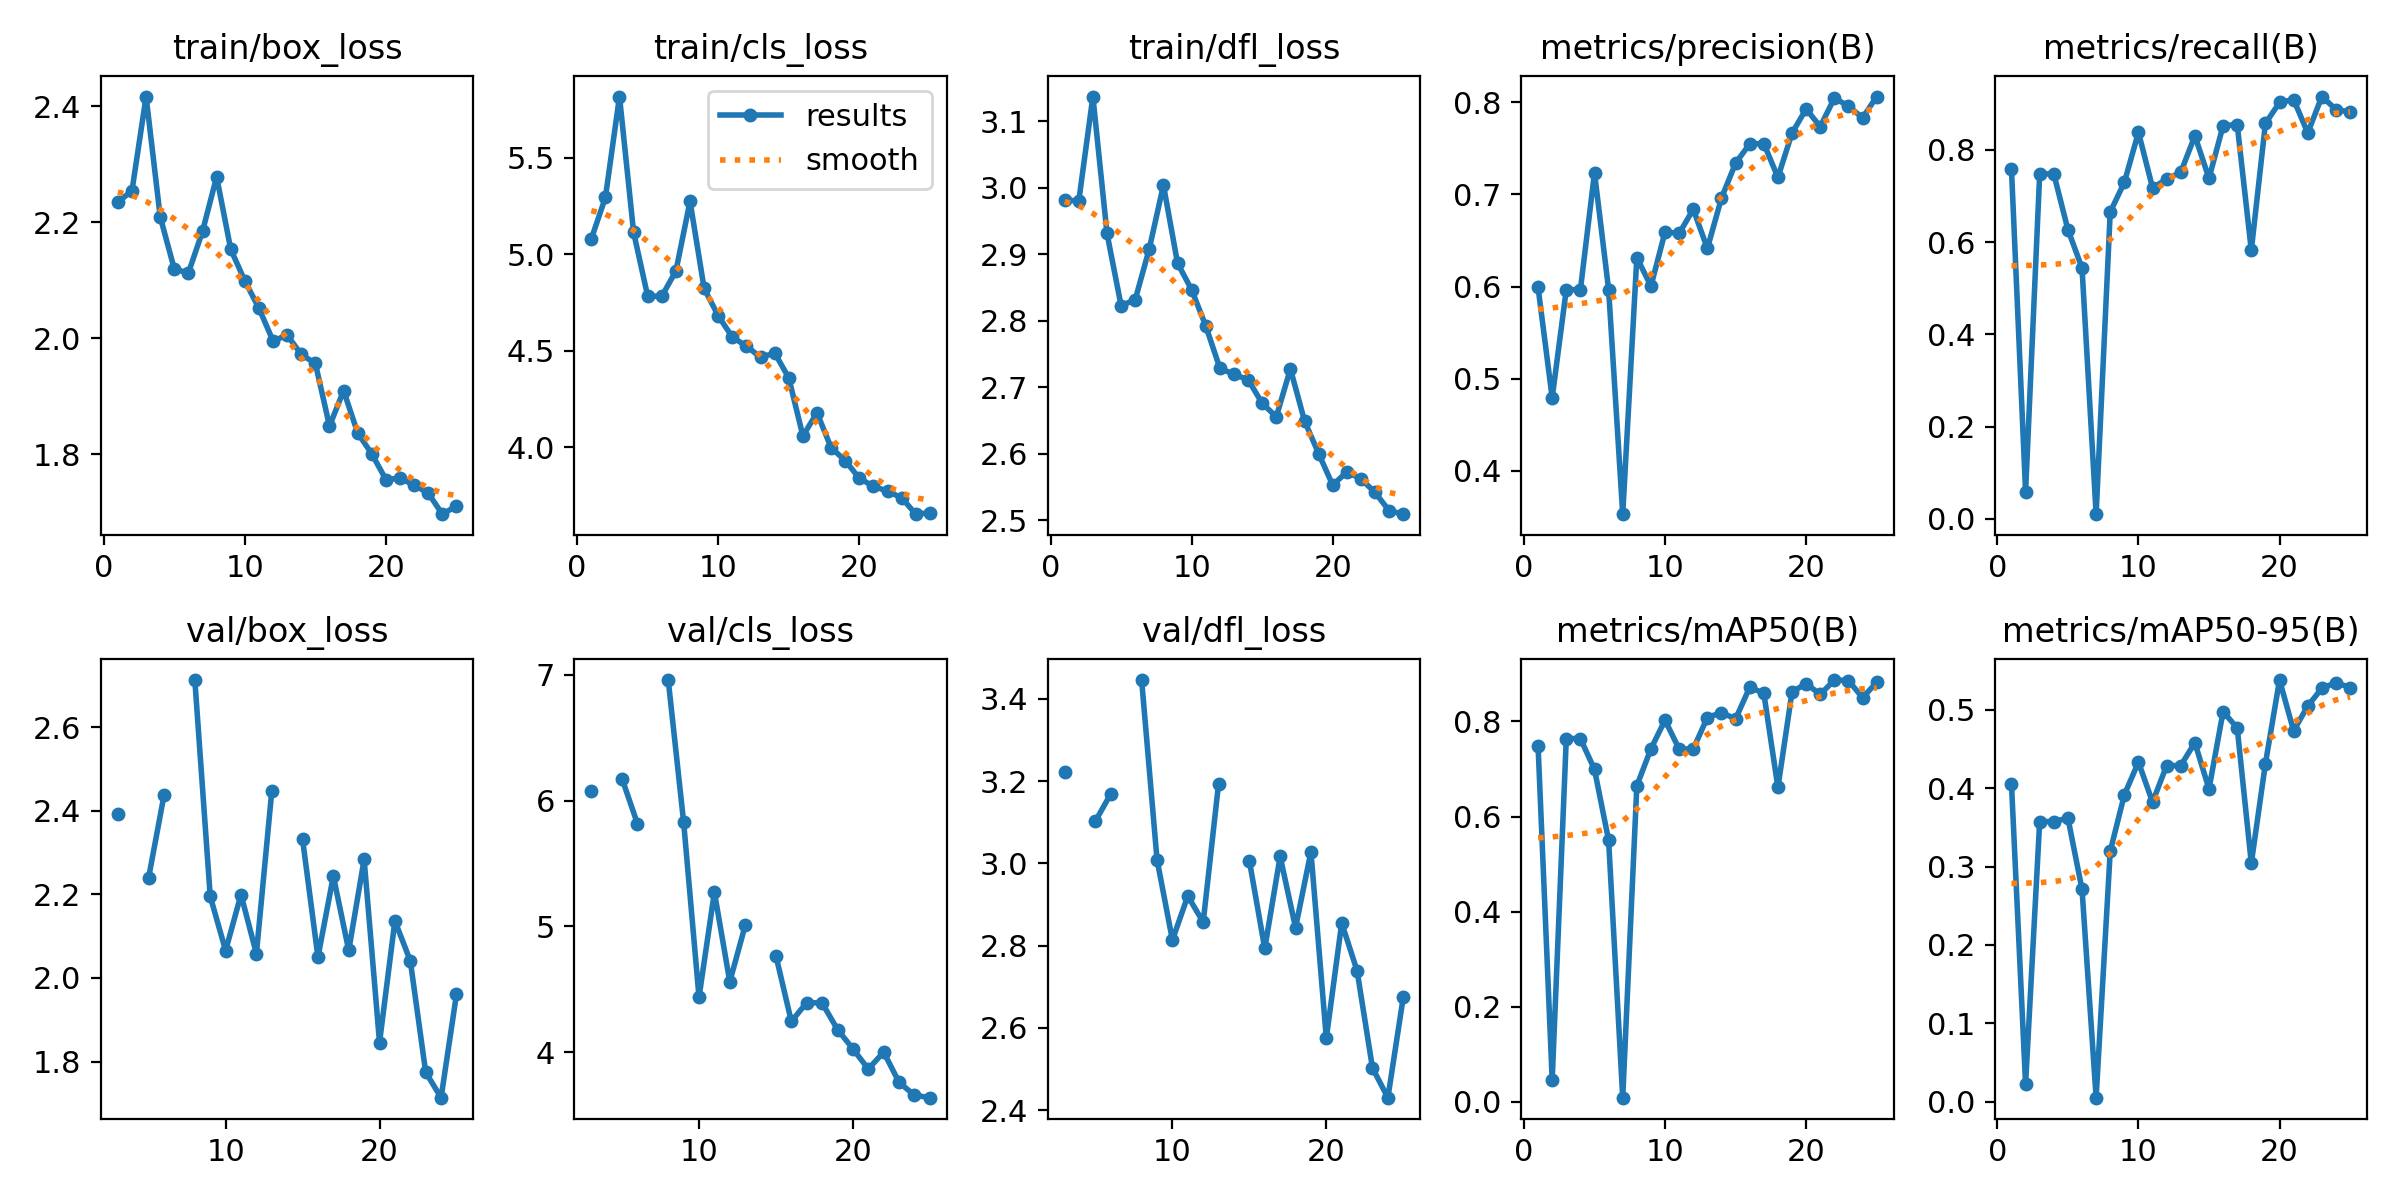

In [40]:
Image(filename= f'runs/detect/V8/train_HP_0506/results.png', width =800)

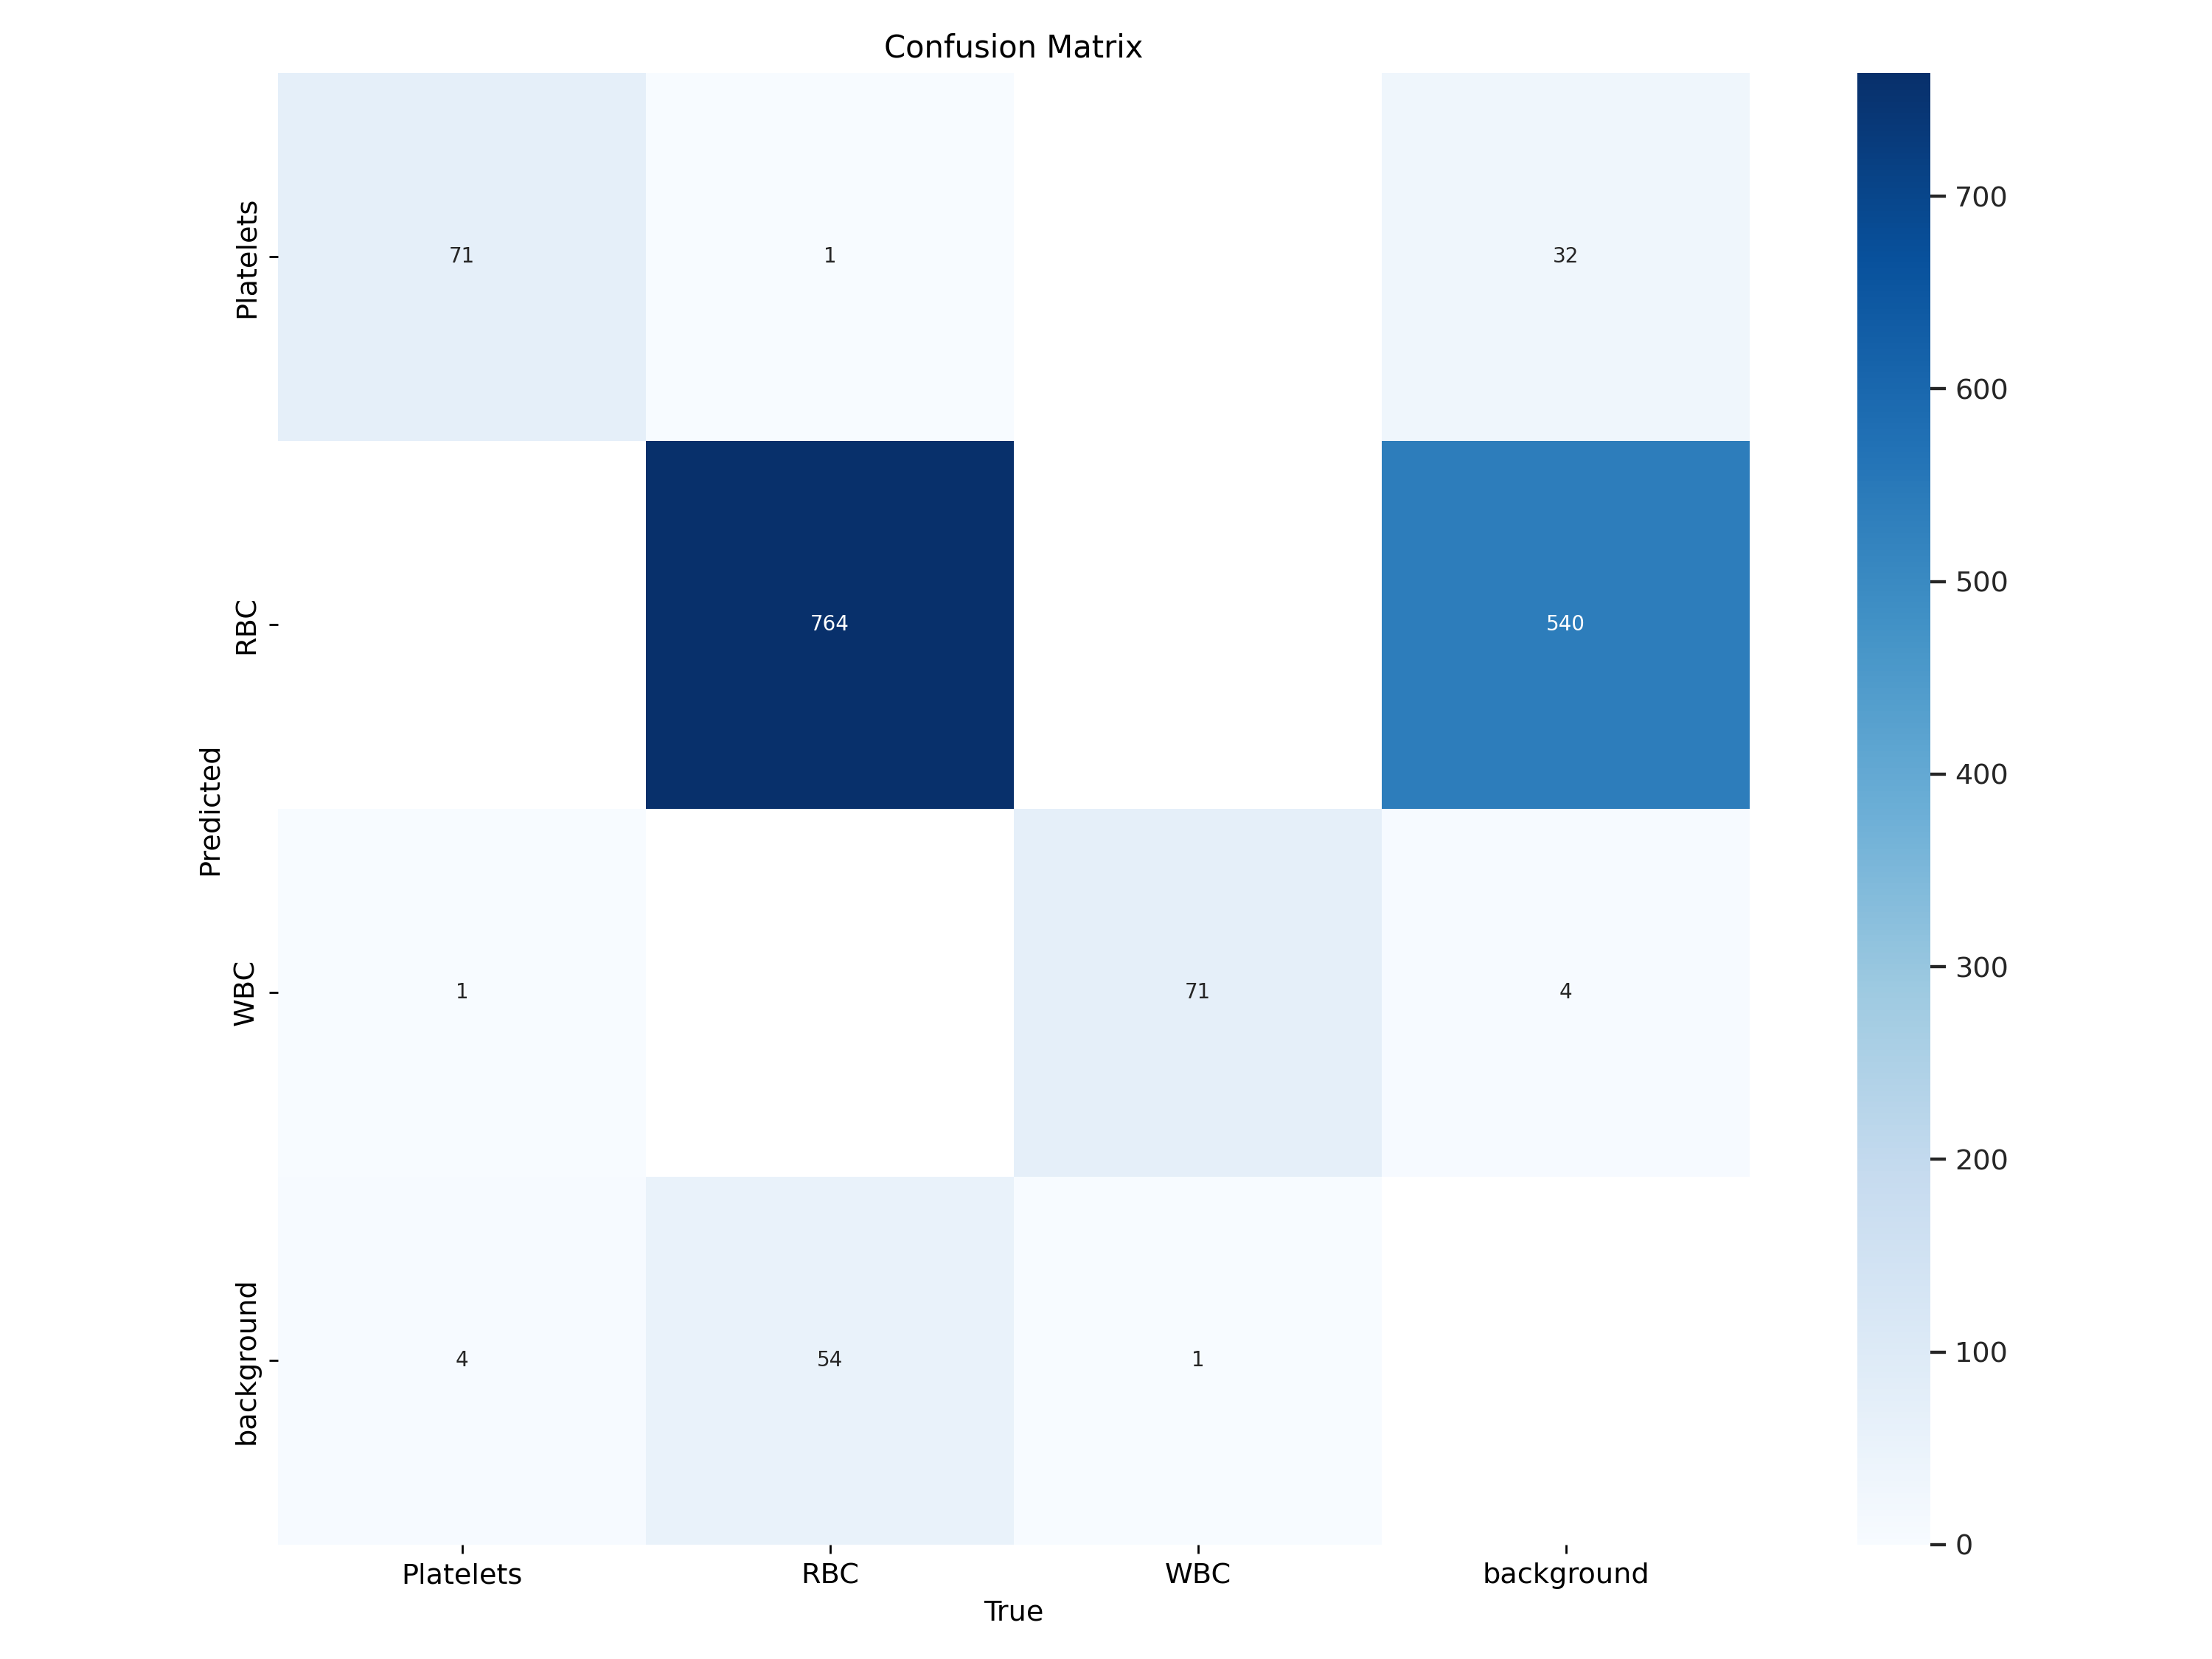

In [38]:
# runs/detect/V8/train_HP_0506
Image(filename= f'runs/detect/V8/train_HP_0506/confusion_matrix.png', width =800)


In [39]:
### Validation on Best Hyperparameters

HP_val= YOLO('runs/detect/V8/train_HP_0506/weights/best.pt')
HP_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


                   all         73        967      0.793      0.903       0.88      0.535
             Platelets         73         76      0.785      0.866      0.834      0.394
                   RBC         73        819      0.632      0.885      0.834      0.527
                   WBC         73         72      0.962      0.958      0.971      0.686
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x149882949650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## YOLO V8 100 Iterations and 25 Epochs 

In [12]:
params  = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': True # specifically train the model
}

In [13]:
model = YOLO('yolov8x.pt')

In [ ]:
results =  model.tune( iterations = 100, **params)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/100 with hyperparameters: {'lr0': 0.1, 'lrf': 0.0001, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tr

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.42G      3.111      9.418      2.581        246        416: 100%|██████████| 48/48 [00:22<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      3.056      2.873      2.417        266        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


                   all         73        967    0.00243      0.116    0.00299   0.000634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      3.036      2.876      2.456        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967   4.57e-05    0.00122   2.29e-05   2.29e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      2.808      2.789      2.312        255        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967   4.57e-05    0.00122   2.29e-05   2.29e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.417      2.494      2.128        329        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967   4.57e-05    0.00122   2.29e-05   2.29e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.66G      2.283      2.372      2.023        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967   4.57e-05    0.00122   2.29e-05   2.29e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.66G      2.171      2.163      1.925        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967       0.46      0.144      0.236     0.0921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      2.155      2.036      1.914        341        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]


                   all         73        967     0.0689      0.745      0.242     0.0553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G      2.037      1.862      1.836        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


                   all         73        967      0.248      0.322      0.225      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.65G       2.03      1.814       1.83        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.584      0.473      0.478       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.67G      1.933      1.687      1.787        331        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.604      0.456      0.418      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.66G      1.875      1.626      1.762        326        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967     0.0715      0.652      0.349      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.792      1.527      1.701        287        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.478      0.383      0.467      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.743      1.464      1.674        327        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


                   all         73        967      0.325      0.592      0.391      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.724      1.411      1.644        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.623      0.625       0.58      0.316
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.606      1.334      1.621        152        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.711      0.312      0.488      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.581      1.296      1.606        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.662      0.611      0.779      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G       1.55      1.226      1.571        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967       0.73      0.569      0.631      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G       1.52      1.199      1.551        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967       0.84      0.578      0.855      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.477      1.151      1.518        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.757       0.68      0.852      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.476      1.142      1.514        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.801      0.762      0.853      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G      1.435      1.113      1.494        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.784       0.84      0.872      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.61G       1.41      1.078      1.478        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.781      0.815      0.865      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.62G      1.391      1.064      1.468        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.764      0.845      0.857       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.393      1.069      1.463        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.768      0.838      0.864      0.516

25 epochs completed in 0.082 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]


                   all         73        967      0.768      0.838      0.864      0.516
             Platelets         73         76      0.855      0.632      0.841      0.376
                   RBC         73        819      0.526      0.897      0.785      0.487
                   WBC         73         72      0.923      0.986      0.966      0.685
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/100 iterations complete ✅ (375.43s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55049 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76782, 'metrics/recall(B)': 0.83838, 'metrics/mAP50(B)': 0.86375, 'metrics/mAP50-95(B)': 0.51568, 'val/box_loss': 1.30335, 'val/cls_loss': 1.52674, 'val/dfl_loss': 1.38156, 'fitness': 0

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.95229) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.15G      3.053      6.368       1.98        246        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      3.061      2.369      1.902        265        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      2.994      2.354      1.832        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


                   all         73        967    0.00487       0.13    0.00402    0.00128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      3.008      2.339      1.823        253        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


                   all         73        967     0.0053      0.142    0.00597    0.00118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.978      2.324      1.839        321        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]


                   all         73        967    0.00445      0.109    0.00464   0.000972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.66G       2.91       2.21      1.813        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]


                   all         73        967    0.00194    0.00326   0.000987    0.00032

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.66G      2.614      2.112      1.723        195        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967    0.00437     0.0867    0.00258   0.000896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      2.372      1.976      1.592        336        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]


                   all         73        967    0.00977      0.261     0.0727     0.0257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G      2.216      1.853      1.527        286        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967     0.0108       0.22     0.0947     0.0224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G       2.16      1.761      1.467        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.731       0.12      0.162     0.0387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.66G      2.071      1.578      1.435        324        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]


                   all         73        967      0.551      0.351      0.403      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G       1.99      1.511      1.447        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967      0.115      0.659      0.392      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.881      1.409       1.36        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.557      0.497      0.432      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.816      1.303      1.343        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967      0.475      0.455      0.502      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.762      1.215      1.291        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.459       0.27      0.401      0.142
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.636      1.213      1.281        153        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.267      0.559      0.403       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.614       1.14      1.276        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.815       0.51      0.828      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.584      1.082      1.263        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.844      0.499      0.718      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.563      1.061      1.247        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.848       0.56      0.812      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.522       1.02      1.221        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.867      0.566      0.801      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.516      1.014      1.225        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.851      0.546      0.829      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G      1.484     0.9809      1.208        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.789      0.619      0.823      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.453     0.9673       1.19        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.814      0.621      0.844      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.444     0.9445      1.194        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.887       0.54      0.831      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.447     0.9443      1.191        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.843      0.629      0.837      0.492

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


                   all         73        967      0.887       0.54      0.831      0.499
             Platelets         73         76          1     0.0335      0.801      0.363
                   RBC         73        819      0.723      0.587      0.728       0.43
                   WBC         73         72      0.937          1      0.965      0.703
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 2/100 iterations complete ✅ (678.20s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55049 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76782, 'metrics/recall(B)': 0.83838, 'metrics/mAP50(B)': 0.86375, 'metrics/mAP50-95(B)': 0.51568, 'val/box_loss': 1.30335, 'val/cls_loss': 1.52674, 'val/dfl_loss': 1.38156, 'fitness': 0

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.09907, momentum=0.94815) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00048), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      3.018       6.65      2.544        232        416: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.67G      3.049      2.902       2.42        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967    0.00329     0.0879    0.00208   0.000731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      3.019      2.818      2.458        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967    0.00986      0.264    0.00977    0.00261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.989      2.868      2.413        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967   0.000944     0.0252   0.000508   0.000125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.747      2.779       2.28        391        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967    0.00905      0.201     0.0335      0.009

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      2.351      2.469      2.024        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967     0.0103      0.229    0.00992    0.00316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      2.208      2.379      1.985        290        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]


                   all         73        967      0.821     0.0833     0.0963     0.0334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.65G      2.131      2.183      1.926        324        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.821     0.0833     0.0963     0.0334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      2.105      2.102      1.893        336        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.313       0.54      0.352      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.69G      2.041      1.909      1.859        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]


                   all         73        967      0.454      0.194      0.316      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.66G      1.992      1.802      1.825        303        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


                   all         73        967      0.254      0.483      0.352      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.876      1.659      1.796        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967      0.683      0.405      0.538      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.855      1.629      1.778        309        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.174      0.896      0.383      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.66G      1.763       1.53      1.696        287        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.286        0.9      0.698      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.704      1.439       1.66        311        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.152       0.77      0.413      0.144
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G        1.6      1.405      1.643        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.281      0.779      0.573      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.574      1.347      1.643        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.198      0.727      0.607      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.542       1.28      1.606        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.402      0.908      0.719       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.509      1.252      1.578        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.727      0.448      0.768      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.479      1.207      1.549        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.249      0.971      0.833      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.459      1.188      1.542        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


                   all         73        967       0.49      0.921      0.852      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G      1.447      1.168      1.542        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.784      0.418      0.832      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.61G      1.419      1.135      1.515        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.739       0.62      0.844      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.405      1.122      1.509        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.758      0.616      0.837      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.403      1.124      1.499        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.753      0.624      0.845        0.5

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]


                   all         73        967      0.753      0.624      0.845      0.498
             Platelets         73         76      0.889      0.105      0.822      0.359
                   RBC         73        819      0.419      0.952      0.768      0.481
                   WBC         73         72      0.951      0.815      0.944      0.654
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 3/100 iterations complete ✅ (980.96s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55049 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76782, 'metrics/recall(B)': 0.83838, 'metrics/mAP50(B)': 0.86375, 'metrics/mAP50-95(B)': 0.51568, 'val/box_loss': 1.30335, 'val/cls_loss': 1.52674, 'val/dfl_loss': 1.38156, 'fitness': 0

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.92134) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.32G      2.798       9.29      2.664        218        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      2.813      2.829      2.617        257        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967     0.0065     0.0783    0.00414    0.00108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.812      4.245      2.609        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967     0.0065     0.0783    0.00414    0.00108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      2.712      2.902      2.631        266        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967     0.0065     0.0783    0.00414    0.00108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.63G      2.472      2.623      2.545        305        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967     0.0065     0.0783    0.00414    0.00108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      2.349      2.391      2.452        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]


                   all         73        967     0.0191      0.143     0.0135     0.0039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.62G      2.194       2.27      2.377        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]


                   all         73        967      0.439      0.127      0.122     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      2.121      2.155      2.359        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.439      0.127      0.122     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      2.023      1.932      2.251        272        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.818      0.253      0.354      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.898      1.799      2.153        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967     0.0591      0.591      0.357      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      1.817      1.722      2.087        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967     0.0679      0.399      0.297      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.62G      1.748       1.64      2.008        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]


                   all         73        967      0.012      0.321      0.161     0.0924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.695      1.616      1.965        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


                   all         73        967    0.00225      0.229    0.00668    0.00176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.652      1.543      1.914        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967    0.00225      0.229    0.00668    0.00176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.612      1.477      1.876        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.375      0.474      0.452      0.234
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.476      1.339      1.844        158        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.395      0.609       0.57      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.469      1.304      1.841        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967     0.0124      0.332      0.242      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.419      1.216      1.797        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.679      0.352      0.581      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.408      1.165      1.778        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967       0.54      0.649      0.694      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.381      1.136      1.752        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.254      0.548      0.454       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.385      1.136       1.78        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.212      0.598      0.511      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G       1.36      1.096      1.744        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.274      0.808      0.706      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.345      1.073      1.733        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.243      0.894      0.761      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G       1.33      1.054      1.718        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.384      0.773      0.736      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.335      1.061      1.711        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.267      0.913      0.762      0.443

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 136.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


                   all         73        967      0.267      0.913      0.762      0.444
             Platelets         73         76      0.173      0.921      0.718      0.315
                   RBC         73        819     0.0384      0.998      0.816       0.54
                   WBC         73         72       0.59      0.819      0.751      0.476
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train5
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 4/100 iterations complete ✅ (1283.42s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55049 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76782, 'metrics/recall(B)': 0.83838, 'metrics/mAP50(B)': 0.86375, 'metrics/mAP50-95(B)': 0.51568, 'val/box_loss': 1.30335, 'val/cls_loss': 1.52674, 'val/dfl_loss': 1.38156, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: Adam(lr=0.09808, momentum=0.94702) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00047), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      3.051      9.166      2.557        203        416: 100%|██████████| 48/48 [00:10<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.32G      3.002      2.867      2.436        294        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967     0.0109      0.291     0.0109    0.00346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.36G      2.975      2.825      2.356        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]


                   all         73        967   0.000183    0.00488   9.36e-05   1.47e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.38G      2.736      2.773      2.289        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         73        967   0.000183    0.00488   9.36e-05   1.47e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.42G      2.469      2.749      2.208        295        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]


                   all         73        967    0.00822       0.22    0.00736    0.00223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.43G      2.244      2.505      2.021        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]


                   all         73        967      0.672      0.024    0.00713    0.00277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.4G      2.172      2.332      1.973        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967    0.00533      0.142    0.00397    0.00122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.39G      2.038      2.184      1.847        265        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967     0.0705      0.292     0.0924     0.0493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.42G      1.944      2.056      1.803        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]


                   all         73        967    0.00525       0.14    0.00373    0.00124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.41G      1.849      1.907      1.713        367        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         73        967      0.326      0.277      0.237     0.0957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.41G      1.855      1.794      1.709        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


                   all         73        967      0.536      0.422      0.437      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.44G      1.757      1.628      1.656        312        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.578      0.288      0.347      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.45G      1.693      1.509      1.613        281        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


                   all         73        967     0.0121      0.324      0.133     0.0643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.43G      1.673      1.506      1.616        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.526      0.212      0.391      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.42G      1.659      1.473      1.598        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


                   all         73        967      0.832      0.389      0.666       0.33
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.37G      1.558      1.434      1.605        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967      0.682      0.391      0.652      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.38G      1.512      1.315      1.575        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.468      0.776      0.724      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.39G      1.479      1.276      1.554        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.511      0.547      0.551      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.37G      1.461      1.244      1.528        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.227      0.577      0.533      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.37G       1.43      1.177      1.502        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.799      0.597      0.853      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.36G      1.412      1.164       1.49        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.842      0.588      0.845      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.37G      1.396      1.137      1.488        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.864      0.555      0.847      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.36G       1.36      1.099      1.465        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.792      0.561       0.82      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.37G      1.343      1.082       1.46        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.828      0.605      0.861      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.38G      1.346      1.083      1.461        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.859      0.588      0.867      0.504

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 136.7MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


                   all         73        967      0.859      0.586      0.867      0.506
             Platelets         73         76          1          0      0.851       0.39
                   RBC         73        819      0.642      0.777       0.77      0.428
                   WBC         73         72      0.934      0.982       0.98        0.7
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train6
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 5/100 iterations complete ✅ (1584.32s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55049 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76782, 'metrics/recall(B)': 0.83838, 'metrics/mAP50(B)': 0.86375, 'metrics/mAP50-95(B)': 0.51568, 'val/box_loss': 1.30335, 'val/cls_loss': 1.52674, 'val/dfl_loss': 1.38156, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.93742) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00053), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.382      9.721      2.742        252        416: 100%|██████████| 48/48 [00:10<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      2.365      3.012      2.611        267        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.214      2.974      2.544        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]


                   all         73        967      0.337    0.00927    0.00152   0.000346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      1.944      2.897       2.45        261        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967    0.00662      0.177    0.00575    0.00167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.67G      1.817      2.745      2.332        334        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]


                   all         73        967    0.00396     0.0532    0.00256   0.000449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      1.865      2.671      2.259        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.148      0.207      0.102     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      1.747      2.537       2.22        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.148      0.207      0.102     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.742      2.801      2.272        348        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]


                   all         73        967      0.148      0.207      0.102     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.642      2.297      2.147        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.751      0.202      0.185      0.079

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.63G      1.572      2.113       2.09        255        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.377      0.106       0.13      0.044

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.64G      1.504      2.007      2.062        340        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.286       0.22      0.154      0.047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.451      1.918      1.986        337        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967     0.0184      0.339      0.164     0.0467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      1.369      1.786      1.908        292        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.143      0.497      0.223     0.0743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.395       1.73      1.935        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967     0.0488      0.592      0.215     0.0696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.348      1.632      1.879        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]


                   all         73        967      0.919    0.00463    0.00636    0.00138
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G       1.25      1.587      1.868        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967       0.68      0.304      0.465      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      1.208      1.466      1.852        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]


                   all         73        967      0.527      0.636      0.636      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G      1.187      1.418      1.821        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.642      0.606      0.714      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.188      1.408      1.807        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.599      0.675      0.606      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.161      1.335      1.769        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.723      0.789       0.84      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.155      1.314      1.783        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.737      0.797      0.851      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.121       1.26      1.744        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.761      0.791      0.852      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.101      1.229      1.718        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.753       0.85      0.861      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.086       1.21      1.706        182        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.761       0.83      0.845      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.086      1.205      1.694        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.737      0.841      0.846      0.495

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 136.7MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


                   all         73        967      0.756       0.85      0.861      0.519
             Platelets         73         76      0.828       0.75      0.867      0.431
                   RBC         73        819      0.607      0.814      0.749      0.447
                   WBC         73         72      0.834      0.986      0.967      0.679
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train7
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 6/100 iterations complete ✅ (1888.01s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55158 observed at iteration 6
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.75267, 'metrics/recall(B)': 0.84977, 'metrics/mAP50(B)': 0.86066, 'metrics/mAP50-95(B)': 0.51724, 'val/box_loss': 1.01707, 'val/cls_loss': 1.39451, 'val/dfl_loss': 1.73739, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.93742) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00059), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.36G      2.463      10.27      2.784        257        416: 100%|██████████| 48/48 [00:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      2.437       2.76      2.634        272        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


                   all         73        967    0.00131      0.035   0.000869   0.000185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      2.426      2.728      2.632        215        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]


                   all         73        967    0.00836      0.223     0.0081    0.00309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.406      2.716      2.577        261        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


                   all         73        967     0.0128      0.438     0.0125    0.00295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.453      2.719      2.639        343        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


                   all         73        967    0.00778      0.195     0.0084    0.00185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      2.441       2.67       2.64        241        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967    0.00778      0.195     0.0084    0.00185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      2.401      2.663      2.615        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         73        967    0.00778      0.195     0.0084    0.00185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G       2.36       2.67      2.619        349        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967   0.000381     0.0102   0.000246   4.97e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      2.077      2.613       2.41        319        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


                   all         73        967     0.0261      0.325     0.0346    0.00857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.63G      1.839      2.302      2.237        266        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         73        967    0.00912      0.244     0.0625     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.736      2.155      2.129        349        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]


                   all         73        967     0.0431      0.406      0.106     0.0334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.688      2.073      2.099        349        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]


                   all         73        967     0.0115      0.307     0.0428      0.013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.629      1.912      2.016        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967     0.0104      0.279     0.0307    0.00726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.67G      1.573      1.763      1.996        340        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967     0.0117      0.313     0.0907     0.0331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.65G      1.511      1.629      1.912        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]


                   all         73        967     0.0121      0.324     0.0968      0.043
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.372      1.582      1.902        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.351      0.498      0.345      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.63G      1.354      1.472      1.897        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967     0.0568      0.509      0.158     0.0486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.286      1.368      1.826        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.841       0.17       0.37      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.253      1.321       1.77        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.825      0.157      0.356      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.62G      1.214      1.232      1.719        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.521      0.187      0.323      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.203      1.219      1.722        144        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.509      0.195      0.307      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.64G      1.165      1.183      1.691        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.841       0.19      0.541      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.145      1.143      1.666        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.519      0.198      0.368      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.124      1.106      1.659        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.845      0.188      0.536      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      1.117      1.101      1.639        198        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.849      0.193      0.546      0.226

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 136.7MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


                   all         73        967      0.849      0.192      0.549      0.227
             Platelets         73         76          1          0      0.526      0.263
                   RBC         73        819      0.547      0.575      0.586      0.267
                   WBC         73         72          1          0      0.535      0.151
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 7/100 iterations complete ✅ (2191.28s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55158 observed at iteration 6
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.75267, 'metrics/recall(B)': 0.84977, 'metrics/mAP50(B)': 0.86066, 'metrics/mAP50-95(B)': 0.51724, 'val/box_loss': 1.01707, 'val/cls_loss': 1.39451, 'val/dfl_loss': 1.73739, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: Adam(lr=0.09921, momentum=0.93742) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00056), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.389      10.94       2.78        251        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.362      2.608      2.598        268        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967    0.00149     0.0399   0.000836   0.000177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.65G      2.305      2.562      2.537        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967    0.00149     0.0399   0.000836   0.000177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.299      2.575      2.486        261        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967    0.00149     0.0399   0.000836   0.000177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.313       2.68      2.519        335        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967    0.00156      0.026   0.000887   0.000191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      2.176       2.52      2.436        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]


                   all         73        967      0.011       0.35    0.00785    0.00225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.68G      1.895      2.353      2.238        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967    0.00105     0.0238   0.000666   0.000189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.762      2.251      2.124        348        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]


                   all         73        967     0.0136      0.248     0.0212    0.00779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.67G      1.651      2.056      2.003        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.303      0.553      0.438      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.7G      1.619      1.967      1.969        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


                   all         73        967      0.027      0.257     0.0661     0.0182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.7G      1.547      1.809      1.893        340        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967      0.301      0.444       0.36      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.71G      1.495      1.711      1.854        338        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]


                   all         73        967     0.0116       0.31     0.0575     0.0261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.67G      1.475      1.617      1.843        292        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]


                   all         73        967     0.0471      0.293      0.125     0.0554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.68G      1.422      1.495      1.825        334        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


                   all         73        967      0.343      0.328      0.228      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.71G      1.371      1.415      1.762        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967      0.138      0.572      0.363      0.138
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.65G      1.257      1.342      1.715        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.232      0.571      0.434      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.64G      1.222      1.251      1.708        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.328      0.728       0.59      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.187      1.207      1.665        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.492      0.574      0.596      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.64G       1.18      1.172       1.65        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.367      0.959      0.789      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.64G      1.137      1.114      1.622        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.276      0.959      0.846      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.64G      1.123      1.099      1.604        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.266      0.928      0.742      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.64G      1.098      1.071      1.593        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.269      0.953      0.817      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.65G      1.084      1.038      1.571        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.233      0.967      0.817      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.65G      1.062      1.023      1.563        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.243      0.972      0.821      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.64G      1.066      1.017      1.555        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.224      0.985      0.839      0.487

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 136.7MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]


                   all         73        967      0.224      0.985      0.839      0.487
             Platelets         73         76      0.413      0.974       0.84      0.376
                   RBC         73        819     0.0574      0.994       0.72       0.42
                   WBC         73         72      0.202      0.986      0.956      0.665
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 8/100 iterations complete ✅ (2495.11s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55158 observed at iteration 6
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.75267, 'metrics/recall(B)': 0.84977, 'metrics/mAP50(B)': 0.86066, 'metrics/mAP50-95(B)': 0.51724, 'val/box_loss': 1.01707, 'val/cls_loss': 1.39451, 'val/dfl_loss': 1.73739, 'fitness': 

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.9377) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00053), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.358      9.346      2.736        252        416: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      2.377      3.016       2.62        267        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]


                   all         73        967   0.000381      0.116   0.000295   8.29e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.048      2.848       2.49        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967   0.000381      0.116   0.000295   8.29e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      1.857      2.819      2.441        261        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


                   all         73        967    0.00725      0.191     0.0185    0.00524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      1.801      2.682       2.51        334        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967    0.00725      0.191     0.0185    0.00524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      1.694      2.496      2.364        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967       0.14      0.358      0.153     0.0488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.64G      1.613      2.282      2.286        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.465      0.137      0.104     0.0507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.6G      1.563      2.115      2.243        348        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967      0.465      0.137      0.104     0.0507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.498      2.005      2.157        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967      0.504      0.177      0.262      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.63G      1.463      1.945      2.136        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


                   all         73        967    0.00385     0.0476     0.0024   0.000945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.411      1.853      2.069        340        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.881      0.163      0.383      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.64G      1.364      1.793      2.015        337        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         73        967      0.881      0.163      0.383      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      1.335      1.704      1.972        292        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]


                   all         73        967      0.343     0.0197     0.0029    0.00105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.63G       1.31      1.615      1.965        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.551      0.229       0.44      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.63G      1.287      1.511      1.927        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.574      0.445      0.559      0.263
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.225      1.466      2.011        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.875      0.237      0.653      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G       1.21      1.428      2.021        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.824      0.288      0.691      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.183      1.345      1.979        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]


                   all         73        967    0.00775    0.00285    0.00498    0.00188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.183       1.35      1.962        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.432      0.672      0.672      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.159        1.3      1.934        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.365      0.834      0.766      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G      1.145      1.272      1.944        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.205       0.98      0.806      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.123      1.248      1.909        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.803      0.317      0.815      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.107      1.221      1.898        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.173       0.98      0.822      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.095      1.199      1.878        182        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.193      0.976       0.82      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      1.094        1.2      1.871        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.144       0.99      0.827      0.475

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 136.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]


                   all         73        967      0.193      0.976       0.82      0.478
             Platelets         73         76      0.306      0.934      0.741      0.351
                   RBC         73        819     0.0382      0.995      0.799      0.521
                   WBC         73         72      0.234          1      0.921       0.56
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 9/100 iterations complete ✅ (2797.70s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.55158 observed at iteration 6
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.75267, 'metrics/recall(B)': 0.84977, 'metrics/mAP50(B)': 0.86066, 'metrics/mAP50-95(B)': 0.51724, 'val/box_loss': 1.01707, 'val/cls_loss': 1.39451, 'val/dfl_loss': 1.73739, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: Adam(lr=0.09808, momentum=0.95232) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.795      12.67      2.539        249        416: 100%|██████████| 48/48 [00:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      2.707       2.79      2.289        304        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967    0.00574      0.103    0.00371    0.00131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.31G      2.289      2.621      2.014        310        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.354      0.102     0.0187    0.00446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.099      2.377      1.957        207        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967     0.0812      0.197     0.0486     0.0133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.63G      1.999      2.169      1.898        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]


                   all         73        967        0.6      0.278      0.276      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.954      2.107      1.847        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967      0.499      0.433      0.415      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      1.863      1.948      1.831        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967      0.218      0.546      0.366      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G       1.83      2.007      1.765        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.375      0.442      0.385      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G       1.78      1.818      1.727        304        416: 100%|██████████| 48/48 [02:42<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         73        967      0.834     0.0227     0.0306     0.0122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.711      1.717      1.696        340        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.172      0.665      0.325      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.57G      1.671       1.66       1.67        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.573      0.199      0.312      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.622      1.548      1.635        355        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.516       0.67       0.67      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.581      1.499      1.607        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.701      0.624      0.695      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.63G      1.533      1.429      1.569        250        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.732      0.444      0.505      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.6G      1.504      1.377      1.543        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967       0.82      0.472      0.581      0.281
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.422      1.338      1.544        151        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.767      0.789      0.835      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.389      1.278      1.511        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.694      0.804      0.824      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.362      1.225      1.497        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.632      0.633      0.746      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.343      1.199      1.475        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.701      0.773        0.8       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.313      1.143      1.446        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.687      0.823      0.853      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.303      1.129      1.452        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.691      0.819      0.877      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.57G      1.283      1.116      1.437        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.771      0.827      0.863      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.57G       1.26      1.075      1.423        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.816      0.858       0.88      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.238      1.071       1.41        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.797      0.871      0.881      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.236      1.067      1.404        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.825      0.856      0.885      0.548

25 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 136.7MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all         73        967      0.812      0.858       0.88      0.559
             Platelets         73         76      0.792      0.801      0.839      0.413
                   RBC         73        819      0.691      0.788      0.818      0.531
                   WBC         73         72      0.954      0.986      0.983      0.733
Speed: 0.1ms preprocess, 4.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train11
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 10/100 iterations complete ✅ (3255.14s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.9508) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.36G      3.045      10.63      2.395        267        416: 100%|██████████| 48/48 [00:10<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G      3.009      2.839      2.247        265        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      3.016      2.835      2.214        225        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.66G      2.949      2.798      2.191        287        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      2.904      2.772      2.193        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


                   all         73        967     0.0422      0.316      0.121     0.0352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.64G      2.716       2.68      2.097        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967     0.0115      0.159     0.0293     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      2.322      2.411      1.908        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.371       0.26     0.0556      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      2.137      2.196      1.796        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.476      0.365      0.345      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      2.056      2.036      1.756        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967    0.00895      0.239     0.0153    0.00557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.66G      1.966      1.896      1.686        334        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all         73        967      0.144      0.168      0.133     0.0409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.63G      1.922      1.815      1.715        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.108      0.469      0.216     0.0853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.861      1.638      1.675        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         73        967      0.351      0.303      0.339      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.66G      1.757      1.498      1.598        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.475      0.372      0.279      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.679      1.401      1.558        253        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967      0.508      0.568      0.538      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.66G      1.655      1.373      1.528        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967      0.504      0.439      0.469       0.21
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.562      1.314      1.536        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.814      0.563      0.755      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G       1.53       1.28      1.523        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.785       0.54      0.769      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G        1.5       1.22      1.499        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.758      0.636      0.752      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.485        1.2      1.498        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967       0.72      0.833      0.777        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.445      1.146      1.456        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.734      0.827      0.831       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.433      1.145      1.465        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.737      0.816       0.83      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G      1.409      1.105      1.441        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.726       0.78      0.813      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.376      1.074      1.426        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.727      0.796      0.815      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.362      1.055      1.418        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.756      0.808      0.818      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.361      1.058      1.413        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.756      0.844       0.83      0.478

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 136.7MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


                   all         73        967      0.756      0.844       0.83      0.479
             Platelets         73         76      0.842      0.633      0.765      0.325
                   RBC         73        819      0.506      0.913      0.749      0.439
                   WBC         73         72       0.92      0.986      0.975      0.675
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train12
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 11/100 iterations complete ✅ (3558.32s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: Adam(lr=0.09727, momentum=0.95936) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.831      11.47      2.465        248        416: 100%|██████████| 48/48 [00:10<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.807      2.972      2.273        302        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      2.803      2.986      2.299        310        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967     0.0015      0.269    0.00296   0.000814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.35G        2.8      2.919      2.276        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]


                   all         73        967   0.000441     0.0118    0.00024   5.06e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.35G      2.753      2.853      2.268        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         73        967    0.00282     0.0753    0.00174   0.000596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.32G      2.658      2.847      2.209        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]


                   all         73        967     0.0104      0.279     0.0192    0.00461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.36G      2.351       2.66      2.087        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]


                   all         73        967     0.0104      0.279     0.0192    0.00461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.32G      2.185      2.471      1.983        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]


                   all         73        967       0.34     0.0688      0.173     0.0182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.39G      2.067      2.288      1.931        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967      0.244      0.523      0.274     0.0755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.37G      1.955      2.096      1.866        337        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]


                   all         73        967      0.199      0.506      0.339      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.31G      1.907      1.976      1.829        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967        0.5      0.433      0.404      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.34G      1.819      1.779      1.772        354        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967      0.161      0.126      0.121     0.0556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.39G      1.736      1.636      1.729        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.864      0.203      0.452      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.37G      1.686      1.574      1.695        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.816       0.35      0.674      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.35G      1.639      1.547      1.662        299        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.634      0.505      0.566      0.239
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.33G      1.531      1.447      1.614        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.742      0.595      0.688        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.33G      1.483      1.377      1.592        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967       0.68      0.619      0.748      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.32G      1.442      1.308       1.57        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.825      0.529      0.742      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.33G      1.443      1.294      1.563        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.827      0.586      0.842      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.35G      1.422      1.273       1.55        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.728      0.847      0.843      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.36G      1.382      1.211      1.517        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.802       0.86      0.857      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.35G      1.351      1.181      1.496        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.783      0.853      0.863      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.34G      1.325      1.153      1.471        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.802       0.88      0.876      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.36G      1.306      1.135      1.469        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.788      0.896      0.877      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.38G      1.305      1.139      1.462        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.786      0.907       0.88      0.531

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 136.7MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


                   all         73        967      0.802       0.88      0.876      0.538
             Platelets         73         76      0.765      0.868      0.857      0.393
                   RBC         73        819      0.668      0.801      0.797      0.518
                   WBC         73         72      0.972      0.969      0.973      0.703
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train13
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 12/100 iterations complete ✅ (3863.13s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.91067) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.648      12.93      2.176        253        416: 100%|██████████| 48/48 [00:10<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G      2.645      3.343      2.076        265        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967   0.000657     0.0172   0.000355   9.39e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.31G      2.558      3.453      2.038        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


                   all         73        967   0.000657     0.0172   0.000355   9.39e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.415      3.675      1.962        254        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967   0.000657     0.0172   0.000355   9.39e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G       2.27      3.412      2.005        320        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967    0.00553      0.148    0.00532    0.00145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      2.063      3.024      1.802        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967     0.0199      0.206     0.0289    0.00874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.64G       1.98       2.94      1.774        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967     0.0099      0.252     0.0425     0.0144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.864      2.655      1.786        341        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]


                   all         73        967      0.675      0.037     0.0124    0.00478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.883       2.57      1.834        294        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967     0.0123      0.273     0.0928     0.0359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      1.769      2.295      1.814        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]


                   all         73        967    0.00779      0.208     0.0513    0.00984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.63G      1.677      2.155      1.746        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]


                   all         73        967     0.0123      0.328      0.147     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.62G       1.65      2.103      1.714        329        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967     0.0123       0.33      0.187      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.61G      1.604      2.005      1.675        284        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


                   all         73        967    0.00879      0.132     0.0647     0.0244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.584      1.881      1.664        328        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]


                   all         73        967     0.0123      0.329      0.223      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.559      1.806      1.625        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967     0.0124      0.332      0.241      0.154
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.57G      1.435      1.779      1.652        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]


                   all         73        967     0.0117      0.313      0.143     0.0726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.421        1.7      1.659        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967     0.0114      0.304     0.0736     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G      1.391      1.601      1.628        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967     0.0125      0.333       0.22      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.57G      1.359       1.55       1.59        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967     0.0124      0.332      0.218       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.56G      1.336      1.469      1.578        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967     0.0125      0.333       0.24       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.309      1.438      1.569        141        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967     0.0124      0.333      0.225      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.56G      1.287      1.411      1.548        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967     0.0125      0.333      0.248      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.57G      1.263      1.375      1.528        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.161       0.35      0.335      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.251      1.344       1.52        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967     0.0125      0.333      0.247       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.245      1.341      1.503        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.137      0.346      0.326      0.194

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 136.7MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


                   all         73        967      0.137      0.346      0.326      0.194
             Platelets         73         76      0.375     0.0395      0.212     0.0888
                   RBC         73        819     0.0374      0.999      0.767      0.494
                   WBC         73         72          0          0          0          0
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train14
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 13/100 iterations complete ✅ (4166.97s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.9549) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00043), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      3.139      8.247      2.375        225        416: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.59G      3.185      2.687      2.274        289        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967   0.000336    0.00895   0.000173   3.05e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G       3.14      2.621      2.255        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


                   all         73        967       0.37      0.231      0.143     0.0274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.33G      2.895      2.546      2.116        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967    0.00422    0.00611    0.00234   0.000656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.31G      2.512      2.422      1.965        278        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         73        967    0.00422    0.00611    0.00234   0.000656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.35G      2.377      2.198      1.836        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]


                   all         73        967    0.00407     0.0227     0.0025   0.000794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.35G      2.266      2.104      1.786        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]


                   all         73        967     0.0149       0.34     0.0362     0.0151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.36G      2.198      2.049      1.754        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.127      0.504      0.228     0.0731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.39G      2.174      1.926      1.755        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


                   all         73        967     0.0905      0.553      0.235     0.0717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.43G      2.132      1.716      1.709        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967     0.0327      0.489      0.177     0.0575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.41G      2.021      1.583      1.663        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967     0.0327      0.489      0.177     0.0575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.4G       1.94      1.476      1.605        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


                   all         73        967      0.769      0.195      0.256      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.41G      1.874      1.433      1.584        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967      0.016      0.445      0.122     0.0537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.39G       1.81      1.393      1.545        297        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.275      0.112      0.228      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.4G       1.79      1.333      1.522        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.143      0.593      0.229     0.0717
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.34G      1.661      1.224      1.467        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.374      0.647      0.358      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.37G      1.636      1.182      1.475        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.753      0.357      0.429      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.37G      1.616      1.157      1.465        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.373      0.713      0.635      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.36G      1.576      1.119      1.426        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.279      0.729      0.507      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.34G      1.535      1.065      1.401        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.276      0.788      0.486      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.35G      1.518      1.058      1.399        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.661      0.465      0.596      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.33G      1.496      1.035      1.394        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.494      0.513      0.504      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.33G      1.469      1.008      1.374        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.445      0.631      0.509      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.31G      1.456     0.9913      1.363        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.619      0.523      0.648      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.34G       1.45     0.9958      1.358        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.615      0.532      0.624      0.272

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 136.7MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]


                   all         73        967       0.62      0.523      0.648      0.274
             Platelets         73         76          1          0      0.617      0.247
                   RBC         73        819        0.4      0.904      0.726      0.388
                   WBC         73         72       0.46      0.667      0.602      0.188
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train15
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 14/100 iterations complete ✅ (4468.78s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: Adam(lr=0.08415, momentum=0.95232) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.33G      2.561       12.1      2.552        224        416: 100%|██████████| 48/48 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.61G      2.536      2.897      2.368        281        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]


                   all         73        967    0.00471     0.0183     0.0027    0.00118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.32G      2.475      2.821      2.343        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]


                   all         73        967    0.00893      0.239    0.00855    0.00271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.6G      2.445       2.81      2.328        233        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


                   all         73        967     0.0412      0.372     0.0978     0.0232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      2.205      2.593      2.137        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967    0.00047    0.00163    0.00134   0.000631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      1.941      2.288      1.952        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]


                   all         73        967    0.00047    0.00163    0.00134   0.000631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G       1.84      2.145      1.868        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


                   all         73        967     0.0181      0.199     0.0462     0.0134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      1.774      2.124      1.844        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967      0.528       0.56      0.521      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.62G      1.723      2.066      1.814        239        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967      0.859      0.192      0.496      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.697      1.949       1.77        249        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.343      0.645      0.393      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      1.636      1.769      1.743        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967       0.12       0.65      0.273     0.0906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.587      1.679      1.733        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967      0.614      0.614      0.683      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.578       1.67      1.751        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967     0.0819     0.0513     0.0435     0.0148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.63G      1.502      1.543      1.691        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.307      0.371      0.271      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.445      1.455      1.664        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.692      0.422      0.609      0.277
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.357      1.371      1.614        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.707      0.515      0.666      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.321      1.344      1.593        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.768      0.807      0.834      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G      1.305      1.273      1.578        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.513      0.537      0.548        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.284      1.245      1.553        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967        0.8      0.776      0.834      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.251      1.208      1.524        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.769      0.788      0.805      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.233      1.186      1.506        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.785      0.829      0.836      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.57G      1.215       1.16      1.499        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.788      0.854      0.848      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.58G      1.197      1.123      1.477        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.755      0.861      0.852      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.58G      1.178      1.107      1.467        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.78      0.826      0.849      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.175      1.107      1.459        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.781      0.837      0.857      0.495

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 136.7MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]


                   all         73        967      0.781      0.837      0.857      0.495
             Platelets         73         76      0.714      0.776      0.817       0.36
                   RBC         73        819       0.71      0.734      0.781      0.487
                   WBC         73         72       0.92          1      0.972      0.639
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train16
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 15/100 iterations complete ✅ (4772.78s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: Adam(lr=0.09075, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00056), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train17
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.758      5.401      2.532        209        416: 100%|██████████| 48/48 [00:10<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.38G      2.797      2.477       2.44        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967     0.0116      0.311     0.0141    0.00417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.37G       2.75      2.487      2.431        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


                   all         73        967      0.336      0.245    0.00505    0.00169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.38G      2.765      2.513      2.461        266        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         73        967   7.67e-05    0.00122   3.85e-05   1.28e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.38G      2.715       2.49      2.394        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967     0.0123     0.0185    0.00722    0.00156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.4G      2.687       2.42       2.37        298        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]


                   all         73        967      0.038      0.513     0.0728      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.42G       2.44      2.351       2.19        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967     0.0102      0.208    0.00749    0.00201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.4G      2.146      2.073      1.986        318        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]


                   all         73        967      0.156      0.704      0.225     0.0657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.44G      2.014      1.965      1.908        333        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967     0.0158     0.0829     0.0143    0.00212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.42G      1.779      1.587        1.8        278        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967      0.345      0.366       0.34      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.4G      1.705      1.469       1.76        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967      0.688      0.433      0.577      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.42G      1.659      1.399      1.732        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.343      0.279      0.249      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.39G      1.608      1.335      1.709        310        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967       0.25       0.59      0.458      0.198
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.36G      1.519      1.311      1.728        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


                   all         73        967      0.281      0.733      0.528      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.36G      1.503      1.236      1.711        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.403      0.854      0.695      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.34G      1.454      1.171      1.688        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.394      0.761       0.68      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.35G      1.424       1.14      1.651        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.644       0.63      0.797      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.37G       1.41      1.099      1.627        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.814      0.522      0.833        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.34G      1.386      1.093      1.617        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.739      0.622      0.813       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.33G      1.349      1.054      1.584        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.684      0.665      0.825      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.35G      1.341      1.023      1.578        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.858      0.429      0.835      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.35G      1.316      1.006      1.566        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.685      0.649      0.846      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.36G      1.315      1.009       1.56        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.794      0.615      0.856       0.49

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 136.7MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]


                   all         73        967      0.814      0.522      0.833        0.5
             Platelets         73         76          1          0      0.818       0.43
                   RBC         73        819       0.58      0.829      0.755      0.481
                   WBC         73         72      0.861      0.736      0.926      0.589
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train17
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 16/100 iterations complete ✅ (5074.04s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.95232) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00038), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.33G      2.891      8.833      2.498        229        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      2.843      2.893      2.376        249        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967     0.0121      0.307     0.0152    0.00405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      2.427      2.652      2.197        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967    0.00238       0.24    0.00624    0.00207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      2.202      2.574      2.147        268        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.365      0.292     0.0416    0.00833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.099      2.363      2.065        361        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967    0.00484      0.129    0.00336    0.00109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.64G      2.037      2.092      2.028        290        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.773      0.106      0.301     0.0886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.64G      1.978      1.919      2.007        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.524       0.21      0.366      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.879      1.792      1.952        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]


                   all         73        967      0.352      0.661      0.343      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      1.828      1.715      1.942        314        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967        0.4      0.317      0.446      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.769      1.611      1.907        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all         73        967        0.4        0.3       0.46      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.721      1.535      1.844        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967      0.366      0.593      0.531      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.61G       1.67      1.457      1.829        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]


                   all         73        967     0.0142     0.0197      0.017    0.00822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.605      1.399      1.754        279        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.756      0.308      0.529      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.608      1.412      1.776        280        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.812       0.44      0.577      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.588      1.361      1.739        298        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967      0.282      0.276      0.288      0.122
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.482      1.236      1.762        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.719      0.413      0.609      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.464      1.201      1.762        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.551       0.43       0.47      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.442      1.151      1.741        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.783      0.457      0.836      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.413      1.139      1.704        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.726      0.414      0.643      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.58G      1.376      1.085      1.671        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.774      0.552      0.835      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G      1.358      1.065      1.676        149        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.727      0.682      0.873      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.334      1.044      1.655        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.751      0.682      0.879      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.323      1.021      1.642        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967       0.71      0.674      0.873      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.297      1.002      1.621        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.714      0.688      0.861      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.301       1.01      1.615        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.726       0.69      0.869      0.538

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 136.7MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


                   all         73        967      0.729      0.691      0.869      0.538
             Platelets         73         76      0.709      0.865      0.826      0.392
                   RBC         73        819      0.527      0.944       0.83      0.558
                   WBC         73         72       0.95      0.264      0.952      0.664
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train18
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 17/100 iterations complete ✅ (5377.35s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: Adam(lr=0.09666, momentum=0.93731) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0004), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.415      15.74      2.611        206        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25       6.3G      2.357      3.201      2.432        269        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.35G      2.354      3.294      2.416        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


                   all         73        967     0.0122      0.325     0.0198    0.00734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.37G      2.353      3.259      2.416        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


                   all         73        967    0.00657       0.16    0.00488    0.00147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.302      3.247      2.366        303        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


                   all         73        967     0.0103      0.274     0.0141     0.0037

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      2.277      3.147      2.328        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


                   all         73        967     0.0111      0.288     0.0307    0.00696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.66G      2.066      2.914      2.129        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967    0.00583       0.15    0.00399    0.00135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G       1.85      2.657      1.946        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967    0.00747        0.2    0.00942    0.00241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      1.812      2.629      1.944        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.392      0.185      0.145     0.0387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G       1.68      2.399      1.862        320        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967      0.852      0.068      0.256     0.0777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G      1.578      2.181       1.83        273        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967    0.00271      0.273    0.00284   0.000673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.508       2.05      1.783        292        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967     0.0643      0.308      0.122     0.0447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.61G      1.421      1.877      1.739        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.684      0.299      0.465      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.363      1.706      1.691        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.898      0.264      0.457      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.56G      1.345      1.582      1.688        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967      0.898      0.264      0.457      0.192
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.56G      1.258      1.502      1.649        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.665      0.675      0.716      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.56G      1.219      1.436      1.633        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967      0.713      0.763      0.782      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.56G      1.178      1.355       1.61        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967       0.53      0.521      0.482      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.55G      1.156      1.319       1.59        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.821      0.656      0.814      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.56G      1.128      1.276      1.561        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967       0.79      0.803      0.847      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.56G      1.128       1.27      1.582        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.784      0.796      0.835      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.55G      1.105      1.245      1.551        173        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.722      0.843      0.846      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.56G      1.086      1.208      1.534        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.765      0.877       0.85      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.068      1.183      1.525        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.789      0.847      0.851      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.078      1.192      1.532        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.724      0.874      0.852      0.542

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 136.7MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]


                   all         73        967      0.732      0.874      0.861      0.543
             Platelets         73         76      0.716      0.829      0.799      0.356
                   RBC         73        819      0.678      0.807      0.809      0.539
                   WBC         73         72      0.804      0.986      0.975      0.733
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train19
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 18/100 iterations complete ✅ (5682.19s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train20/labels.jpg... 
optimizer: Adam(lr=0.07901, momentum=0.98) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00051), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train20
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.51G      3.439      9.731      2.115        285        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      3.433      2.844      1.966        305        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.65G      3.386      2.895      1.976        255        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      3.348      2.844      1.898        289        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


                   all         73        967   0.000414     0.0106   0.000397   0.000192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.64G      3.235      2.851      1.898        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]


                   all         73        967     0.0017      0.241     0.0103     0.0029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.67G      2.769      2.535      1.729        291        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         73        967    0.00585      0.147     0.0103    0.00197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      2.564      2.311       1.66        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]


                   all         73        967      0.165      0.268      0.154     0.0631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      2.417      2.185      1.605        321        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]


                   all         73        967      0.378      0.268      0.279     0.0932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      2.309      1.968      1.599        319        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.456      0.373       0.41      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      2.238      1.809      1.544        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.525      0.433      0.459      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.66G      2.122      1.657      1.495        267        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967      0.513      0.672      0.611      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      2.086      1.592      1.455        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.375      0.481      0.321       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.66G      2.011      1.534      1.425        228        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967       0.66      0.705      0.748      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.67G       1.98      1.519      1.403        328        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.727      0.448      0.771      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.925      1.438      1.358        286        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.631      0.456      0.589      0.285
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G       1.82      1.437      1.361        145        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967        0.6      0.626       0.65      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.61G      1.748      1.363      1.348        173        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.699      0.795      0.827      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.711      1.283       1.32        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.753      0.754      0.837      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.694      1.248      1.295        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.764      0.836      0.856       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G       1.66      1.202      1.285        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.707      0.842      0.845      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.628      1.196      1.267        139        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.738      0.857      0.857      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.609      1.159      1.259        158        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.738      0.881       0.87      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.588      1.147      1.253        151        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.72      0.857      0.858      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.564      1.126       1.25        174        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.704      0.876      0.861      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G       1.56      1.123      1.234        197        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.723      0.903      0.866      0.487

25 epochs completed in 0.080 hours.
Optimizer stripped from runs/detect/train20/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train20/weights/best.pt, 136.7MB

Validating runs/detect/train20/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         73        967      0.723      0.903      0.866      0.487
             Platelets         73         76      0.799      0.842      0.872      0.392
                   RBC         73        819      0.525      0.878       0.77      0.465
                   WBC         73         72      0.845      0.988      0.956      0.604
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train20
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 19/100 iterations complete ✅ (5992.76s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: Adam(lr=0.09666, momentum=0.96398) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00044), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.367      13.13      2.774        218        416: 100%|██████████| 48/48 [00:10<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.29G      2.188      3.157      2.533        278        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      1.903      2.881      2.371        234        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967     0.0172      0.292     0.0335     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      1.747      2.694      2.274        201        416: 100%|██████████| 48/48 [00:09<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967    0.00195     0.0351    0.00105   0.000274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.711      2.657      2.209        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967    0.00201     0.0382    0.00108   0.000287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      1.692      2.488      2.215        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967       0.52      0.218      0.271     0.0987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.62G      1.606      2.289      2.125        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967      0.596      0.388      0.365      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      1.558      2.134      2.052        259        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.464      0.459      0.468      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       6.4G      1.507      1.981      1.983        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


                   all         73        967      0.222      0.553       0.22      0.074

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.38G       1.45      1.875      1.973        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]


                   all         73        967      0.324      0.358      0.338      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.38G      1.406      1.738       1.93        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.445       0.27      0.275      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.39G      1.368      1.674      1.889        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.694      0.389      0.561      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.4G      1.363      1.773      1.868        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.772      0.528      0.759      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.41G      1.305       1.55      1.809        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]


                   all         73        967      0.508       0.52      0.528      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.37G       1.27      1.504      1.772        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.151       0.19     0.0958     0.0365
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.38G      1.209      1.428      1.757        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.558      0.721      0.733      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.7G      1.186      1.375      1.737        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.644      0.825      0.831      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.7G      1.163      1.345      1.727        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]


                   all         73        967      0.488      0.371      0.533      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.4G      1.151      1.313      1.704        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.677      0.744      0.732      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.41G      1.128      1.261      1.679        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.783      0.843      0.856      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.4G      1.113      1.254      1.668        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.764      0.779      0.842      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.39G      1.103      1.219      1.661        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.781      0.885      0.875       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.4G      1.083      1.192      1.638        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.809      0.859      0.877      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.38G      1.071      1.165      1.627        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.786      0.882      0.873      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.39G       1.07      1.166      1.624        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.811      0.897      0.876       0.54

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 136.7MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


                   all         73        967      0.811      0.897      0.876       0.54
             Platelets         73         76      0.795      0.867      0.835      0.384
                   RBC         73        819      0.671      0.825      0.819      0.527
                   WBC         73         72      0.966          1      0.974      0.708
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train21
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 20/100 iterations complete ✅ (6296.54s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: Adam(lr=0.09501, momentum=0.9007) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.599      7.706      2.655        200        416: 100%|██████████| 48/48 [00:10<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.33G      2.612      2.431      2.488        305        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967    0.00192     0.0497    0.00114   0.000236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.66G      2.611       2.35      2.508        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         73        967    0.00192     0.0497    0.00114   0.000236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      2.631      2.384      2.559        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]


                   all         73        967    0.00204     0.0545    0.00164   0.000355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.68G      2.666      2.473      2.581        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]


                   all         73        967    0.00401      0.229    0.00274   0.000758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.64G      2.647      2.361      2.588        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


                   all         73        967    0.00222     0.0599    0.00199    0.00051

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.66G      2.629      2.457      2.585        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         73        967      0.368     0.0694     0.0343     0.0105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.65G      2.582      2.302       2.56        278        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967    0.00486     0.0989     0.0061     0.0015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.68G      2.507      2.258      2.498        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967      0.377      0.231     0.0674     0.0187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.67G      2.278      2.255      2.344        398        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967    0.00985      0.263     0.0111    0.00275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.975      2.033      2.129        309        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967     0.0112      0.299       0.03    0.00878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.872      1.848      2.043        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]


                   all         73        967    0.00493      0.132    0.00653    0.00255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.67G      1.783      1.677      1.942        295        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967     0.0104      0.278     0.0407     0.0115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.679      1.505      1.866        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967    0.00145     0.0387   0.000834    0.00019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.583       1.34      1.792        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967     0.0121      0.324     0.0774     0.0293
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.453       1.25      1.763        149        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


                   all         73        967     0.0121      0.325     0.0764     0.0272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.63G      1.396      1.166      1.737        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.233      0.135       0.19     0.0803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.63G      1.346       1.08      1.686        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.223      0.169      0.205       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.63G      1.299      1.036      1.636        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967     0.0122      0.327      0.193     0.0992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.64G      1.261     0.9821       1.59        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967     0.0552      0.322      0.205      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.64G      1.248     0.9684      1.596        144        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


                   all         73        967     0.0318      0.321      0.205     0.0993

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.64G       1.21     0.9333      1.564        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.251      0.141      0.204     0.0946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.63G      1.194     0.9247      1.552        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.275      0.114      0.206      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.64G      1.167     0.8951      1.537        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.264      0.153       0.22      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.64G      1.168      0.893      1.527        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.252      0.177      0.225      0.117

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 136.7MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]


                   all         73        967      0.251      0.176      0.225      0.117
             Platelets         73         76          0          0          0          0
                   RBC         73        819      0.754      0.529      0.675      0.351
                   WBC         73         72          0          0          0          0
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train22
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 21/100 iterations complete ✅ (7479.28s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: Adam(lr=0.09114, momentum=0.98) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00047), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train23
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.553      9.536      2.614        273        416: 100%|██████████| 48/48 [00:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.34G      2.323      2.589      2.281        279        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      2.006      2.382      2.025        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]


                   all         73        967    0.00212    0.00773    0.00109   0.000251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G       1.88      2.268      1.979        285        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]


                   all         73        967      0.142      0.477      0.153     0.0545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.814      2.204      1.933        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


                   all         73        967      0.341      0.436      0.313      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.776      2.269      1.914        269        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967      0.172      0.423      0.218     0.0727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      1.754       2.02      1.863        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.447      0.114      0.124     0.0552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      1.721      1.904      1.828        294        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.453       0.41      0.341      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G      1.671      1.819      1.803        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967      0.553      0.399      0.446      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.618      1.744      1.773        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


                   all         73        967      0.603      0.498      0.571      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      1.546      1.567      1.699        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967       0.55      0.735      0.637      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.62G       1.52        1.5      1.666        333        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


                   all         73        967      0.184      0.703      0.176     0.0887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G       1.45      1.409      1.623        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.659      0.707      0.763      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.417      1.353      1.592        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.703      0.734      0.803      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.388      1.279      1.543        241        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.798      0.447       0.68      0.303
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.344      1.301      1.571        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]


                   all         73        967      0.549      0.434      0.538      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.291      1.208      1.541        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


                   all         73        967      0.676      0.696      0.755      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.265      1.152      1.522        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.702      0.683      0.719      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.253      1.138        1.5        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.72      0.894       0.86      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.246      1.091      1.491        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.748      0.816      0.849      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.217      1.082      1.471        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967       0.74       0.81      0.859      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.207      1.062      1.465        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.761      0.861      0.875      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.194      1.048      1.454        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.767      0.889      0.874       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.181      1.031      1.441        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.769      0.901      0.871      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.181      1.032      1.441        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.761      0.917      0.872      0.525

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 136.7MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


                   all         73        967      0.761      0.918      0.872      0.527
             Platelets         73         76      0.713      0.917      0.829      0.377
                   RBC         73        819      0.639       0.85      0.818      0.531
                   WBC         73         72      0.932      0.986      0.969      0.673
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train23
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 22/100 iterations complete ✅ (7904.97s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: Adam(lr=0.09653, momentum=0.9638) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00044), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.332      13.34      2.746        218        416: 100%|██████████| 48/48 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.29G      2.206      3.096      2.491        279        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967    0.00133     0.0211   0.000942   0.000227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      1.944       2.89      2.211        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.135      0.353      0.147     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G       1.77      2.676      2.116        201        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]


                   all         73        967      0.453      0.161      0.128     0.0442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.711      2.628       2.09        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


                   all         73        967      0.309       0.13      0.174     0.0554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      1.689       2.43      2.087        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.478      0.048      0.158     0.0423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      1.674      2.435      2.211        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.844      0.161      0.149      0.071

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.583      2.253       2.08        259        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.503      0.211      0.278      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.68G      1.552      2.199      2.043        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.692      0.185      0.261     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.67G      1.495      2.005      2.001        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


                   all         73        967      0.442      0.502      0.517      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.68G      1.466      1.924       2.04        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]


                   all         73        967      0.442      0.502      0.517      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.7G      1.399      1.799      1.956        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.683      0.227      0.446      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.41G      1.373      1.696       1.92        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.581      0.581      0.666      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.4G      1.336      1.604      1.866        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.651      0.622      0.748      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.37G      1.296      1.567      1.844        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.696       0.71      0.752      0.395
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.64G      1.211      1.478      1.814        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.604      0.728      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.37G       1.21      1.433      1.804        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967       0.79      0.733      0.836      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.37G      1.194      1.397      1.796        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.719      0.798      0.837      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.66G      1.162      1.342      1.758        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.77      0.705      0.802      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.498      2.359       2.16        267        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      2.088      2.133      1.958        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]


                   all         73        967     0.0291      0.275     0.0332     0.0101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      1.983      2.065      1.939        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.434      0.109     0.0802     0.0206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.67G      1.902      1.909      1.921        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


                   all         73        967    0.00463     0.0313    0.00261    0.00089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      1.816      1.848      1.861        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]


                   all         73        967     0.0161    0.00204    0.00251    0.00137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      1.772      1.774      1.818        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]


                   all         73        967      0.328       0.26      0.252      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      1.756       1.74       1.85        346        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967      0.328       0.26      0.252      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      1.664      1.539      1.789        302        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


                   all         73        967      0.364       0.62      0.542      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.649      1.484      1.797        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.881      0.229      0.664      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.64G      1.569      1.369      1.723        333        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.867      0.225      0.233      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.519      1.327      1.676        333        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.769       0.41      0.643      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G       1.48       1.21      1.644        289        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.805      0.339      0.673      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.476      1.186      1.649        328        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]


                   all         73        967      0.603      0.433      0.516      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.466      1.133      1.623        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967       0.66      0.611       0.71       0.35
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.356      1.097      1.631        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.823      0.479        0.8      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G       1.33      1.049      1.623        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


                   all         73        967      0.634      0.611      0.687      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G       1.31      1.022      1.595        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.674      0.816      0.755       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.285     0.9913      1.563        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.749      0.564      0.852      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.261      0.955      1.541        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.752      0.772      0.847      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.239     0.9476      1.541        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.687      0.814      0.861      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.223     0.9212      1.532        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.669      0.925      0.876      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.198     0.8998      1.507        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.638      0.919      0.874      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.191     0.8817      1.507        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.642      0.924      0.869       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.191     0.8807      1.492        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.643      0.958       0.87      0.552

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train25/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train25/weights/best.pt, 136.7MB

Validating runs/detect/train25/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]


                   all         73        967       0.64      0.918      0.874      0.552
             Platelets         73         76      0.436      0.974      0.837      0.395
                   RBC         73        819      0.515      0.929       0.81      0.533
                   WBC         73         72      0.968      0.852      0.975      0.728
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train25
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 24/100 iterations complete ✅ (8514.38s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train26/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.98) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00042), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train26
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.837      6.971      2.484        207        416: 100%|██████████| 48/48 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.32G      2.843      2.905      2.333        283        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.38G      2.802      2.935      2.314        259        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967    0.00239      0.139    0.00212   0.000434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.37G      2.802      2.882      2.317        354        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         73        967     0.0174      0.523     0.0158    0.00487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.456      2.735      2.062        291        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967      0.369     0.0943     0.0379     0.0129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.66G      2.158      2.418      1.944        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967       0.15      0.185      0.123     0.0461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      2.035      2.198       1.86        239        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.568      0.242      0.204     0.0599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      1.937      2.049      1.797        348        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.576      0.277      0.409       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.68G      1.863      1.903      1.749        293        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.427      0.344      0.264     0.0751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.7G       1.82      1.795      1.732        283        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.539      0.342      0.482      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.67G      1.722      1.646      1.663        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967       0.61      0.529      0.694      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.69G      1.664      1.548      1.648        284        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967      0.697      0.417      0.415      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.66G      1.618      1.518      1.621        326        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.702      0.336      0.568      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.66G      1.575       1.44      1.582        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.744      0.411      0.653      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.536      1.386      1.548        315        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.846      0.499      0.806       0.39
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.443      1.351      1.552        149        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.541      0.612      0.573      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.427      1.327      1.553        176        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.472       0.18       0.22      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G      1.405      1.323      1.555        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.656      0.641      0.729      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.389      1.259      1.523        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.716       0.69      0.794      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.361      1.216       1.49        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.657      0.818      0.836      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.344      1.208      1.493        144        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.635      0.743      0.792      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.57G      1.323      1.169      1.475        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.689      0.814      0.836       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.58G      1.316      1.154      1.462        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.651       0.81      0.823      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.56G      1.296      1.131       1.46        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.662      0.793      0.817      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.295      1.132      1.449        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967       0.71      0.802      0.837       0.49

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train26/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train26/weights/best.pt, 136.7MB

Validating runs/detect/train26/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


                   all         73        967      0.714      0.801      0.837       0.49
             Platelets         73         76      0.853      0.611      0.815       0.37
                   RBC         73        819      0.592      0.805      0.745       0.46
                   WBC         73         72      0.696      0.986       0.95      0.639
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train26
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 25/100 iterations complete ✅ (8819.21s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train27/labels.jpg... 
optimizer: Adam(lr=0.09653, momentum=0.95055) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00044), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train27
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G       2.26       12.3      2.791        218        416: 100%|██████████| 48/48 [00:10<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.29G      2.237      3.402      2.637        279        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      2.193      3.297      2.564        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.869      3.007      2.313        201        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]


                   all         73        967     0.0124      0.108     0.0199    0.00709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.729      2.902      2.281        282        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         73        967    0.00475    0.00448    0.00406     0.0015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.678      2.756      2.227        250        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


                   all         73        967      0.193        0.1      0.132     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.62G      1.665      2.704      2.316        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.451      0.151      0.111     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.601      2.501      2.268        259        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]


                   all         73        967     0.0432      0.187     0.0518     0.0265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G      1.536      2.356      2.152        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]


                   all         73        967     0.0151     0.0238      0.012    0.00497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.66G      1.525      2.246      2.183        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967      0.862      0.238      0.355      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.68G      1.455      2.049      2.136        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.265     0.0977      0.132     0.0633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.42G      1.422       2.01      2.113        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967    0.00297      0.241    0.00207   0.000641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.43G       1.43      2.007      2.147        187        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967    0.00273     0.0962    0.00251   0.000622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.39G      1.403      1.886      2.087        254        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967      0.777      0.397      0.496      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.39G      1.367      1.803      2.043        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.597       0.66      0.622      0.295
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.38G      1.294      1.728      2.062        157        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967      0.629      0.524      0.692      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.39G       1.24      1.643      2.024        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.164      0.849      0.678       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.39G      1.213      1.556       1.99        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.445      0.595      0.605      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.39G      1.196      1.501      1.947        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.436      0.907      0.799      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.4G      1.174      1.461      1.907        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.759      0.643      0.836      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.41G      1.167      1.435      1.903        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.654      0.699      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.42G      1.137      1.398       1.87        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.751      0.809      0.857      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.41G      1.123      1.367      1.846        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967       0.76      0.843       0.85      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.39G      1.115      1.348      1.836        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.699      0.818      0.848      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.39G      1.113      1.339       1.83        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.729      0.847       0.86      0.507

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 136.7MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


                   all         73        967      0.729      0.847       0.86      0.507
             Platelets         73         76      0.891      0.579      0.821      0.333
                   RBC         73        819      0.373      0.971      0.789       0.51
                   WBC         73         72      0.922      0.991      0.969      0.679
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train27
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 26/100 iterations complete ✅ (9125.07s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train28/labels.jpg... 
optimizer: Adam(lr=0.09765, momentum=0.94643) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00039), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train28
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.648      4.212      2.332        249        416: 100%|██████████| 48/48 [00:10<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G       2.65      2.363      2.219        267        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967    0.00256     0.0566    0.00151   0.000439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.619      2.325      2.194        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967    0.00256     0.0566    0.00151   0.000439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.617      2.294      2.174        258        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]


                   all         73        967    0.00256     0.0566    0.00151   0.000439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      2.557       2.28      2.157        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967    0.00256     0.0566    0.00151   0.000439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      2.246      2.172      1.949        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967    0.00487     0.0147     0.0032   0.000751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      2.018      1.979       1.83        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]


                   all         73        967       0.21      0.758      0.396      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.6G      1.909      1.936      1.799        345        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967     0.0137      0.306     0.0128    0.00518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      1.865      1.785      1.757        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967    0.00354     0.0432     0.0079    0.00187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      1.845      1.709      1.736        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967      0.102      0.136     0.0912     0.0338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      1.795      1.576      1.699        333        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]


                   all         73        967      0.141      0.142      0.132     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.64G      1.735      1.495       1.66        332        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.195      0.489      0.266      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G      1.677      1.407      1.636        288        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.319      0.519      0.417      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.631      1.335      1.623        329        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.115      0.547      0.261     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.555      1.262      1.577        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.466      0.588      0.663      0.298
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.57G      1.461      1.222      1.576        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.318      0.786      0.635      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.411      1.163      1.559        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.841      0.364      0.497      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G      1.364      1.096      1.541        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.739      0.569      0.636      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.56G      1.348      1.079      1.533        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.762      0.565      0.769      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.56G      1.318      1.019      1.502        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.846      0.526      0.638      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.56G      1.294      1.012        1.5        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967       0.83        0.6      0.847      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.56G      1.274      0.985       1.49        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967       0.77      0.605      0.812      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.55G      1.248      0.953      1.472        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.777      0.757      0.832      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.56G      1.232     0.9389      1.464        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.791      0.761      0.823      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.56G      1.237     0.9438      1.462        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.776      0.756      0.836      0.503

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train28/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train28/weights/best.pt, 136.7MB

Validating runs/detect/train28/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]


                   all         73        967      0.776      0.756      0.836      0.503
             Platelets         73         76       0.89      0.426      0.795      0.349
                   RBC         73        819      0.545      0.871      0.765      0.479
                   WBC         73         72      0.893      0.972      0.949       0.68
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train28
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 27/100 iterations complete ✅ (9426.66s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train29/labels.jpg... 
optimizer: Adam(lr=0.08724, momentum=0.88749) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00052), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train29
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.858      10.45      2.518        272        416: 100%|██████████| 48/48 [00:10<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.36G      2.921      2.964      2.395        322        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]


                   all         73        967     0.0035       0.23    0.00426    0.00138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      2.909      3.169      2.403        327        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967    0.00957      0.256      0.014    0.00516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.925      3.018       2.41        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]


                   all         73        967    0.00957      0.256      0.014    0.00516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.63G      2.884      2.971      2.406        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967     0.0213      0.236     0.0129    0.00415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      2.922      2.936      2.375        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


                   all         73        967   0.000533     0.0142   0.000651   0.000159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.64G      2.865      2.958      2.358        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         73        967    0.00761      0.204    0.00926     0.0035

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.62G      2.867      3.405      2.341        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]


                   all         73        967     0.0104      0.279     0.0131    0.00392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.68G      2.847      2.917      2.304        317        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967     0.0104      0.279     0.0131    0.00392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.66G      2.835      2.947      2.282        363        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967     0.0104      0.279     0.0131    0.00392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.59G      2.815      2.967       2.28        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]


                   all         73        967     0.0108      0.289     0.0102    0.00386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.64G       2.64      2.833      2.188        381        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         73        967     0.0026      0.255      0.122     0.0412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.66G      2.238      2.551      1.944        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         73        967     0.0205      0.642        0.1     0.0309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      2.057      2.354      1.844        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


                   all         73        967      0.012       0.32     0.0967     0.0411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.954      2.181      1.782        310        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967   7.61e-05    0.00204   3.83e-05   1.45e-05
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G       1.82       2.13      1.734        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]


                   all         73        967      0.026      0.621      0.221     0.0746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      1.756      1.834      1.722        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


                   all         73        967     0.0736      0.517      0.168     0.0597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.662      1.685      1.666        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.432      0.208      0.242      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.614      1.572      1.623        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.118       0.54      0.306       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.542      1.432       1.57        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967     0.0762      0.609      0.338      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.63G        1.5      1.368      1.557        139        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967     0.0123      0.329      0.121     0.0483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.62G       1.45      1.326      1.526        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.686      0.441      0.573      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.426      1.291      1.504        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967        0.4      0.773       0.64      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.62G      1.397      1.256      1.492        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


                   all         73        967      0.538      0.556      0.639      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.396      1.239      1.479        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.298      0.835      0.642        0.3

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train29/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train29/weights/best.pt, 136.7MB

Validating runs/detect/train29/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]


                   all         73        967      0.538      0.557      0.639      0.309
             Platelets         73         76          1          0      0.589      0.208
                   RBC         73        819       0.39      0.857      0.669      0.377
                   WBC         73         72      0.226      0.813      0.659      0.342
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train29
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 28/100 iterations complete ✅ (9730.13s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train30/labels.jpg... 
optimizer: Adam(lr=0.0968, momentum=0.94525) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00038), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train30
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      3.365      9.128       1.79        251        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G      3.325      2.899      1.657        266        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.31G      3.284      2.921       1.61        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.34G      3.271      2.919       1.61        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]


                   all         73        967    0.00246    0.00561    0.00125    0.00015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.38G      3.213      2.865      1.588        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967    0.00246    0.00561    0.00125    0.00015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.41G      2.775      2.675      1.419        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]


                   all         73        967    0.00183     0.0488    0.00105   0.000357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.39G      2.445      2.486      1.332        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967      0.459      0.119      0.231     0.0979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.38G       2.38      2.352      1.331        339        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.132      0.117      0.065       0.02

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.39G      2.284      2.262      1.284        295        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


                   all         73        967      0.108       0.19      0.127     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.4G      2.217      2.046      1.255        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967      0.839      0.176      0.358      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.42G      2.175       2.01      1.245        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]


                   all         73        967     0.0125       0.32     0.0105     0.0054

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.43G      2.135      1.934      1.223        331        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967     0.0182      0.345       0.11     0.0468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.42G      2.063      1.827      1.201        285        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967     0.0182      0.345       0.11     0.0468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.43G      1.981      1.768      1.188        328        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967     0.0962      0.277      0.059     0.0407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.4G      1.914      1.657      1.154        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967      0.532      0.219      0.345      0.157
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.34G      1.774      1.563      1.139        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.599      0.563      0.726      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.38G      1.734      1.462      1.133        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.512      0.751      0.674      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.36G      1.703      1.369      1.117        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.787      0.428       0.75      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.39G      1.657      1.327      1.092        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967       0.33      0.891      0.709      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.38G      1.639      1.282      1.076        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.234      0.852      0.701      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.38G      1.616      1.262      1.074        143        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.851      0.544      0.835      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.36G      1.591       1.22      1.058        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.777      0.496      0.787      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.37G       1.55       1.18      1.038        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.816      0.548      0.841      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.38G      1.543      1.171      1.041        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.861      0.567      0.848      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.4G      1.536      1.171      1.036        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.854      0.555      0.848      0.484

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train30/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train30/weights/best.pt, 136.7MB

Validating runs/detect/train30/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]


                   all         73        967      0.854      0.555      0.848      0.484
             Platelets         73         76          1          0      0.832      0.408
                   RBC         73        819      0.686      0.719      0.763      0.468
                   WBC         73         72      0.876      0.944       0.95      0.575
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train30
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 29/100 iterations complete ✅ (10033.47s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train31/labels.jpg... 
optimizer: Adam(lr=0.09651, momentum=0.96825) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00044), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train31
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.32G      2.097      8.815      2.778        252        416: 100%|██████████| 48/48 [00:10<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.59G      2.029      3.011      2.617        258        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]


                   all         73        967    0.00184    0.00448   0.000944   0.000153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      1.743      2.635      2.438        224        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


                   all         73        967      0.365      0.241     0.0899     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      1.608      2.512       2.37        268        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967     0.0439       0.16      0.043     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.588       2.72      2.345        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         73        967     0.0439       0.16      0.043     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.557      2.447      2.379        239        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.723      0.189      0.087     0.0337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.62G      1.502      2.354      2.332        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.447     0.0724     0.0833      0.025

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.468      2.268        2.3        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.698     0.0694     0.0173    0.00484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G      1.417       2.06       2.22        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.155      0.052      0.024    0.00657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.354      1.897      2.118        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]


                   all         73        967      0.567      0.471      0.503      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.63G      1.284      1.758      2.081        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967      0.464      0.195      0.326      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.63G      1.245      1.649      2.015        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967      0.225      0.176      0.203      0.097

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.61G       1.25      1.648      2.028        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967       0.67      0.607      0.739      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.204      1.581      1.974        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967      0.764      0.554      0.728      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.171      1.505      1.926        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967      0.672      0.573      0.679      0.317
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.106      1.412      1.947        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.662      0.442      0.625      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      1.092      1.369      1.936        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.832      0.701      0.806      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.063      1.329        1.9        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.712      0.596      0.835      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.046      1.288      1.869        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.773      0.686       0.76      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.032      1.221      1.846        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.754      0.798      0.831      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G      1.018      1.211      1.846        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.788      0.832      0.853      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G       1.01      1.188      1.834        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.763      0.781       0.84        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G     0.9877      1.166       1.81        166        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.821      0.833      0.874      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G     0.9811      1.136      1.795        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967       0.82      0.839       0.87      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G     0.9762      1.134       1.78        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967       0.82      0.856      0.878      0.559

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train31/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train31/weights/best.pt, 136.7MB

Validating runs/detect/train31/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]


                   all         73        967       0.82      0.855      0.878      0.559
             Platelets         73         76      0.775      0.829      0.827      0.372
                   RBC         73        819      0.745      0.737      0.826      0.556
                   WBC         73         72      0.941          1       0.98       0.75
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train31
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 30/100 iterations complete ✅ (10338.68s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.98) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train32
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.625      13.12      1.883        254        416: 100%|██████████| 48/48 [00:11<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G        2.6      2.931      1.757        309        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.271      2.709      1.534        312        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967     0.0459      0.417      0.048     0.0178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.056      2.552      1.473        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]


                   all         73        967    0.00274     0.0773    0.00156   0.000382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.64G      1.942      2.375      1.431        269        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967      0.684     0.0694      0.103       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.63G      1.834      2.243      1.383        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967      0.684     0.0694      0.103       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      1.793      2.047      1.353        227        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


                   all         73        967       0.53       0.55       0.48      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.803      2.051      1.354        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]


                   all         73        967      0.679      0.401      0.491      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      1.712      1.859      1.299        302        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.462      0.212      0.255      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.65G      1.657       1.77       1.28        348        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.513       0.53      0.574      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.58G      1.626      1.732      1.273        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]


                   all         73        967      0.538      0.249      0.289      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G       1.57      1.658      1.237        361        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967       0.71      0.656      0.717      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.569      1.677      1.216        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967       0.58      0.686      0.716      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.529      1.624      1.205        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.751      0.485      0.788      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.485      1.527      1.161        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967       0.71      0.654      0.748        0.4
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.382      1.457      1.153        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.659      0.677      0.777      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.357      1.415      1.142        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.802      0.535      0.741      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G      1.333      1.373      1.122        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967       0.73      0.718      0.794      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.58G      1.311      1.337      1.111        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.711      0.794      0.836      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.57G      1.293      1.293      1.096        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.677      0.745      0.776      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.56G      1.273      1.267      1.087        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.719       0.78      0.818      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.56G      1.251      1.235      1.076        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967       0.71      0.819      0.846      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.56G      1.237      1.215      1.071        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.726      0.867       0.86      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.227      1.192      1.064        182        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.753      0.818      0.851      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.226      1.192      1.054        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.762      0.843      0.862      0.515

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 136.7MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


                   all         73        967      0.726      0.868       0.86      0.515
             Platelets         73         76      0.747        0.7      0.829       0.38
                   RBC         73        819      0.536      0.917      0.792      0.484
                   WBC         73         72      0.895      0.986      0.959      0.682
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train32
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 31/100 iterations complete ✅ (10643.71s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train33/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.95383) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00053), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train33
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.578      10.38      2.491        251        416: 100%|██████████| 48/48 [00:10<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.67G      2.566      2.661      2.328        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967    0.00774      0.296    0.00797    0.00276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G       2.54       2.68      2.326        312        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]


                   all         73        967    0.00807       0.12    0.00587     0.0014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.36G      2.558      2.708      2.324        204        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         73        967    0.00807       0.12    0.00587     0.0014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.34G      2.528      2.632      2.348        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967    0.00777       0.16      0.012    0.00367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.33G      2.532      2.683       2.29        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967     0.0021     0.0494    0.00187   0.000607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.37G      2.483      2.671      2.271        225        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]


                   all         73        967      0.011      0.293      0.019    0.00561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.33G      2.324      2.576      2.192        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967     0.0103      0.276     0.0104    0.00332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.42G      2.005      2.328       1.93        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967    0.00421      0.103    0.00276    0.00051

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.39G      1.835      2.073      1.838        342        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all         73        967      0.122      0.402      0.183     0.0601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.33G      1.773      1.954      1.798        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]


                   all         73        967     0.0248      0.111     0.0285    0.00601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.4G      1.684      1.831      1.774        355        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


                   all         73        967      0.352      0.205      0.213      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.41G      1.624      1.603      1.717        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967      0.362      0.787       0.52      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.4G      1.553      1.503      1.681        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]


                   all         73        967      0.149     0.0737     0.0801     0.0353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.41G      1.494      1.402      1.627        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]


                   all         73        967      0.781      0.491      0.691      0.313
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.36G      1.389      1.354       1.61        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.326       0.72      0.609      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.35G      1.353      1.277      1.598        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.437      0.778      0.738      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.37G      1.321      1.221       1.57        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967        0.6      0.705      0.807       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.37G      1.288      1.167      1.527        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.663      0.741      0.823      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.39G      1.255      1.116      1.507        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.735       0.65       0.86      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.39G      1.239      1.092        1.5        145        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.817      0.651      0.823      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.36G      1.221      1.075      1.488        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.677      0.825      0.839       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.36G      1.193      1.033      1.462        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.741      0.867      0.845      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.34G      1.184      1.018       1.46        182        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.71      0.826      0.833       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.36G      1.178      1.025      1.455        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.688      0.863      0.845       0.47

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 136.7MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]


                   all         73        967       0.74      0.864      0.846      0.486
             Platelets         73         76      0.756      0.733      0.776      0.326
                   RBC         73        819      0.556      0.883       0.78      0.469
                   WBC         73         72       0.91      0.978       0.98      0.664
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train33
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 32/100 iterations complete ✅ (10948.22s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train34/labels.jpg... 
optimizer: Adam(lr=0.09292, momentum=0.93038) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train34
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.33G      2.854       13.1      2.308        239        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.859      3.018      2.166        285        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]


                   all         73        967    0.00273    0.00773     0.0014   0.000455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      2.831      2.997      2.178        288        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]


                   all         73        967    0.00138     0.0191    0.00105    0.00026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G      2.702      3.016      2.148        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]


                   all         73        967    0.00138     0.0191    0.00105    0.00026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.382      2.758      2.034        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967    0.00138     0.0191    0.00105    0.00026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      2.197      2.634       1.91        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967    0.00138     0.0191    0.00105    0.00026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.68G      2.086      2.594      1.844        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]


                   all         73        967      0.346      0.119     0.0436     0.0193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      2.023      2.284      1.809        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967     0.0166      0.563      0.158     0.0679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.73G       2.01      2.184      1.818        284        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


                   all         73        967      0.019      0.258     0.0161    0.00547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.7G      1.901      1.969      1.762        309        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967    0.00577      0.333       0.13     0.0366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.37G      1.863      1.838      1.731        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


                   all         73        967      0.391      0.639      0.432      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.41G      1.805      1.741      1.688        327        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]


                   all         73        967      0.174        0.4      0.189     0.0765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.72G      1.755      1.713      1.648        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         73        967      0.309      0.603      0.437      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.71G      1.695      1.625      1.634        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.592      0.486      0.573      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.39G      1.648      1.558       1.59        291        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.315      0.393      0.295      0.125
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.65G      1.534      1.459      1.582        156        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.607      0.524      0.745      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.68G       1.49      1.413      1.562        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


                   all         73        967      0.359      0.892      0.726      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.68G      1.465      1.341      1.553        169        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.218      0.912      0.624      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.39G       1.44      1.309      1.535        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.294      0.961      0.746      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.38G      1.414      1.245      1.503        165        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.374      0.829      0.725      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.69G      1.397      1.232      1.501        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.612      0.603      0.778      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.71G       1.37      1.199      1.478        167        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.763      0.533      0.789      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.39G      1.348       1.17      1.461        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.652      0.595      0.809      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.39G      1.324      1.148      1.451        189        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967       0.73       0.57      0.797      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.4G      1.327      1.159      1.442        205        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.717      0.563      0.815      0.476

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 136.7MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]


                   all         73        967      0.717      0.563      0.815      0.476
             Platelets         73         76          1          0      0.834      0.399
                   RBC         73        819      0.522      0.689      0.642      0.349
                   WBC         73         72      0.629          1       0.97      0.682
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train34
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 33/100 iterations complete ✅ (11254.40s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59135 observed at iteration 10
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81628, 'metrics/recall(B)': 0.85844, 'metrics/mAP50(B)': 0.87965, 'metrics/mAP50-95(B)': 0.55931, 'val/box_loss': 1.2137, 'val/cls_loss': 1.10133, 'val/dfl_loss': 1.36431, 'fitness

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train35/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.96825) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train35
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.364      8.715      2.986        229        416: 100%|██████████| 48/48 [00:10<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.33G      2.225      2.646      2.736        230        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25       6.3G      1.933      2.353      2.487        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967      0.334     0.0926    0.00105   0.000327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.793      2.225      2.329        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]


                   all         73        967      0.158      0.302       0.22     0.0698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.59G       1.74      2.171      2.308        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.369      0.118     0.0513     0.0152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      1.643      2.003      2.266        225        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967       0.21      0.169      0.138     0.0358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.6G      1.446      1.593      2.067        351        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]


                   all         73        967        0.2     0.0915     0.0799     0.0227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      1.393        1.5      2.004        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967      0.678      0.261      0.301      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.61G      1.363      1.485      1.961        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.657      0.637      0.671      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.61G      1.332      1.421      1.954        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


                   all         73        967      0.261     0.0878      0.037     0.0206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.321      1.447      1.958        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.487       0.52      0.516      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G        1.3      1.378       1.93        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.357      0.239      0.222     0.0832
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.57G      1.223      1.267      1.883        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.671      0.756       0.83      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.209      1.238      1.866        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.592       0.87      0.807      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.56G      1.192      1.216      1.864        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967       0.72      0.732      0.839      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.57G      1.153      1.145      1.806        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.771      0.859       0.87      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.58G      1.137      1.114      1.788        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.762      0.832      0.866      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.122      1.102      1.791        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.764      0.928      0.868      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.57G      1.089       1.07      1.747        201        416:  29%|██▉       | 14/48 [00:02<00:06,  5.20it/s]

AMP: checks passed ✅


train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train36/labels.jpg... 
optimizer: Adam(lr=0.05711, momentum=0.87758) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train36
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.42G       2.43       9.11      2.642        203        416: 100%|██████████| 48/48 [00:10<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.67G       2.35      2.949      2.424        279        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967    0.00979      0.143     0.0139    0.00467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      1.913      2.798      2.105        223        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967    0.00979      0.143     0.0139    0.00467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.66G       1.78      2.496      2.034        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967    0.00295      0.195    0.00232   0.000637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      1.727      2.458      2.048        335        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.226      0.219     0.0944     0.0277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      1.631      2.293       1.93        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


                   all         73        967     0.0041      0.266     0.0687     0.0194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.64G      1.603      2.239      1.936        345        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         73        967     0.0041      0.266     0.0687     0.0194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.519       2.09      1.911        325        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]


                   all         73        967      0.338    0.00926    0.00317   0.000508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      1.509      1.996      1.931        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.558      0.376       0.46      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.66G      1.448      1.817      1.844        286        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.596      0.438      0.525      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.66G      1.421      1.774      1.861        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.596      0.427      0.435      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.66G      1.422      1.735       1.83        133        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967      0.596      0.427      0.435      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.68G      1.376      1.651      1.786        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.601      0.623      0.628      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.72G      1.325      1.529      1.722        278        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.198      0.608        0.4      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.65G      1.297      1.487      1.709        364        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.613      0.665      0.636      0.318
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.64G      1.229       1.42        1.7        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.692      0.578      0.643      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.64G      1.221      1.388      1.707        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.731      0.758      0.823      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.35G      1.173      1.302      1.666        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.751      0.766      0.833      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.37G      1.162       1.27      1.651        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.813      0.762      0.844      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.38G       1.13      1.223      1.611        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.791      0.844      0.883      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.36G      1.119      1.209      1.619        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.804      0.846      0.875      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.34G      1.094      1.172       1.59        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.795      0.871      0.871      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.64G      1.084      1.152       1.58        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967       0.83      0.841      0.881      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.66G      1.066      1.129      1.575        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967       0.79      0.905       0.88      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.65G      1.069      1.134      1.566        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.803        0.9      0.883      0.563

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train36/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train36/weights/best.pt, 136.7MB

Validating runs/detect/train36/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


                   all         73        967      0.803      0.899      0.883      0.562
             Platelets         73         76      0.798      0.883      0.849      0.401
                   RBC         73        819      0.677      0.816      0.831      0.557
                   WBC         73         72      0.935      0.999      0.969      0.727
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train36
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 35/100 iterations complete ✅ (11862.12s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train37/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.9545) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00045), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train37
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      3.002      10.63      2.674        250        416: 100%|██████████| 48/48 [00:10<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.36G      3.034      2.694      2.546        307        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.36G      3.024      2.772       2.53        311        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         73        967     0.0153      0.406     0.0151    0.00456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.38G          3      2.642      2.503        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]


                   all         73        967     0.0153      0.406     0.0151    0.00456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.4G      2.948      2.614      2.503        260        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


                   all         73        967   0.000107    0.00285   5.47e-05   7.76e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.39G      2.963      2.613      2.474        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.011      0.278     0.0106    0.00353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.42G      2.934      2.576      2.473        338        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


                   all         73        967      0.012       0.32     0.0155    0.00499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.4G      2.865      2.523       2.45        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967    0.00239       0.19    0.00158   0.000483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.46G      2.867       2.49      2.432        304        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]


                   all         73        967     0.0135      0.367      0.042     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.43G      2.776      2.388       2.38        344        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967     0.0117      0.312     0.0137    0.00417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.38G      2.488       2.33       2.21        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967    0.00172     0.0456    0.00118   0.000422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.39G      2.227      2.031      2.028        357        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.246      0.388      0.252     0.0932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.44G       2.11      1.901      1.937        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967      0.117      0.173     0.0659     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.44G      2.031      1.772      1.912        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.157      0.345      0.144      0.039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.39G      1.916      1.642       1.83        300        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]


                   all         73        967      0.506       0.16      0.156      0.074
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.4G      1.749      1.505      1.782        151        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967       0.31      0.569      0.342      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.38G      1.675      1.375      1.756        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967       0.33      0.421      0.365      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.38G      1.628      1.304       1.72        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]


                   all         73        967      0.354      0.398      0.353      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.36G      1.581      1.239      1.677        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.168      0.185      0.174     0.0906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.36G      1.539      1.179      1.643        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.561      0.205      0.231      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.36G      1.516      1.157      1.637        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.874      0.227       0.44      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.37G      1.482      1.135      1.618        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.331      0.516      0.442      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.39G      1.458       1.09      1.597        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.857      0.209      0.412      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.37G      1.433      1.076      1.592        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.869      0.213      0.382      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.37G      1.426      1.079      1.581        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.862      0.218      0.436      0.218

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 136.7MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]


                   all         73        967      0.862      0.218      0.435      0.218
             Platelets         73         76          1          0       0.66      0.307
                   RBC         73        819      0.587      0.655      0.646      0.347
                   WBC         73         72          1          0          0          0
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train37
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 36/100 iterations complete ✅ (12164.40s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train38/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.98) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train38
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.782      11.06      3.191        207        416: 100%|██████████| 48/48 [00:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.61G      2.758       2.85      2.939        271        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.36G      2.747      2.901      2.912        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967    0.00152     0.0278   0.000797   0.000131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.748      2.887      2.938        268        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]


                   all         73        967    0.00282     0.0232    0.00151   0.000442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      2.709      2.825      2.944        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967    0.00333     0.0657    0.00187   0.000482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      2.688      2.675      2.918        302        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967   0.000164     0.0185   0.000107   3.07e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      2.631      2.583      2.864        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967     0.0113      0.397     0.0102    0.00262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      2.509      2.439      2.783        325        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]


                   all         73        967      0.419     0.0435      0.019     0.0052

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G      2.276      2.337      2.549        337        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.109      0.715      0.258      0.077

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.68G      2.136      2.203      2.455        241        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.351       0.19     0.0772     0.0221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G       2.06       2.06      2.401        322        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967      0.622      0.297      0.318      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.64G      1.916      1.896      2.323        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967    0.00604      0.162     0.0128    0.00599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.839      1.785      2.274        312        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.023      0.444     0.0376     0.0135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.751      1.656      2.207        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]


                   all         73        967      0.183      0.289      0.223     0.0991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.679      1.541      2.142        315        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.761      0.391      0.633      0.328
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.553      1.492      2.095        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967      0.396      0.533      0.509      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.501      1.413      2.064        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.775       0.48      0.755      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.58G      1.488      1.368       2.02        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.249      0.934      0.723      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.58G      1.468      1.351      2.008        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.785      0.517      0.796       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.58G       1.45      1.301      1.979        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.535      0.787      0.795      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.429      1.252      1.969        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.801      0.534      0.811      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.389       1.23       1.94        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.642      0.727      0.828       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.369      1.199      1.928        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.608      0.793      0.837      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.358      1.181       1.91        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.866      0.555      0.835      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.354      1.178      1.912        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.858      0.575      0.843       0.49

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train38/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train38/weights/best.pt, 136.7MB

Validating runs/detect/train38/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]


                   all         73        967      0.859      0.575      0.843      0.491
             Platelets         73         76          1          0      0.793       0.33
                   RBC         73        819      0.683       0.74      0.773      0.484
                   WBC         73         72      0.893      0.986      0.962      0.658
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train38
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 37/100 iterations complete ✅ (12470.40s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train39/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.96825) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train39
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      1.508      12.49      3.001        228        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25       6.3G      1.393      2.786      2.742        262        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]


                   all         73        967     0.0124     0.0712     0.0117    0.00338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.31G      1.206      2.508      2.424        198        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967      0.342        0.2     0.0124    0.00317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.6G       1.13      2.355      2.359        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.017      0.208     0.0187    0.00384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.6G      1.145      2.516      2.368        264        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         73        967      0.017      0.208     0.0187    0.00384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      1.094      2.226      2.237        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         73        967      0.017      0.208     0.0187    0.00384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      1.083      2.279      2.251        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.195      0.677      0.356      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.066      2.087      2.305        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.028      0.159     0.0441     0.0163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G      1.032      1.886      2.231        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967       0.83      0.172      0.308      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G     0.9807      1.767      2.162        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.487      0.305      0.179     0.0579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G     0.9662      1.671      2.161        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]


                   all         73        967      0.294      0.524      0.393      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G     0.9236      1.555      2.084        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.556      0.683      0.704      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G     0.8971      1.499      2.053        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.514      0.472      0.383      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G     0.9075      1.589      2.139        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]


                   all         73        967      0.466     0.0231     0.0146    0.00762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G     0.8777      1.453      2.036        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.825      0.541      0.717      0.405
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.56G     0.8075      1.333      1.972        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.725      0.732      0.799      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G     0.8011      1.324      1.971        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.711      0.693      0.751      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G     0.7863      1.264       1.94        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.765      0.681      0.801      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.57G     0.7675      1.217      1.892        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.701       0.71      0.764      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.58G     0.7521      1.199      1.866        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.769      0.797      0.843      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.58G     0.7487      1.201      1.859        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.773      0.825       0.83      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G     0.7312      1.148      1.843        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.716       0.81      0.779      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.57G     0.7262      1.126      1.829        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.773      0.848       0.84      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.56G      0.712      1.099      1.804        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.772      0.859      0.841      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G     0.7121      1.097      1.798        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.775      0.851       0.85      0.521

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train39/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train39/weights/best.pt, 136.7MB

Validating runs/detect/train39/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


                   all         73        967      0.775      0.851      0.851      0.521
             Platelets         73         76      0.742      0.756      0.779      0.342
                   RBC         73        819      0.686      0.797      0.802      0.502
                   WBC         73         72      0.898          1       0.97       0.72
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train39
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 38/100 iterations complete ✅ (12773.76s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train40/labels.jpg... 
optimizer: Adam(lr=0.08815, momentum=0.96825) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00044), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train40
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.073      9.336       2.81        218        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.29G       2.05      2.905      2.628        278        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G      1.988      2.752      2.411        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.364     0.0126     0.0084     0.0018

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G       1.82      2.593      2.174        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]


                   all         73        967     0.0906      0.222      0.112     0.0299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.61G      1.663      2.456      2.079        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967     0.0147      0.466     0.0281     0.0109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.605      2.353      2.049        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967     0.0239      0.204     0.0538      0.018

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      1.552      2.212      2.014        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.759      0.177      0.224     0.0709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.493      2.181      1.986        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]


                   all         73        967      0.407     0.0936      0.109     0.0309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.61G      1.447      2.113      1.961        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.295      0.463      0.235     0.0786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.6G      1.392      1.885      1.928        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.485      0.167      0.151     0.0497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G       1.33      1.779      1.893        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.607      0.714      0.717      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.59G       1.28      1.737      1.856        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.619      0.614      0.592      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G      1.257      1.675      1.832        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.585      0.659      0.609      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.233      1.603      1.801        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.672      0.694      0.766      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.208      1.599      1.779        277        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


                   all         73        967      0.347     0.0708    0.00731    0.00247
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.57G      1.145      1.566      1.772        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.703       0.69      0.752      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.56G      1.114      1.454      1.721        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.681      0.715      0.821      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G      1.092      1.415      1.699        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.477      0.435      0.455      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.57G      1.076      1.387      1.683        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.712      0.726      0.831      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.56G      1.053      1.317      1.639        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.696      0.798       0.81      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.037      1.314      1.639        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.655      0.735      0.743      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.55G      1.023      1.286      1.625        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.805      0.833      0.854      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.55G      1.012      1.236      1.595        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.753      0.895      0.831      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G     0.9958      1.219       1.59        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.804      0.868      0.876      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G     0.9951      1.216      1.589        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.806      0.899      0.877      0.538

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train40/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train40/weights/best.pt, 136.7MB

Validating runs/detect/train40/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         73        967      0.803      0.897      0.877      0.537
             Platelets         73         76      0.769      0.908      0.855      0.359
                   RBC         73        819      0.687      0.783      0.789       0.51
                   WBC         73         72      0.953          1      0.987      0.743
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train40
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 39/100 iterations complete ✅ (13077.20s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train41/labels.jpg... 
optimizer: Adam(lr=0.0955, momentum=0.96825) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00047), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train41
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.014      10.42      2.404        261        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.61G      1.957      3.092      2.312        269        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967    0.00656     0.0121    0.00334    0.00117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.35G      1.735      2.928      2.134        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]


                   all         73        967     0.0209      0.403     0.0202    0.00533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.32G      1.648      3.022      2.132        283        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.335    0.00163    0.00039   6.67e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.33G       1.71      3.517      2.375        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]


                   all         73        967      0.012      0.319     0.0276    0.00863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.34G      1.563       2.77      2.146        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.19it/s]


                   all         73        967      0.012      0.319     0.0276    0.00863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.35G      1.483      2.699      2.135        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]


                   all         73        967      0.359     0.0456     0.0225     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.37G      1.408       2.49      2.086        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967      0.785      0.254      0.316      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.37G      1.361      2.264      1.994        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.145      0.571      0.306       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.37G      1.325      2.066      1.941        243        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]


                   all         73        967       0.16      0.561      0.259      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.37G      1.253      1.861      1.919        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


                   all         73        967      0.469       0.28      0.333      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.4G      1.228      1.795      1.866        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]


                   all         73        967      0.545      0.381      0.386      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.39G      1.181      1.727      1.817        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.761       0.51      0.718      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.37G      1.184      1.617      1.813        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.522      0.602       0.63      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.37G      1.154      1.561      1.776        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.208      0.812       0.57      0.269
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.34G      1.086      1.515      1.798        155        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]


                   all         73        967      0.283      0.834      0.637      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.35G      1.074      1.467      1.791        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967        0.7     0.0317     0.0283    0.00623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.36G      1.062      1.441      1.776        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.758      0.474      0.652      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.35G      1.032      1.381       1.73        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967   0.000536     0.0483   0.000306   7.68e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.37G      1.009      1.307      1.696        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.647      0.737      0.843      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.34G     0.9984      1.307      1.708        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.675       0.59      0.804      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.36G     0.9861      1.277      1.682        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.691      0.645      0.832      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.36G     0.9726      1.248       1.67        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.697      0.661      0.835       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.35G     0.9604      1.229      1.659        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.832      0.502      0.826      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.38G     0.9602      1.233      1.649        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.833      0.512      0.831       0.47

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train41/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train41/weights/best.pt, 136.7MB

Validating runs/detect/train41/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]


                   all         73        967      0.647      0.737      0.844      0.473
             Platelets         73         76      0.793      0.707      0.827      0.403
                   RBC         73        819      0.222       0.99      0.787      0.502
                   WBC         73         72      0.925      0.514      0.917      0.515
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train41
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 40/100 iterations complete ✅ (13381.92s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train42/labels.jpg... 
optimizer: Adam(lr=0.05108, momentum=0.87758) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00041), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train42
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.481      8.179      2.553        204        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G       2.42      2.838      2.287        287        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967   0.000866     0.0963   0.000516   8.21e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.36G       2.42      2.844      2.328        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967     0.0015    0.00877    0.00274   0.000565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.64G      2.272      2.808      2.285        285        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967    0.00885      0.157    0.00609    0.00158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G       1.95      2.679      2.085        344        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]


                   all         73        967    0.00885      0.157    0.00609    0.00158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.64G      1.805      2.476      1.941        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


                   all         73        967      0.215      0.469      0.309      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      1.737      2.343      1.902        361        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.737      0.227      0.166     0.0758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.691      2.209      1.874        337        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


                   all         73        967      0.632      0.241      0.239     0.0605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.67G      1.656      2.149      1.905        278        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


                   all         73        967      0.148      0.184     0.0842     0.0222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.64G      1.619      1.914      1.871        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.226      0.575      0.253     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.64G      1.536      1.853      1.811        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]


                   all         73        967      0.249      0.282      0.229     0.0788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.471      1.753       1.78        129        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967      0.231      0.352      0.235     0.0786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.444      1.603      1.732        241        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967       0.49      0.198      0.329       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.69G      1.386      1.544      1.683        285        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.672      0.524      0.628      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.63G      1.358      1.483      1.662        374        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.698      0.536      0.665      0.288
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.64G       1.27      1.414      1.646        149        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.693      0.707      0.813      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.63G      1.232       1.35      1.643        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.641      0.693       0.76      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.64G      1.214      1.294      1.623        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.703       0.49      0.632      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.62G      1.204      1.255      1.598        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.873      0.545      0.834      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.65G      1.165      1.198      1.548        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.674      0.778      0.865      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.63G      1.145      1.181      1.554        146        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.704      0.881      0.849      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.64G      1.129      1.148      1.535        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967       0.79      0.835       0.87      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.63G      1.107      1.119      1.513        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.786      0.871      0.879      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.62G      1.084      1.092        1.5        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.772      0.858      0.872      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.63G      1.085      1.094      1.492        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.776      0.898      0.877      0.563

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 136.7MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]


                   all         73        967      0.777      0.899      0.876      0.563
             Platelets         73         76      0.783      0.807      0.833      0.425
                   RBC         73        819      0.584       0.89       0.82      0.539
                   WBC         73         72      0.963          1      0.974      0.725
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train42
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 41/100 iterations complete ✅ (13685.38s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.59474 observed at iteration 35
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80332, 'metrics/recall(B)': 0.89967, 'metrics/mAP50(B)': 0.88323, 'metrics/mAP50-95(B)': 0.56269, 'val/box_loss': 1.00526, 'val/cls_loss': 1.08776, 'val/dfl_loss': 1.59011, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train43/labels.jpg... 
optimizer: Adam(lr=0.05108, momentum=0.91959) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00037), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train43
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.453      7.706      2.871        224        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G       2.14      2.081      2.426        302        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967      0.376    0.00504    0.00113   0.000436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      1.787      1.833      2.105        212        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.403      0.164      0.157     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G       1.69      1.774      2.065        238        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


                   all         73        967     0.0538      0.546      0.103     0.0341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      1.634      1.687      2.043        311        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.443      0.106      0.131     0.0466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.65G      1.572      1.618      2.017        246        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         73        967      0.443      0.106      0.131     0.0466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      1.546      1.492      2.009        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.285       0.47      0.259      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.514      1.371      1.997        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.16it/s]


                   all         73        967      0.605      0.194      0.169     0.0768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.435       1.31      1.936        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967      0.227      0.316      0.134      0.048

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.6G      1.385      1.236       1.88        273        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967      0.593      0.512      0.529      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      1.362      1.154      1.839        271        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.629      0.511      0.717      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.63G      1.343      1.142      1.801        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.674      0.695      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.316       1.12      1.809        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.556      0.611       0.57      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.63G      1.265      1.058      1.759        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.742      0.578      0.582      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G      1.263      1.019      1.757        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967      0.646      0.659      0.637      0.295
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.212     0.9934      1.752        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.648      0.802       0.83      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.175     0.9599      1.736        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.753      0.821      0.865      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.155     0.9176      1.703        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.587      0.335      0.413      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G       1.13     0.8951      1.671        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.774       0.72      0.825      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.109     0.8665      1.653        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.787      0.855      0.852       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.102     0.8601      1.672        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.795      0.837      0.856      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.079     0.8332      1.639        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.829      0.892      0.885      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.067     0.8159      1.623        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967      0.774      0.901      0.877      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.046     0.8012      1.617        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.797      0.907      0.877      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.048     0.8046      1.608        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.793      0.917      0.882      0.582

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 136.7MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


                   all         73        967      0.793      0.917      0.881      0.584
             Platelets         73         76      0.761      0.895      0.842      0.437
                   RBC         73        819      0.654      0.856      0.829       0.56
                   WBC         73         72      0.962          1      0.973      0.754
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train43
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 42/100 iterations complete ✅ (13990.17s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train44/labels.jpg... 
optimizer: Adam(lr=0.05108, momentum=0.91959) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00043), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train44
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.41G       2.78      6.743       2.53        211        416: 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.278      1.871      2.032        284        416: 100%|██████████| 48/48 [00:09<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]


                   all         73        967    0.00172     0.0695    0.00124    0.00035

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.65G      1.991      1.715      1.843        219        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.449      0.309      0.118     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.966      1.773      1.911        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.058      0.211     0.0651     0.0203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.35G      1.891      1.728      1.816        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967      0.058      0.211     0.0651     0.0203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.3G      1.844       1.56      1.788        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967       0.12      0.297     0.0762     0.0216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.29G      1.776      1.501      1.789        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]


                   all         73        967      0.291      0.311      0.218     0.0676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.36G      1.753      1.382      1.781        236        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]


                   all         73        967      0.109      0.507       0.16     0.0551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.38G        1.7      1.337      1.744        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.167      0.342      0.158     0.0474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.33G      1.675      1.297      1.746        205        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]


                   all         73        967       0.62      0.562      0.663      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.38G      1.634      1.197      1.711        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.139      0.686      0.373       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.38G      1.569      1.174       1.67        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.542      0.537      0.612      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.35G      1.547      1.099       1.64        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967      0.658      0.631      0.709      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.36G      1.527      1.059      1.618        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.661      0.661      0.669       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.43G      1.504      1.026      1.581        257        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967       0.58      0.539      0.777      0.394
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.36G      1.226     0.7776      1.421        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.792      0.891      0.887      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.34G      1.228       0.78      1.415        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.792       0.89      0.885       0.57

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 136.7MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]


                   all         73        967      0.792      0.891      0.885       0.57
             Platelets         73         76      0.822      0.792      0.871      0.455
                   RBC         73        819      0.601       0.88      0.805      0.524
                   WBC         73         72      0.952          1      0.981      0.731
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train44
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 43/100 iterations complete ✅ (14293.45s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train45/labels.jpg... 
optimizer: Adam(lr=0.05075, momentum=0.92167) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00037), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train45
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G       2.26      6.292      2.738        223        416: 100%|██████████| 48/48 [00:11<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G      2.253      2.291      2.625        301        416: 100%|██████████| 48/48 [00:09<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      1.855      2.158       2.29        211        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.046      0.466     0.0494     0.0139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.683      1.979      2.142        236        416: 100%|██████████| 48/48 [00:09<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]


                   all         73        967     0.0156      0.341     0.0743     0.0244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      1.614      1.989      2.125        310        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967     0.0389      0.237     0.0295    0.00715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.66G      1.532      1.819      2.041        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         73        967      0.158      0.502      0.202     0.0639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.61G      1.472      1.663      1.962        274        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]


                   all         73        967      0.574      0.528      0.336      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      1.422       1.53       1.94        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


                   all         73        967      0.291       0.53      0.343      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G      1.367      1.401      1.895        220        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.291       0.53      0.343      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G       1.33      1.323      1.877        273        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


                   all         73        967      0.706      0.387      0.373      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.64G      1.275      1.248      1.781        268        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967       0.23      0.394      0.179     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G       1.28      1.272      1.759        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]


                   all         73        967       0.67       0.66      0.745      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.291      1.308      1.794        186        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.709      0.764      0.795      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.65G      1.206      1.151      1.718        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.725      0.463      0.643      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.178      1.098      1.678        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967      0.683     0.0236     0.0158     0.0071
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.119      1.031      1.657        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.464      0.809      0.763      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.59G      1.111      1.016      1.652        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.701      0.779       0.78      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.087     0.9592      1.623        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.771      0.851      0.838       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.064     0.9351      1.597        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.802      0.863      0.874      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.039     0.9004      1.559        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.807      0.864      0.883      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.025     0.8914      1.563        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.812       0.89      0.879      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.007     0.8697      1.544        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.854      0.885      0.894      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G     0.9975     0.8485      1.533        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967       0.82      0.884      0.888      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G     0.9832     0.8398      1.522        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.827      0.885      0.881      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G     0.9826      0.843      1.518        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.835      0.879      0.882      0.565

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train45/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train45/weights/best.pt, 136.7MB

Validating runs/detect/train45/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


                   all         73        967      0.835      0.879      0.882      0.566
             Platelets         73         76      0.832      0.845      0.853      0.411
                   RBC         73        819      0.711      0.792      0.821      0.545
                   WBC         73         72      0.963          1      0.973      0.741
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train45
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 44/100 iterations complete ✅ (14599.31s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train46/labels.jpg... 
optimizer: Adam(lr=0.06091, momentum=0.90987) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00046), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train46
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.42G      2.435       6.48      3.365        215        416: 100%|██████████| 48/48 [00:10<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.66G      2.132      1.786      2.985        284        416: 100%|██████████| 48/48 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G      1.814      1.767      2.724        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


                   all         73        967     0.0092      0.359    0.00707    0.00324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      1.685      1.677      2.588        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]


                   all         73        967    0.00814      0.327     0.0103    0.00326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.64G      1.665      1.687      2.583        228        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]


                   all         73        967    0.00814      0.327     0.0103    0.00326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.616      1.515      2.464        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.255      0.478      0.214     0.0865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.58G      1.553      1.436       2.46        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.683     0.0914      0.179     0.0747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.488      1.297      2.364        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967     0.0154      0.498     0.0187    0.00775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.62G      1.468      1.239      2.332        273        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


                   all         73        967      0.437      0.284      0.319      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.57G      1.395      1.141      2.281        209        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.392      0.172       0.27     0.0972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.63G      1.351      1.068      2.216        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.697      0.552      0.684      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.56G      1.332      1.023      2.183        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967      0.712      0.498      0.682      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.61G      1.293     0.9585      2.115        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.712      0.498      0.682      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.56G      1.277     0.9714      2.107        216        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.568      0.646      0.725      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G      1.249     0.9192       2.03        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]


                   all         73        967      0.568      0.646      0.725      0.371
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.56G      1.182     0.8582      2.035        151        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.791      0.419      0.715      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.57G      1.163     0.8551      2.031        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.648      0.829      0.793      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.56G      1.135     0.8099      1.983        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.645      0.547      0.511      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.56G      1.122     0.7866      1.956        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.767      0.876      0.864      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.57G      1.091     0.7564      1.911        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.731      0.774      0.846      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.56G      1.082     0.7475      1.927        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.737      0.854      0.841      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.56G      1.062     0.7269        1.9        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.773      0.855      0.861       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.56G      1.046     0.7075      1.878        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.775      0.888      0.881      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.57G      1.027     0.6949      1.872        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.741      0.892      0.866      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.57G      1.027     0.6955      1.857        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.767      0.914      0.881      0.565

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train46/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train46/weights/best.pt, 136.7MB

Validating runs/detect/train46/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


                   all         73        967      0.766      0.905      0.881      0.565
             Platelets         73         76      0.802      0.799      0.844      0.403
                   RBC         73        819      0.552       0.93      0.829      0.558
                   WBC         73         72      0.944      0.986      0.969      0.735
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train46
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 45/100 iterations complete ✅ (14905.40s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train47/labels.jpg... 
optimizer: Adam(lr=0.05405, momentum=0.81937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00037), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train47
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.464      8.797      2.917        227        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      2.403      2.953      2.694        246        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]


                   all         73        967    0.00916      0.245    0.00797    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.65G      1.942       2.79      2.343        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967    0.00916      0.245    0.00797    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.65G       1.83      2.604      2.336        224        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967    0.00916      0.245    0.00797    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.819      2.814      2.406        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]


                   all         73        967    0.00916      0.245    0.00797    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.64G      1.663      2.689       2.28        287        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]


                   all         73        967      0.053      0.206     0.0365     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.66G      1.732      2.623       2.37        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.053      0.206     0.0365     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.63G      1.671      2.411      2.288        245        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967     0.0506      0.882      0.389      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.604      2.138      2.222        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967     0.0245      0.388     0.0972      0.029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.538      2.068      2.122        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.342      0.708      0.493      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.505      1.857      2.153        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.874      0.169      0.629      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.443      1.813      2.105        317        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


                   all         73        967      0.515      0.521      0.618      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.433      1.707      2.049        323        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.691      0.386      0.519      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.402      1.596      1.988        262        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.219      0.961      0.795      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.324      1.526      1.932        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.357      0.927      0.614      0.309
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.272      1.416      1.926        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.568      0.532      0.701      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.241      1.388      1.914        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.249      0.993       0.85      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.206      1.293      1.865        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.554      0.984      0.852      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.186      1.242      1.831        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.713      0.843      0.871      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.155      1.198      1.783        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967       0.81      0.651      0.885      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.142      1.187       1.79        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.387      0.983      0.858      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.117      1.149      1.758        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.644      0.945      0.868      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.104      1.124      1.744        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.644      0.947      0.879      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.082       1.09      1.722        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.751      0.735      0.863      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.084      1.096      1.719        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.781      0.744      0.874      0.566

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train47/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train47/weights/best.pt, 136.7MB

Validating runs/detect/train47/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


                   all         73        967      0.784      0.745      0.874      0.568
             Platelets         73         76      0.921      0.305       0.85      0.439
                   RBC         73        819      0.496       0.93      0.813      0.526
                   WBC         73         72      0.937          1      0.959      0.738
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train47
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 46/100 iterations complete ✅ (15209.56s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train48/labels.jpg... 
optimizer: Adam(lr=0.04049, momentum=0.91959) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00036), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train48
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.849      5.088      2.502        211        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G      2.374      1.855      2.063        282        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.35G       2.04      1.779      1.888        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


                   all         73        967      0.337    0.00877   0.000367   6.16e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.962      1.666      1.862        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967      0.222        0.5      0.349      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.926      1.679      1.864        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967      0.403      0.295      0.301      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      1.824      1.489      1.792        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


                   all         73        967      0.359      0.398      0.359      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.65G      1.776       1.44      1.784        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.111     0.0907     0.0442     0.0192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      1.746      1.348      1.761        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.495      0.512      0.457      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.691      1.293      1.723        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.401      0.798      0.607      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.7G      1.636      1.224      1.703        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967      0.647      0.661      0.686      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.62G      1.632      1.189        1.7        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         73        967      0.386      0.559      0.342      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.558      1.136      1.654        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all         73        967      0.553      0.455      0.505      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.69G      1.549      1.086       1.61        238        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967      0.539      0.606      0.538      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.66G      1.519      1.068      1.595        201        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]


                   all         73        967      0.681      0.593      0.646      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.73G      1.478      1.011      1.544        298        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.713      0.791      0.799      0.421
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.35G      1.412     0.9537      1.522        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.732      0.697       0.82      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.36G      1.398     0.9447      1.531        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.696      0.844      0.837      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.36G      1.363     0.9061      1.499        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.486      0.464      0.344      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.36G      1.329     0.8756      1.465        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.737      0.843      0.873      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.38G      1.297     0.8388      1.443        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967       0.78       0.85      0.874      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.63G       1.29     0.8368      1.451        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.799      0.853      0.878      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.34G      1.274     0.8132      1.434        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.833      0.859      0.886      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.36G      1.254     0.7924      1.425        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.811       0.89       0.88       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.35G       1.23     0.7768       1.41        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.787      0.918      0.886      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.35G      1.232     0.7802      1.402        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.798      0.921      0.885      0.573

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train48/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train48/weights/best.pt, 136.7MB

Validating runs/detect/train48/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]


                   all         73        967      0.796      0.922      0.885      0.574
             Platelets         73         76      0.808      0.908      0.859      0.447
                   RBC         73        819      0.645       0.86      0.824      0.553
                   WBC         73         72      0.936          1      0.972      0.721
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train48
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 47/100 iterations complete ✅ (15513.29s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train49/labels.jpg... 
optimizer: Adam(lr=0.05108, momentum=0.95017) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00039), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train49
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       6.4G      2.817      5.793      2.219        212        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.65G      2.352      2.043      1.886        264        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.078       2.08      1.739        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]


                   all         73        967     0.0351      0.126     0.0274    0.00647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.964      1.917      1.625        232        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


                   all         73        967      0.188      0.292      0.257      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.64G      1.884      1.765      1.611        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]


                   all         73        967     0.0349      0.267     0.0236    0.00778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.825      1.647      1.545        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


                   all         73        967      0.349      0.136      0.131     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      1.775      1.528       1.52        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.256       0.12     0.0966     0.0377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.714      1.415      1.472        241        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.262      0.291      0.191     0.0886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.686      1.398      1.456        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.785      0.411      0.656       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.644      1.346      1.457        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]


                   all         73        967      0.812      0.144       0.13     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.63G      1.624      1.264       1.43        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.329     0.0608     0.0581     0.0199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.587      1.221      1.403        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.711      0.417      0.684      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.62G      1.572      1.181      1.391        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967       0.59      0.861      0.805      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.538      1.157      1.375        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.801       0.54      0.765      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.507      1.116      1.337        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.751       0.67      0.811      0.432
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.422      1.054      1.297        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.617       0.88      0.866      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.402      1.007      1.287        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.619      0.688      0.779      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.389     0.9905      1.269        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.658      0.795      0.864      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.361     0.9532      1.253        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.845      0.528      0.835      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.333     0.9232      1.233        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.728      0.894      0.889      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.327      0.907      1.229        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.702      0.848      0.885      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G        1.3       0.88      1.214        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.698      0.911      0.876      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.286     0.8621      1.206        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.706      0.895      0.896      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.265     0.8532      1.195        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.736      0.909      0.881       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.61G      1.265     0.8552      1.192        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967       0.74      0.935      0.884      0.575

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train49/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train49/weights/best.pt, 136.7MB

Validating runs/detect/train49/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         73        967       0.74      0.935      0.884      0.576
             Platelets         73         76      0.832      0.845      0.842      0.431
                   RBC         73        819      0.476       0.96      0.831      0.553
                   WBC         73         72      0.913          1      0.978      0.743
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train49
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 48/100 iterations complete ✅ (15815.84s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train50/labels.jpg... 
optimizer: Adam(lr=0.04049, momentum=0.91388) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00036), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train50
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.709       5.73      2.478        216        416: 100%|██████████| 48/48 [00:11<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G      2.283      1.917      2.053        282        416: 100%|██████████| 48/48 [00:09<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.34G       2.03      1.705      1.886        219        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.127      0.277       0.11     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.62G      1.948       1.66      1.852        232        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.379      0.123      0.122     0.0188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G       1.88      1.573      1.825        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]


                   all         73        967     0.0539      0.171     0.0599     0.0187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      1.787      1.411      1.806        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]


                   all         73        967      0.251      0.374      0.305      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      1.741        1.4      1.806        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]


                   all         73        967       0.44     0.0492     0.0856     0.0373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.67G      1.689      1.319      1.786        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.543      0.363      0.401      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.67G      1.655      1.264      1.746        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.227      0.592       0.31      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.585      1.173      1.692        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.555      0.564      0.583      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.67G      1.555      1.114      1.643        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]


                   all         73        967     0.0872       0.42      0.152     0.0455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.63G      1.548      1.106      1.659        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]


                   all         73        967       0.68      0.494      0.491      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.64G      1.475      1.019      1.585        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.448      0.724      0.555      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.59G      1.464      1.008      1.577        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967       0.53      0.306       0.45      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.445     0.9566      1.542        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.504       0.44      0.668      0.361
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.62G      1.386     0.9048      1.538        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.689      0.532      0.654      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.387     0.9155      1.555        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


                   all         73        967      0.634      0.837      0.853      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       6.6G      1.337     0.8694       1.51        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967       0.76      0.698      0.767        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.317     0.8515      1.483        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.701      0.831      0.838      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.61G      1.286     0.8136       1.46        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.716      0.852      0.862      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.62G      1.275        0.8      1.463        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.777      0.848      0.869      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.62G      1.255     0.7789      1.453        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.797      0.829      0.872      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.61G      1.238     0.7664      1.441        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.782      0.883      0.882      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.223     0.7517      1.434        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.776      0.875      0.879      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.62G      1.223     0.7542       1.43        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.806      0.878      0.887      0.572

25 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train50/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train50/weights/best.pt, 136.7MB

Validating runs/detect/train50/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]


                   all         73        967      0.806      0.878      0.888      0.573
             Platelets         73         76      0.797      0.816      0.855      0.429
                   RBC         73        819      0.703      0.817      0.834      0.556
                   WBC         73         72      0.918          1      0.973      0.732
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train50
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 49/100 iterations complete ✅ (16121.34s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train51/labels.jpg... 
optimizer: Adam(lr=0.05956, momentum=0.94447) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0004), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train51
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.967      5.714      2.855        231        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.36G      2.835      2.339      2.585        324        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.32G      2.249      2.024      2.157        222        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]


                   all         73        967      0.172      0.126      0.061     0.0164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.33G      2.079      1.804      2.047        279        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]


                   all         73        967      0.172      0.126      0.061     0.0164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.32G      1.972      1.763      2.001        242        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         73        967      0.305      0.366      0.305      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.38G      1.952      1.652      1.984        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


                   all         73        967      0.226      0.154      0.121     0.0361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.33G      1.877      1.536      1.944        292        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.409      0.551      0.441      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.32G      1.786      1.449      1.899        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


                   all         73        967       0.54      0.639      0.568       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.33G      1.784      1.404      1.916        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967       0.57      0.281       0.35       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.36G      1.719      1.355      1.873        249        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]


                   all         73        967     0.0849      0.113     0.0608     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.39G      1.701      1.281      1.869        223        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]


                   all         73        967     0.0191     0.0814      0.016    0.00339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.41G      1.663      1.213       1.83        250        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]


                   all         73        967      0.448      0.643      0.603      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.45G      1.608       1.14       1.76        315        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]


                   all         73        967      0.137      0.232       0.12     0.0358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.44G      1.572      1.109      1.741        247        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.536      0.628      0.593      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.38G       1.53      1.086      1.694        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.668      0.752      0.833      0.414
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.35G       1.46      1.038      1.691        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.779      0.701      0.789      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.38G      1.436      1.007      1.693        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.199      0.316      0.193     0.0969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.38G      1.415     0.9786      1.676        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.716      0.562      0.585      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.38G      1.385     0.9539      1.644        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967      0.486     0.0297     0.0212    0.00898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.37G      1.375     0.9223      1.633        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.802      0.848      0.873      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.34G      1.353       0.91      1.631        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.777      0.784      0.883      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.37G      1.331     0.8908       1.61        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.772      0.838      0.861      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.37G      1.309     0.8664      1.591        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.828       0.88      0.898      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.36G      1.294     0.8551      1.588        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.795       0.91      0.891      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.35G      1.296     0.8533       1.58        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.793      0.914      0.888      0.561

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train51/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train51/weights/best.pt, 136.7MB

Validating runs/detect/train51/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]


                   all         73        967      0.796      0.909      0.891      0.566
             Platelets         73         76      0.808      0.888      0.886      0.437
                   RBC         73        819      0.639       0.84      0.819      0.548
                   WBC         73         72       0.94          1      0.969      0.713
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train51
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 50/100 iterations complete ✅ (16425.33s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.61208 observed at iteration 42
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.79292, 'metrics/recall(B)': 0.91689, 'metrics/mAP50(B)': 0.88183, 'metrics/mAP50-95(B)': 0.58211, 'val/box_loss': 0.99864, 'val/cls_loss': 0.76907, 'val/dfl_loss': 1.64465, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train52/labels.jpg... 
optimizer: Adam(lr=0.04058, momentum=0.91388) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00035), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train52
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.533      6.124      2.607        216        416: 100%|██████████| 48/48 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G      1.954      1.864      2.013        281        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967    0.00458     0.0115    0.00242   0.000649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.35G      1.768      1.771      1.912        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]


                   all         73        967      0.516      0.371      0.214     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      1.664      1.664      1.895        232        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967    0.00294      0.256    0.00227    0.00075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      1.613      1.635       1.87        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]


                   all         73        967      0.105      0.269      0.076     0.0305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.59G      1.557      1.431      1.849        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.016      0.199      0.017    0.00377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      1.475      1.354      1.828        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.569      0.458      0.474      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G      1.448      1.285      1.778        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]


                   all         73        967   0.000422    0.00479   0.000213    2.4e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.67G      1.415      1.197      1.708        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967   0.000422    0.00479   0.000213    2.4e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.59G      1.364      1.135      1.711        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.421      0.213      0.187     0.0908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G       1.35      1.093      1.687        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.534      0.511      0.576      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.61G      1.329      1.052      1.664        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967      0.516      0.531      0.525      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.302      1.007      1.634        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]


                   all         73        967      0.362      0.339      0.327      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.61G      1.307     0.9869      1.647        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.718      0.541      0.739      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.62G      1.278     0.9551      1.588        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.799      0.767      0.815      0.465
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.216     0.9189      1.589        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.706      0.727       0.78      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.64G      1.207     0.9037      1.597        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.698      0.725      0.781      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.183     0.8603      1.568        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.746      0.841      0.819       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G       1.17     0.8499      1.544        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967       0.76      0.921      0.887      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.63G      1.144      0.825      1.516        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.812      0.849      0.899      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.131     0.8065      1.525        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.793      0.917      0.897      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.61G      1.117     0.7925      1.509        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.798      0.897      0.897      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.61G       1.11     0.7743      1.501        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.797      0.923      0.897      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.62G      1.089     0.7561       1.49        181        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.807       0.88      0.894      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.64G      1.095     0.7619      1.483        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.811      0.905      0.896      0.597

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train52/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train52/weights/best.pt, 136.7MB

Validating runs/detect/train52/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


                   all         73        967      0.811      0.905      0.896      0.596
             Platelets         73         76       0.83      0.855      0.871      0.468
                   RBC         73        819       0.66       0.86      0.846      0.578
                   WBC         73         72      0.944          1      0.969      0.742
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train52
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 51/100 iterations complete ✅ (16728.63s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62677 observed at iteration 51
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81105, 'metrics/recall(B)': 0.90495, 'metrics/mAP50(B)': 0.89568, 'metrics/mAP50-95(B)': 0.59689, 'val/box_loss': 1.02012, 'val/cls_loss': 0.71814, 'val/dfl_loss': 1.50322, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train53/labels.jpg... 
optimizer: Adam(lr=0.0423, momentum=0.96827) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00037), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train53
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.175      10.59       3.37        232        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      1.751      2.905      2.653        331        416: 100%|██████████| 48/48 [00:09<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.61G      1.581      2.626      2.473        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


                   all         73        967     0.0969      0.245      0.126     0.0503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      1.487      2.397      2.391        200        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]


                   all         73        967      0.103      0.352     0.0961     0.0322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.35G      1.467      2.278      2.373        324        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         73        967       0.22      0.467      0.221      0.075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.34G      1.435      2.111      2.341        226        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.255      0.488      0.273     0.0872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.29G      1.394      2.003      2.306        273        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.577      0.525      0.565      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.35G      1.344      1.833      2.225        264        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.514      0.506      0.512      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.39G      1.299      1.738      2.215        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.657      0.671      0.718      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.39G      1.285      1.703      2.177        279        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.335      0.611      0.447      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.37G      1.237      1.588       2.14        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.593      0.725      0.716      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.4G       1.21      1.513      2.079        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.351      0.895      0.591      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.4G      1.181      1.539       2.07        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967      0.676      0.716      0.772      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.41G      1.164      1.511      2.038        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]


                   all         73        967      0.177     0.0129     0.0185    0.00935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.41G      1.154      1.441      2.014        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.486      0.506      0.406      0.175
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.37G       1.09      1.358      1.997        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967        0.6       0.48      0.489      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.37G      1.062      1.329      2.006        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.594      0.723      0.742      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.37G      1.047      1.298      1.972        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.708      0.832      0.818      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.36G      1.045       1.27      1.948        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.692      0.854      0.883      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.36G      1.024      1.215      1.922        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.763      0.867      0.866      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.35G      1.007      1.211      1.923        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.791      0.887       0.88      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.35G     0.9863       1.18      1.901        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.795        0.9      0.875      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.38G     0.9815      1.156      1.885        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.785      0.914      0.886      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.36G     0.9666      1.143      1.876        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.776      0.916      0.893      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.35G     0.9682      1.147      1.868        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.801      0.909      0.893      0.579

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train53/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train53/weights/best.pt, 136.7MB

Validating runs/detect/train53/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all         73        967        0.8      0.911      0.893      0.578
             Platelets         73         76      0.804      0.863      0.877      0.417
                   RBC         73        819      0.644      0.869      0.819      0.558
                   WBC         73         72      0.951          1      0.983       0.76
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train53
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 52/100 iterations complete ✅ (17033.56s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62677 observed at iteration 51
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81105, 'metrics/recall(B)': 0.90495, 'metrics/mAP50(B)': 0.89568, 'metrics/mAP50-95(B)': 0.59689, 'val/box_loss': 1.02012, 'val/cls_loss': 0.71814, 'val/dfl_loss': 1.50322, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train54/labels.jpg... 
optimizer: Adam(lr=0.04217, momentum=0.91099) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00037), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train54
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.719       6.36      2.534        214        416: 100%|██████████| 48/48 [00:10<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G      2.129      1.844      1.951        284        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967     0.0123      0.105    0.00858    0.00202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.33G      1.952       1.72      1.872        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.22      0.603      0.337      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.35G      1.908      1.625      1.885        231        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967     0.0914      0.194     0.0745     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       6.4G      1.898      1.572      1.899        228        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967    0.00954     0.0139    0.00441   0.000896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.33G      1.827      1.503      1.884        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


                   all         73        967      0.338    0.00463     0.0018   0.000718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.37G      1.781      1.494      1.868        188        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.345      0.447      0.264      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.42G      1.711      1.306      1.811        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.473      0.387       0.39      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.43G      1.739      1.354      1.813        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]


                   all         73        967        0.4      0.238      0.269     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.36G      1.611      1.212      1.735        209        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]


                   all         73        967       0.49      0.132      0.116     0.0461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.41G      1.581       1.15      1.703        162        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967       0.22      0.817      0.487      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.39G      1.554      1.099      1.689        177        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.127      0.236     0.0666     0.0232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.43G      1.517       1.08      1.646        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.494      0.508      0.518      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.39G      1.507      1.069      1.644        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.697      0.718      0.766      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.4G      1.473     0.9992      1.583        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.738      0.725      0.772      0.398
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.38G      1.391       0.96       1.57        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]


                   all         73        967      0.738      0.475      0.582      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.39G      1.372     0.9336      1.565        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]


                   all         73        967      0.392      0.544      0.449      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.38G      1.344     0.8889      1.546        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967       0.47      0.393      0.413      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.39G      1.355     0.8989       1.54        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.681      0.792      0.806      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.39G      1.309     0.8461      1.492        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.847      0.819      0.871      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.39G      1.291     0.8373      1.494        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.813       0.85      0.881      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.39G      1.274     0.8138      1.481        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.818      0.853      0.874      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.38G      1.255     0.7941      1.468        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.828      0.844      0.883      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.38G      1.231     0.7825      1.452        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.823      0.845      0.885      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.38G      1.232     0.7821      1.447        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.822      0.861      0.889       0.58

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train54/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train54/weights/best.pt, 136.7MB

Validating runs/detect/train54/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]


                   all         73        967      0.821      0.861      0.889       0.58
             Platelets         73         76      0.833      0.786      0.881      0.434
                   RBC         73        819      0.683      0.799      0.816      0.543
                   WBC         73         72      0.948          1      0.971      0.764
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train54
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 53/100 iterations complete ✅ (17336.35s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62677 observed at iteration 51
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81105, 'metrics/recall(B)': 0.90495, 'metrics/mAP50(B)': 0.89568, 'metrics/mAP50-95(B)': 0.59689, 'val/box_loss': 1.02012, 'val/cls_loss': 0.71814, 'val/dfl_loss': 1.50322, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train55/labels.jpg... 
optimizer: Adam(lr=0.04329, momentum=0.96571) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00035), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train55
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.242      12.35      3.459        231        416: 100%|██████████| 48/48 [00:10<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      2.037       3.16      2.964        333        416: 100%|██████████| 48/48 [00:09<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.61G      1.709      2.841      2.566        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967     0.0235     0.0985     0.0167    0.00414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      1.623      2.638      2.504        203        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.208      0.205       0.16     0.0456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.35G      1.541      2.492        2.4        325        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967      0.146      0.226      0.135     0.0737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.36G      1.445      2.219      2.324        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967      0.553     0.0884      0.131     0.0696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.32G      1.437       2.24      2.303        275        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967      0.623      0.303        0.3      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.37G      1.379       2.08      2.204        263        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967      0.171     0.0756     0.0722     0.0251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.37G      1.354      1.942      2.203        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.486      0.475      0.556      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.38G      1.315      1.884      2.133        282        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.646      0.545      0.584      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.36G      1.286      1.796      2.121        254        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.677      0.609      0.675      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.38G      1.263      1.763      2.083        194        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.609      0.798      0.786      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.38G      1.214      1.661      2.027        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.498      0.617      0.635      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.4G      1.214       1.66      2.029        237        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967      0.818      0.394      0.697       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       6.4G      1.205      1.623      2.015        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.562      0.572      0.574      0.268
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.35G      1.123      1.521      1.957        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.704      0.452      0.471      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.35G      1.097      1.462      1.951        173        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.674      0.764      0.773      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.34G      1.084      1.412      1.929        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.785      0.746      0.837      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.36G      1.063      1.364      1.896        154        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.654      0.783      0.828      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.36G      1.037      1.318      1.864        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.806      0.807      0.859       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.37G      1.033      1.318      1.866        147        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.723      0.776      0.785      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.35G      1.019      1.288       1.85        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.774      0.906      0.888       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.34G      1.003      1.252      1.833        148        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.778      0.872      0.887      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.36G     0.9874      1.235      1.817        175        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.798      0.888      0.883      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.35G     0.9868      1.235      1.809        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.798      0.883       0.89      0.576

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train55/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train55/weights/best.pt, 136.7MB

Validating runs/detect/train55/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]


                   all         73        967      0.799      0.883       0.89      0.576
             Platelets         73         76      0.794      0.803      0.877      0.434
                   RBC         73        819      0.667      0.847      0.824      0.555
                   WBC         73         72      0.935          1      0.971       0.74
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train55
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 54/100 iterations complete ✅ (17641.57s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62677 observed at iteration 51
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81105, 'metrics/recall(B)': 0.90495, 'metrics/mAP50(B)': 0.89568, 'metrics/mAP50-95(B)': 0.59689, 'val/box_loss': 1.02012, 'val/cls_loss': 0.71814, 'val/dfl_loss': 1.50322, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train56/labels.jpg... 
optimizer: Adam(lr=0.03767, momentum=0.94676) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00038), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train56
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      2.991      5.802      2.381        216        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.36G      2.422      2.274      1.943        285        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.33G      2.233      2.096      1.822        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]


                   all         73        967       0.73      0.236      0.156     0.0749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.209      1.935      1.799        233        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


                   all         73        967     0.0625     0.0139     0.0335    0.00778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      2.108      1.891      1.724        228        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967     0.0475     0.0644     0.0323     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      2.049      1.765      1.676        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.237      0.285      0.271      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      2.005      1.609      1.668        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


                   all         73        967     0.0337     0.0412     0.0118    0.00267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.67G      1.936       1.51      1.634        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967      0.418      0.148      0.191     0.0786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.68G      1.871       1.43        1.6        272        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967      0.316       0.41      0.273      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       6.6G      1.787      1.371      1.557        206        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.239      0.106      0.134     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.68G      1.793      1.323       1.55        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


                   all         73        967      0.239      0.106      0.134     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.746      1.298      1.527        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


                   all         73        967      0.636      0.292      0.293     0.0972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.769      1.301      1.541        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.726      0.613      0.772      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.692      1.236      1.495        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.612      0.684      0.713      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.65G       1.66      1.161      1.456        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.511      0.409       0.52      0.266
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.62G      1.574      1.089      1.435        151        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.789      0.612      0.629      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.64G      1.549      1.074      1.445        176        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967      0.759      0.756      0.811      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.64G      1.517      1.033       1.42        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]


                   all         73        967       0.76      0.828      0.851      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.65G      1.504      1.019      1.405        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.787      0.811      0.853      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.65G      1.464     0.9631       1.38        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.757      0.909      0.891      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.65G       1.45     0.9597      1.381        150        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.768      0.843      0.858      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.63G       1.42     0.9303      1.367        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]


                   all         73        967      0.799      0.839      0.892       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.36G      1.405     0.9058      1.356        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.808      0.905      0.895      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.37G      1.385     0.8913      1.345        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.775      0.917      0.881      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.37G       1.39     0.8976      1.345        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.777      0.937      0.892      0.586

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train56/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train56/weights/best.pt, 136.7MB

Validating runs/detect/train56/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         73        967      0.777      0.937      0.892      0.586
             Platelets         73         76      0.761      0.923      0.875      0.448
                   RBC         73        819       0.63      0.889      0.832      0.573
                   WBC         73         72      0.939          1      0.969      0.736
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train56
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 55/100 iterations complete ✅ (17945.23s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.62677 observed at iteration 51
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.81105, 'metrics/recall(B)': 0.90495, 'metrics/mAP50(B)': 0.89568, 'metrics/mAP50-95(B)': 0.59689, 'val/box_loss': 1.02012, 'val/cls_loss': 0.71814, 'val/dfl_loss': 1.50322, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train57/labels.jpg... 
optimizer: Adam(lr=0.04988, momentum=0.92488) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0003), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train57
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.39G      2.263      4.688      2.769        208        416: 100%|██████████| 48/48 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G      2.132      2.103      2.446        258        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]


                   all         73        967    0.00364     0.0973    0.00253    0.00124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.32G      1.754      1.956      2.024        208        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967     0.0613      0.164     0.0662       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      1.625      1.823      2.011        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


                   all         73        967      0.213      0.557      0.353      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.616      1.789      2.008        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.529      0.223      0.217     0.0805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.538      1.666      1.998        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.424     0.0377     0.0659     0.0203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      1.453      1.527      1.937        191        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967    0.00775       0.17      0.041     0.0133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.428      1.601      1.894        224        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


                   all         73        967      0.814     0.0989      0.133     0.0563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      1.431      1.471      1.884        251        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]


                   all         73        967      0.814     0.0989      0.133     0.0563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.59G      1.373      1.328      1.827        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.547      0.565      0.549      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.201     0.6606      2.009        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]


                   all         73        967      0.807      0.907      0.892      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.179     0.6481       1.99        181        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.792      0.919      0.891      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.182     0.6509      1.972        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967      0.801      0.916      0.893      0.607

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train73/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train73/weights/best.pt, 136.7MB

Validating runs/detect/train73/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]


                   all         73        967      0.804      0.919      0.893      0.607
             Platelets         73         76      0.777      0.917       0.86      0.477
                   RBC         73        819      0.679      0.841      0.847      0.591
                   WBC         73         72      0.956          1      0.972      0.754
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train73
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 72/100 iterations complete ✅ (23111.62s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train74/labels.jpg... 
optimizer: Adam(lr=0.03593, momentum=0.88049) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00032), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train74
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.33G      3.081      6.079      1.847        215        416: 100%|██████████| 48/48 [00:11<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.37G      2.471      2.376      1.478        270        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]


                   all         73        967      0.669      0.236    0.00256   0.000824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.36G      2.265      2.259      1.407        219        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]


                   all         73        967     0.0545     0.0417     0.0254    0.00854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      2.218      2.198      1.423        231        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]


                   all         73        967      0.064     0.0278     0.0259    0.00904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      2.146      2.064      1.413        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]


                   all         73        967      0.064     0.0278     0.0259    0.00904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      2.055      1.807       1.38        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]


                   all         73        967    0.00914     0.0629    0.00546    0.00133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G       1.99      1.764      1.355        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]


                   all         73        967      0.283      0.436      0.293      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.64G      1.944      1.709      1.339        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.109       0.54      0.189     0.0618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.63G      1.882      1.636      1.304        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]


                   all         73        967      0.662      0.464      0.673      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      1.849      1.545      1.303        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.07it/s]


                   all         73        967      0.124     0.0955     0.0618      0.017

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G      1.847      1.471      1.287        169        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]


                   all         73        967     0.0599     0.0741      0.029    0.00516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.58G       1.75      1.357      1.233        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967      0.259      0.251      0.197     0.0639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G      1.739      1.371      1.226        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]


                   all         73        967      0.499      0.556      0.477      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.58G      1.702      1.306      1.202        214        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.508        0.6       0.59      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.59G      1.681      1.287      1.177        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.674      0.614      0.686      0.306
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.601      1.191       1.16        153        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.694      0.872      0.866      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.577      1.152      1.154        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.705      0.829      0.854       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.57G       1.54      1.106      1.143        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.744       0.84      0.854      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.528      1.088      1.126        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.735      0.816      0.846      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.492      1.041      1.104        164        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967       0.67       0.83      0.707       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G       1.48       1.04      1.107        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         73        967       0.79      0.902      0.885      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.458      1.008      1.097        174        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.808      0.889      0.883      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.444     0.9919      1.091        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.821      0.882      0.889       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.419     0.9753      1.083        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967       0.81      0.893      0.885       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.422     0.9761       1.08        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.813      0.901      0.885      0.584

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train74/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train74/weights/best.pt, 136.7MB

Validating runs/detect/train74/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         73        967      0.813        0.9      0.885      0.584
             Platelets         73         76      0.816      0.873      0.846      0.442
                   RBC         73        819      0.683      0.827      0.836      0.566
                   WBC         73         72      0.941          1      0.974      0.744
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train74
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 73/100 iterations complete ✅ (23421.21s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train75/labels.jpg... 
optimizer: Adam(lr=0.03128, momentum=0.88372) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00025), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train75
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G       2.51      4.834      2.394        216        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.61G      1.977      1.788      1.947        222        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967   0.000791     0.0106   0.000418   6.38e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      1.734       1.54      1.845        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.224     0.0865     0.0536     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.35G      1.692      1.397      1.854        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         73        967      0.224     0.0865     0.0536     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.65G      1.645      1.261      1.903        271        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967     0.0166      0.454     0.0166    0.00391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.62G      1.616      1.173      1.925        301        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         73        967      0.567      0.674      0.643      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G      1.504      1.076      1.857        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]


                   all         73        967      0.403     0.0231     0.0216    0.00575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.6G      1.491      1.037      1.854        235        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         73        967      0.403     0.0231     0.0216    0.00575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.62G      1.459          1      1.781        179        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]


                   all         73        967      0.616      0.617      0.639      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.61G      1.424     0.9668      1.776        211        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]


                   all         73        967     0.0465     0.0875     0.0338     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G      1.424     0.9234      1.766        212        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


                   all         73        967      0.145     0.0831     0.0626      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.63G      1.359     0.8709      1.697        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.752      0.829      0.852       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       6.6G      1.359     0.8671      1.679        210        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]


                   all         73        967       0.57      0.795      0.733      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.63G      1.364     0.8559      1.689        199        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]


                   all         73        967      0.299      0.456       0.27      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.323     0.8416       1.67        193        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967       0.57      0.834      0.629      0.335
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G       1.27      0.779      1.668        153        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.743      0.744      0.836      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.252      0.778       1.67        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.742       0.89      0.868      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.247     0.7561      1.654        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]


                   all         73        967      0.657      0.748      0.817      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.211     0.7346      1.619        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.787       0.86      0.859       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.187     0.7066      1.596        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967       0.76       0.91      0.884      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.59G      1.176     0.6973      1.605        153        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967       0.79      0.872      0.876      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.156     0.6864      1.584        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.832      0.869      0.889      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.149     0.6745      1.579        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.802       0.91      0.892      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       6.6G      1.132     0.6626      1.565        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]


                   all         73        967      0.768      0.922      0.888      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.131      0.665      1.555        200        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.804       0.91      0.892      0.606

25 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train75/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train75/weights/best.pt, 136.7MB

Validating runs/detect/train75/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         73        967      0.803       0.91      0.893      0.605
             Platelets         73         76      0.772      0.908       0.85      0.455
                   RBC         73        819      0.691      0.823      0.847      0.596
                   WBC         73         72      0.945          1       0.98      0.764
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train75
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 74/100 iterations complete ✅ (23722.12s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train76/labels.jpg... 
optimizer: Adam(lr=0.03128, momentum=0.89048) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00026), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train76
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.802       5.92      2.605        197        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.63G      2.219      2.189      2.084        303        416: 100%|██████████| 48/48 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.58G      1.988      1.916      1.911        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]


                   all         73        967   4.07e-05    0.00463   2.12e-05   2.12e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.34G      1.923      1.862      1.965        244        416: 100%|██████████| 48/48 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.345      0.406      0.184     0.0637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.64G      1.843      1.874      1.945        259        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967     0.0537     0.0386     0.0104     0.0024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.756      1.641      1.884        221        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]


                   all         73        967      0.435      0.143      0.151      0.046

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.59G      1.707      1.462      1.895        183        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.106      0.162     0.0618     0.0223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      1.654      1.366      1.867        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         73        967      0.709      0.682      0.741      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.65G       1.58      1.225      1.762        182        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]


                   all         73        967      0.549      0.639      0.692      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G      1.537      1.175      1.756        218        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


                   all         73        967      0.102      0.129     0.0643     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       6.6G        1.5      1.126      1.726        268        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]


                   all         73        967     0.0433      0.329     0.0837     0.0267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.476      1.095       1.67        187        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.737      0.847      0.844       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.59G      1.457       1.07      1.671        180        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.631      0.675      0.727      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.62G      1.422      1.017      1.638        229        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


                   all         73        967      0.631      0.675      0.727      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.61G      1.415      1.018      1.632        293        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


                   all         73        967      0.332      0.111      0.172     0.0943
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.58G      1.341      0.943      1.618        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.494      0.498      0.462       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.323     0.9367      1.614        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.787       0.91      0.892      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.304     0.9156      1.594        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.748      0.826      0.878      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.283     0.8886      1.565        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.736      0.766      0.794      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.59G      1.264     0.8493       1.55        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.794      0.876      0.895      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.57G      1.254      0.846      1.567        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


                   all         73        967       0.48      0.646      0.408      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.58G      1.228     0.8285       1.54        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.824      0.865      0.877       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.57G      1.213     0.8139      1.525        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.799      0.913      0.895      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.58G      1.192     0.7998      1.514        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.821      0.885      0.893      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.58G      1.197     0.8041      1.509        198        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967       0.83      0.896      0.899        0.6

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train76/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train76/weights/best.pt, 136.7MB

Validating runs/detect/train76/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]


                   all         73        967       0.83      0.896      0.899      0.601
             Platelets         73         76      0.841      0.834      0.863      0.442
                   RBC         73        819      0.697      0.853      0.857      0.595
                   WBC         73         72      0.953          1      0.977      0.766
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train76
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 75/100 iterations complete ✅ (24024.93s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train77/labels.jpg... 
optimizer: Adam(lr=0.03945, momentum=0.90431) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00034), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train77
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.42G      2.749      3.913      3.075        216        416: 100%|██████████| 48/48 [00:10<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.67G      2.694      1.758      2.918        283        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.65G      2.135      1.647      2.502        217        416: 100%|██████████| 48/48 [00:09<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]


                   all         73        967     0.0332      0.125     0.0236    0.00647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.63G      1.885       1.42       2.34        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         73        967     0.0332      0.125     0.0236    0.00647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.66G      1.762      1.345      2.292        190        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]


                   all         73        967      0.225      0.755      0.419      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.704      1.209      2.277        184        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967      0.376      0.513      0.341      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       6.6G      1.677      1.232      2.311        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


                   all         73        967      0.233      0.469      0.339      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.66G       1.64      1.125      2.259        233        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]


                   all         73        967      0.225      0.437      0.218     0.0824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.66G      1.533     0.9685      2.132        270        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]


                   all         73        967      0.547      0.162      0.164     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.62G        1.5     0.9336      2.127        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]


                   all         73        967      0.605      0.282      0.405      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.65G      1.465     0.8859      2.116        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.334      0.414      0.363      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.65G      1.423     0.8439      2.086        204        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.707      0.705      0.745      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.394     0.8156      2.063        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967       0.71      0.739      0.774      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.64G      1.385      0.799      2.044        213        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]


                   all         73        967      0.581      0.726       0.71      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.68G      1.372     0.7779       2.02        256        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.495      0.437      0.364       0.15
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.61G      1.293     0.7277      2.058        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.745      0.854      0.852      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.62G      1.282     0.7116      2.074        176        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.639      0.861      0.749      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.61G      1.252     0.6858      2.032        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967       0.79      0.876      0.866      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       6.6G      1.235     0.6721          2        159        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.778      0.891      0.883      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.201     0.6431      1.966        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.811      0.835      0.854      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.188     0.6366      1.983        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967       0.78      0.897      0.889      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.59G      1.171     0.6249      1.958        167        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.774      0.922      0.888      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.158     0.6133      1.946        157        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.785      0.916      0.895      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.61G      1.131      0.596      1.924        181        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


                   all         73        967      0.785      0.904      0.894      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G      1.144     0.6026      1.912        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967      0.807      0.884      0.891      0.597

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train77/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train77/weights/best.pt, 136.7MB

Validating runs/detect/train77/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all         73        967      0.784      0.916      0.895      0.599
             Platelets         73         76      0.765      0.898      0.865      0.465
                   RBC         73        819      0.666       0.85      0.849      0.593
                   WBC         73         72      0.922          1       0.97      0.739
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train77
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 76/100 iterations complete ✅ (24331.49s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train78/labels.jpg... 
optimizer: Adam(lr=0.04037, momentum=0.91087) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00036), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train78
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.806       5.31      3.041        209        416: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.64G       2.47      1.687      2.754        281        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]


                   all         73        967      0.701      0.144     0.0364    0.00799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.63G       2.07      1.584      2.388        225        416: 100%|██████████| 48/48 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]


                   all         73        967       0.41      0.306      0.152     0.0468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.3G      1.937      1.555      2.292        234        416: 100%|██████████| 48/48 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]


                   all         73        967     0.0139      0.283     0.0144    0.00355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.33G      1.893      1.523      2.263        192        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]


                   all         73        967      0.108       0.19     0.0861     0.0369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.823      1.367      2.161        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967       0.54      0.574      0.329      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.63G       1.74      1.327      2.146        252        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.884      0.227        0.3      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.61G      1.718      1.224      2.102        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.528       0.41      0.429      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.64G      1.678      1.136      2.066        236        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.416      0.461      0.369      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.65G      1.629      1.091      2.021        234        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]


                   all         73        967      0.251      0.351      0.303       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.61G      1.608      1.021      1.972        168        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         73        967      0.455      0.565      0.492      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.542      0.987        1.9        248        416: 100%|██████████| 48/48 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]


                   all         73        967      0.631       0.32      0.443      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.65G      1.531     0.9509      1.867        239        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967      0.647      0.756      0.752      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       6.6G      1.484     0.9111      1.816        202        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]


                   all         73        967      0.782      0.618      0.757      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.65G       1.48     0.8891       1.81        296        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]


                   all         73        967      0.716      0.729      0.777      0.396
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.59G      1.375     0.8199      1.745        151        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


                   all         73        967      0.847      0.598       0.83      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.6G      1.346     0.8032      1.727        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.831      0.575      0.777      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.321     0.7733      1.695        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967       0.66      0.792      0.847      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.61G      1.303     0.7578      1.683        160        416: 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]


                   all         73        967      0.813      0.839      0.876      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.268     0.7208      1.644        161        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.798      0.863      0.893      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.268     0.7127      1.653        152        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]


                   all         73        967      0.787      0.919      0.892       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.242     0.6911      1.633        170        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]


                   all         73        967      0.819       0.88      0.901      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.59G      1.233     0.6824      1.627        158        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]


                   all         73        967      0.793      0.885      0.895      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.202      0.667      1.602        185        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.801      0.883      0.891      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       6.6G       1.21     0.6728      1.607        198        416: 100%|██████████| 48/48 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]


                   all         73        967      0.799      0.889      0.896      0.601

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train78/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train78/weights/best.pt, 136.7MB

Validating runs/detect/train78/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         73        967      0.799      0.889      0.896      0.601
             Platelets         73         76        0.8      0.842      0.874      0.459
                   RBC         73        819      0.683      0.838      0.837       0.57
                   WBC         73         72      0.915      0.986      0.978      0.775
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train78
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 77/100 iterations complete ✅ (24635.78s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train79/labels.jpg... 
optimizer: Adam(lr=0.03783, momentum=0.90431) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00036), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train79
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.34G      2.951      4.557      2.899        206        416: 100%|██████████| 48/48 [00:10<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.62G      2.356      1.578      2.315        264        416: 100%|██████████| 48/48 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967    0.00399      0.236    0.00726    0.00249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.62G      2.143      1.462      2.194        216        416: 100%|██████████| 48/48 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]


                   all         73        967     0.0989     0.0915      0.088     0.0371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.61G      2.075      1.359      2.181        217        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         73        967     0.0989     0.0915      0.088     0.0371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.62G      1.992      1.243      2.172        197        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]


                   all         73        967    0.00825     0.0248    0.00253   0.000578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.6G      1.903      1.151      2.126        172        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]


                   all         73        967     0.0543     0.0322     0.0411     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.61G      1.856       1.09       2.14        225        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]


                   all         73        967      0.692      0.141      0.171      0.052

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.59G      1.817      1.029      2.106        244        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]


                   all         73        967      0.492      0.665      0.561      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.62G      1.772     0.9648      2.091        232        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.284      0.191      0.201     0.0913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.63G      1.741     0.9374      2.115        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


                   all         73        967      0.243     0.0641      0.051     0.0253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.59G      1.694     0.8835      2.055        173        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.359      0.839      0.656      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       6.6G      1.642     0.8588      2.009        240        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]


                   all         73        967      0.516      0.783      0.737      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.63G      1.632     0.8395      1.995        230        416: 100%|██████████| 48/48 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]


                   all         73        967      0.729      0.393      0.659      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.59G        1.6     0.8097      1.974        196        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]


                   all         73        967      0.305      0.468      0.344      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.64G      1.615     0.7945       1.99        271        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]


                   all         73        967      0.275     0.0493     0.0661     0.0302
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       6.6G      1.523     0.7572      1.968        155        416: 100%|██████████| 48/48 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.699      0.817      0.859      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.58G      1.496     0.7299      1.944        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]


                   all         73        967       0.61      0.777      0.821      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.59G      1.483     0.7031      1.932        171        416: 100%|██████████| 48/48 [00:09<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]


                   all         73        967      0.781      0.679      0.757       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.59G      1.452     0.6842      1.898        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]


                   all         73        967      0.756      0.871      0.868      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       6.6G      1.419     0.6582      1.871        165        416: 100%|██████████| 48/48 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.788      0.887      0.884      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       6.6G      1.409      0.651      1.881        156        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]


                   all         73        967      0.763      0.892      0.879      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       6.6G      1.385     0.6367      1.853        178        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]


                   all         73        967      0.831      0.882      0.895      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       6.6G      1.374     0.6298      1.848        163        416: 100%|██████████| 48/48 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]


                   all         73        967      0.809      0.903        0.9      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.59G      1.344      0.615      1.831        189        416: 100%|██████████| 48/48 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]


                   all         73        967      0.785      0.873      0.891      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.59G      1.344     0.6161      1.818        207        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]


                   all         73        967      0.789      0.882      0.885      0.595

25 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train79/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train79/weights/best.pt, 136.7MB

Validating runs/detect/train79/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


                   all         73        967      0.809      0.904      0.901      0.596
             Platelets         73         76      0.827      0.879      0.887      0.473
                   RBC         73        819      0.649      0.833      0.834      0.577
                   WBC         73         72      0.951          1      0.981      0.739
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train79
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 78/100 iterations complete ✅ (24938.36s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.63582 observed at iteration 72
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.80099, 'metrics/recall(B)': 0.91647, 'metrics/mAP50(B)': 0.89301, 'metrics/mAP50-95(B)': 0.60725, 'val/box_loss': 1.08832, 'val/cls_loss': 0.59556, 'val/dfl_loss': 1.90193, 'fitnes

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train80/labels.jpg... 
optimizer: Adam(lr=0.03128, momentum=0.88401) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00025), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train80
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.35G      2.445      5.559      2.509        216        416: 100%|██████████| 48/48 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.61G       1.86        1.5      2.197        221        416: 100%|██████████| 48/48 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


                   all         73        967     0.0013     0.0324   0.000732   0.000198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.64G      1.657      1.279      1.981        198        416: 100%|██████████| 48/48 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]


                   all         73        967     0.0184     0.0247    0.00679    0.00271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.33G      1.641      1.174      1.958        270        416: 100%|██████████| 48/48 [00:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]


                   all         73        967      0.194      0.228      0.165     0.0502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.63G      1.543      1.147      1.874        271        416: 100%|██████████| 48/48 [00:09<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]


                   all         73        967       0.61     0.0953      0.122     0.0348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.61G      1.508      1.021      1.853        206        416:  33%|███▎      | 16/48 [00:03<00:06,  5.09it/s]